In [1]:
#Choose whether to display code or not.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code?"></form>''')

# Basic imports and intro code to set up Kallysto and link to a report.

In [2]:
# Some basic imports needed for the case-study/example usage from the github page.
import os
from shutil import rmtree
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from matplotlib.pylab import plt
from scipy import stats
from tabulate import tabulate  # Used to display text-based tables.

# The important Kallysto imports.
from kallysto.publication import Publication
from kallysto.export import Export
from kallysto.formatter import Latex, Markdown
import kallysto.markdown

#Chi square imports
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [3]:
# Create a fresh sandbox; removing an old one if it exists already.
rmtree('methods_sandbox', ignore_errors=True)
os.mkdir('methods_sandbox')


# Looks its empty ...
!tree methods_sandbox

methods_sandbox

0 directories, 0 files


In [4]:
# Create a link between this notebook and the target publication (a_report)
control_report = Publication(
    notebook='control_methods.ipynb',  # Current notebook name
    title='control_paper',     # Publication name
    pub_path='methods_sandbox/',         # Location of publication project relative to this notebook.
    formatter=Latex,          # Default publictaion format; Markdown can also be used.
    
    overwrite=True,           # Overwrite any existing exports if they exist.
    fresh_start=True          # Delete log and include files if they exist.
)

In [5]:
# The current directory tree (with main Kallysto directories/files)
#!tree methods_sandbox

# Pre-Test Design

In [6]:
#lists of combinations for greco-latin square counterbalance design. Taken from Zeelenberg & Pecher, 2014.
LGs1r1 = ["A1", "C3", "B2", "D4"]
LGs1r2 = ["B3", "A4", "D1", "C2"]
LGs1r3 = ["C2", "D1", "A4", "B3"]
LGs1r4 = ["D4", "B2", "C3", "A1"]

LGs2r1 = ["D2", "B1", "C4", "A3"]
LGs2r2 = ["C1", "D3", "A2", "B4"]
LGs2r3 = ["B4", "A2", "D3", "C1"]
LGs2r4 = ["A3", "C4", "B1", "D2"]

#Where:
condition_assignments = pd.DataFrame.from_dict(
    
    {'Means Present': {"Negative": 'A', 'Positive': 'C'},
     
     'Means Absent': {"Negative": 'B', 'Positive': 'D'}
    }
)

#and:

pre_test_material_subsets = pd.DataFrame.from_dict(
    {'Subset 1': {0: 'steve_gardening', 1: 'louise_shopping', 2: 'alan_plane', 3: 'edith_exam', 4: 'mary_food'},
     
     'Subset 2': {0: 'rebecca_swimming', 1: 'sally_wine', 2: 'karen_bus', 3: 'bob_job', 4: 'bill_holiday'},
     
     'Subset 3': {0: 'katie_kitten', 1: 'lucy_loan', 2: 'belinda_meeting', 3: 'peter_college', 4: 'john_party'},
     
     'Subset 4': {0: 'sean_call', 1: 'sam_driving', 2: 'michael_tea', 3: 'robert_essay', 4: 'anna_interview'}
    }
)

#Print for report.
string = "Pre-Test Methods"
print(string.center(100))
print()
print("""Latin Square Design: 20 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative) x 
2 Question Types (Control/Valence)
""")
print("""The 20 materials were divided into four subsets of 5 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.""")
print(tabulate(pre_test_material_subsets, headers="keys", tablefmt='fancy_grid'))
print()
print("""The material subsets were then assigned to four different condition combinations by Control (Means 
Present, Absent) and by Valence (Positive/Negative).""")
print(tabulate(condition_assignments, headers="keys", tablefmt='fancy_grid'))
print()
print("""The following are the Graeco-Latin squares used to counterbalance material subsets assignment to the four 
condition-combinations in the pretest and main study. This design has been shown to remove both remote and 
immediate sequence effects where both condition order and material assignment should be counterbalanced (Zeelenberg 
& Pecher, 2014).""")
print()
print(tabulate([LGs1r1, LGs1r2, LGs1r3, LGs1r4], tablefmt='fancy_grid'))
print()
print(tabulate([LGs2r1, LGs2r2, LGs2r3, LGs2r4], tablefmt='fancy_grid'))
print()
print("""Participants (N = 64) were randomly assigned to the counterbalanced subsets. 
Materials were randomly presented within their respective blocks. 
The Controllability and Valence questions were counterbalanced.""")

                                          Pre-Test Methods                                          

Latin Square Design: 20 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative) x 
2 Question Types (Control/Valence)

The 20 materials were divided into four subsets of 5 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.
╒════╤═════════════════╤══════════════════╤═════════════════╤════════════════╕
│    │ Subset 1        │ Subset 2         │ Subset 3        │ Subset 4       │
╞════╪═════════════════╪══════════════════╪═════════════════╪════════════════╡
│  0 │ steve_gardening │ rebecca_swimming │ katie_kitten    │ sean_call      │
├────┼─────────────────┼──────────────────┼─────────────────┼────────────────┤
│  1 │ louise_shopping │ sally_wine       │ lucy_loan       │ sam_driving    │
├────┼─────────────────┼──────────────────┼─────────────────┼────────────────┤
│  2 │ alan_plane      │ k

In [7]:
print('Table saved to sandbox.')
# Create a table export object and store in a variable called table.
pre_test_material_subsets_table = Export.table('pre_test_material_subsets_table', 
                                                 data=pre_test_material_subsets,
                                                 caption='The 20 materials were divided into four subsets of 5 materials each deliberately chosen to divide \
                                                          materials with similar themes such as shopping or travelling equally into each subset.'
                                              ) 

# Transfer the export to the latex report.
pre_test_material_subsets_table > control_report

# View updated data store
!tree methods_sandbox

Table saved to sandbox.
methods_sandbox
└── control_report
    ├── _kallysto
    │   ├── data
    │   │   └── control_methods.ipynb
    │   │       └── pre_test_material_subsets_table.csv
    │   ├── defs
    │   │   └── control_methods.ipynb
    │   │       └── _definitions.tex
    │   ├── figs
    │   │   └── control_methods.ipynb
    │   └── logs
    │       └── kallysto.log
    └── tex
        └── kallysto.tex

10 directories, 4 files


# Pre-Test Data Prep

## Read in Results from the 16 Pre-Test SurveyGizmo Files

In [8]:
# read in the files with the material sets defined by the latin squares above
pre_test_path = 'Data/pre_test_data/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pre_test_path)

#check
print(list_of_data_files)


['MQ_PTS4_LGs1r3_vc_20200513075117-SurveyExport.csv', 'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv', 'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv', 'MQ_PTS4_LGs2r2_cv_20200513075402-SurveyExport.csv', 'pre_test_demographics', 'MQ_PTS4_LGs2r1_vc_20200513075324-SurveyExport.csv', 'MQ_PTS4_LGs1r2_vc_20200513072644-SurveyExport.csv', '.DS_Store', 'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv', 'MQ_PTS4_LGs2r1_cv_20200513075241-SurveyExport.csv', 'MQ_PTS4_LGs2r4_vc_20200513075649-SurveyExport.csv', 'scrapped_no_practiceQs', 'MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv', 'MQ_PTS4_LGs1r4_vc_20200514061658-SurveyExport.csv', 'MQ_PTS4_LGs2r3_vc_20200513075544-SurveyExport.csv', 'MQ_PTS4_LGs1r2_cv_20200513071301-SurveyExport.csv', 'scrapped_pre_aliases', '.ipynb_checkpoints', 'MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv', 'MQ_PTS4_LGs1r4_cv_20200514060644-SurveyExport.csv', 'MQ_PTS4_LGs2r3_cv_20200513075508-SurveyExport.csv']


In [9]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pre_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list, '\n')
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

This is not a .csv file and will be discarded:  pre_test_demographics
This is not a .csv file and will be discarded:  .DS_Store
This is not a .csv file and will be discarded:  scrapped_no_practiceQs
This is not a .csv file and will be discarded:  scrapped_pre_aliases
This is not a .csv file and will be discarded:  .ipynb_checkpoints


### Missing values create all sorts of trouble down the line, so I am replacing them for all DataFrames with the unlikeliest of numbers: -9999.

In [10]:
for dataframe in dict_of_files:
    dict_of_files[dataframe].fillna(-9999, inplace = True)

#check one of the files that showed problems
dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv']

Response ID            Time Started          Date Submitted    Status  \
0            1  May 8, 2020 5:59:26 am  May 8, 2020 6:11:50 am  Complete   
1            2  May 8, 2020 6:00:46 am  May 8, 2020 6:19:11 am  Complete   
2            3  May 8, 2020 6:02:49 am  May 8, 2020 6:12:15 am  Complete   
3            4  May 8, 2020 6:06:04 am  May 8, 2020 6:18:02 am  Complete   

   Contact ID  Legacy Comments  Comments Language  Referer  \
0     -9999.0          -9999.0   -9999.0  English  -9999.0   
1     -9999.0          -9999.0   -9999.0  English  -9999.0   
2     -9999.0          -9999.0   -9999.0  English  -9999.0   
3     -9999.0          -9999.0   -9999.0  English  -9999.0   

                            SessionID  ...  lucy_loan.valence  \
0  1588931966_5eb52d7ea5f7f8.59907965  ...            Neutral   
1  1588932045_5eb52dcdd75ee3.11888449  ...  Somewhat Negative   
2  1588932169_5eb52e49b37f21.99687573  ...            Neutral   
3  1588932364_5eb52f0cd7c027.36514996  ...  Somewhat Negative   

               peter_college.q1  peter_college.control  peter_college.valence  \
0   To get to a lecture on time           Controllable      Somewhat Negative   
1   To get to a lecture on time         Uncontrollable               Negative   
2   to be on time for a lecture  Somewhat Controllable                Neutral   
3  To attend a lecture on time.  Somewhat Controllable      Somewhat Negative   

    katie_kitten.q1     katie_kitten.control katie_kitten.valence  \
0   Her lost kitten  Somewhat Uncontrollable        Very Negative   
1   Her lost kitten           Uncontrollable             Negative   
2   her lost kitten    Somewhat Controllable              Neutral   
3  Her lost kitten.    Somewhat Controllable    Somewhat Negative   

  Have you taken part in a similar study before?  \
0                                             No   
1                                             No   
2                                             No   
3                                             No   

  Are there any comments you have about this survey or anything you would like us to know?  \
0                                              -9999                                         
1                             Nothing I can think of                                         
2                                              -9999                                         
3                                               Nope                                         

  Prolific URL Redirect  
0               -9999.0  
1               -9999.0  
2               -9999.0  
3               -9999.0  

[4 rows x 89 columns]

### I did the first two surveys without the practice Qs, so I need to remove any test users and the first participants run without the practice Qs. I will do this by date, individually for each file.

#### 'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'

In [11]:
#if "Time Started" contains "May 7th" (the date of running the updated/fixed survey), keep it.
dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv']["Time Started"].str.contains("May 7")]


In [12]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv']

#### 'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'

In [13]:
dict_of_files['MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv']["Time Started"].str.contains("May 7")]


In [14]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv']

### I also need to remove the participant from 'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv' who answered 95% of Qs with "Neutral".

In [15]:
dict_of_files['MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv']['Response ID']!=4]

In [16]:
#check
#dict_of_files['MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv']

### Add in the information about which survey it is from the filename.

In [17]:
#separate file on _underscores_ and add that info to the columns
col_n_list = ["MQ", "expt", "lg", "order", "surveygizmo_export_filename"]

for csv_filename in csv_list:
    for col_n, field_n in zip(col_n_list, csv_filename.split("_")):
        dict_of_files[csv_filename][col_n] = field_n

#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

## Add in Prolific Demographics Data (to do later)

In [18]:
#get n removed/excluded (should be only the one from 'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv')
#get Total N
#get Gender breakdown
#get Nationality breakdown
#get Age breakdown

## Take each dataframe and format for merging...


#### Firstly, reshape the dataframes to one line per question.

In [19]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

In [20]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].columns

In [21]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].melt(
                 id_vars = ['MQ', 'expt', 'lg', 'order', 'surveygizmo_export_filename',
                            'Response ID','Time Started','Date Submitted',
                            'Status','Contact ID','Legacy Comments','Comments',
                            'Language','Referer','SessionID','User Agent', 'Tags', 
                            'IP Address', 'Longitude', 'Latitude', 'Country',
                            'City', 'State/Region', 'Postal', 'user_id'
                           ]
                )

#check
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()

#### Secondly, split the questions from the material names.

In [22]:
for dataframe in dict_of_files:
    new = dict_of_files[dataframe]['variable'].str.split(".", expand = True) 
    # making separate first name column from new data frame 
    dict_of_files[dataframe]["material"]= new[0] 

    # making separate last name column from new data frame 
    dict_of_files[dataframe]["variable_condition"]= new[1] 

#check df display 
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()

#### Thirdly, put each question in its own column and have each material as its own row (repeated for each username)

In [23]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].groupby(['MQ', 'expt', 'lg', 'order', 'surveygizmo_export_filename',
                        'Response ID','Time Started','Date Submitted',
                        'Status',#'Contact ID', #'Legacy Comments', #'Comments',
                        'Language','SessionID','User Agent', #'Tags',#'Referer',
                        'IP Address', 'Longitude', 'Latitude', 'Country',
                        'City', 'State/Region', 'Postal', 'user_id', 
                        'material', 'variable_condition']
                       #the fields above that are commented out are all "NaN" and, therefore, ommited.
                      )['value'].first().unstack('variable_condition').reset_index()

#check
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()
dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv'].loc[(
    dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv']['material'] == 'belinda_meeting')]

variable_condition  MQ  expt      lg order      surveygizmo_export_filename  \
2                   MQ  PTS4  LGs1r3    cv  20200513073919-SurveyExport.csv   
24                  MQ  PTS4  LGs1r3    cv  20200513073919-SurveyExport.csv   
46                  MQ  PTS4  LGs1r3    cv  20200513073919-SurveyExport.csv   
68                  MQ  PTS4  LGs1r3    cv  20200513073919-SurveyExport.csv   

variable_condition  Response ID            Time Started  \
2                             1  May 8, 2020 5:59:26 am   
24                            2  May 8, 2020 6:00:46 am   
46                            3  May 8, 2020 6:02:49 am   
68                            4  May 8, 2020 6:06:04 am   

variable_condition          Date Submitted    Status Language  ...   Latitude  \
2                   May 8, 2020 6:11:50 am  Complete  English  ...  55.894001   
24                  May 8, 2020 6:19:11 am  Complete  English  ...  37.750999   
46                  May 8, 2020 6:12:15 am  Complete  English  ...  50.869598   
68                  May 8, 2020 6:18:02 am  Complete  English  ...  51.902802   

variable_condition         Country         City  State/Region  Postal  \
2                   United Kingdom    Edinburgh            U8    EH14   
24                   United States        -9999         -9999   -9999   
46                  United Kingdom  Southampton            M4    SO31   
68                  United Kingdom   Cheltenham            E6    GL51   

variable_condition                   user_id         material  \
2                   5c7ec6195fce1600133594a5  belinda_meeting   
24                  5d6daef128772d0017e8d743  belinda_meeting   
46                  57c1ab62ffd38700010b4637  belinda_meeting   
68                                5e9dfc8eeb  belinda_meeting   

variable_condition                  control                            q1  \
2                   Somewhat Uncontrollable        For a business meeting   
24                           Uncontrollable  To attend a business meeting   
46                    Somewhat Controllable        for a business meeting   
68                    Somewhat Controllable       For a business meeting.   

variable_condition            valence  
2                            Negative  
24                            Neutral  
46                            Neutral  
68                  Somewhat Negative  

[4 rows x 24 columns]

## Add in the Condition information from the material subsets files used to create the survey(s).

### load in the pre-test materials excel files

In [24]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

In [25]:
# read in the files with the material sets defined by the latin squares above
material_sets_path = 'material_sets/pre_test_material_sets/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_materials_files = os.listdir(material_sets_path)

#check
#print(list_of_materials_files)


In [26]:
csv_list_materials = [] #to keep file names
dict_of_materials_files = {} #to keep dataframes

for filename in list_of_materials_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list_materials.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_materials_files[filename] = pd.read_csv(material_sets_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list_materials, '\n')

#dict_of_materials_files['LGs1r1.csv'].head()


This is not a .csv file and will be discarded:  LGs2r3.xlsx
This is not a .csv file and will be discarded:  LGs2r2.xlsx
This is not a .csv file and will be discarded:  LGs1r1.xlsx
This is not a .csv file and will be discarded:  LGs2r4.xlsx
This is not a .csv file and will be discarded:  LGs1r2.xlsx
This is not a .csv file and will be discarded:  LGs1r3.xlsx
This is not a .csv file and will be discarded:  LGs1r4.xlsx
This is not a .csv file and will be discarded:  LGs2r1.xlsx


### Merge with the survey output data on material_name and Latin-Greco level.

In [27]:
for dataframe in dict_of_files:
    for material_file in dict_of_materials_files:
        material_LG = material_file.split('.')
        if dict_of_files[dataframe]['lg'][0] in material_LG[0]:
            dict_of_files[dataframe] = pd.merge(dict_of_files[dataframe], 
                                                dict_of_materials_files[material_file], 
                                                on = 'material')
            
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

### Now, I need one dataframe with all of the cleaned and merged data inside it.

In [28]:
# check why concatenating was throwing a warning for sorting the columns that should have all been the same...
temp_columns = dict_of_files['MQ_PTS4_LGs1r3_vc_20200513075117-SurveyExport.csv'].columns.tolist()
for key, tdf in dict_of_files.items():
    if tdf.columns.tolist() != temp_columns:
        print(key)
        print(tdf.columns)
        print(temp_columns)
        
#check 'MQ_PTS4_LGs2r1_cv_20200513075241-SurveyExport.csv' -- one "valence" column was named "negative"
# and 'MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv' -- one "control" column was named "controllable"

In [29]:
pre_test_data = pd.concat(dict_of_files.values(), axis = 0, ignore_index=True)

#check
#pre_test_data

#### Save a .csv of the pre-test data.

In [30]:
pre_test_data.to_csv("pre_test_data.csv")

# Pre-Test Data Analysis

## Overall spread of frequencies of responses.

From the overall counts of valence responses, it appears that the valence manipulation worked for at least a majority of materials. However, the controllability responses do not appear to have worked as well. The means_absent manipulation has somewhat shifted the responses to the more "uncontrollable" side of the likert scale, but they still seem more similar to the means_present manipulation which people appear to agree is mostly controllable.

valence            Very Negative  Negative  Somewhat Negative  Neutral  \
valence_condition                                                        
negative                      67       166                230       97   
positive                       2        23                 78       82   

valence            Somewhat Positive  Positive  Very Positive  
valence_condition                                              
negative                          49        24              0  
positive                         135       206            108

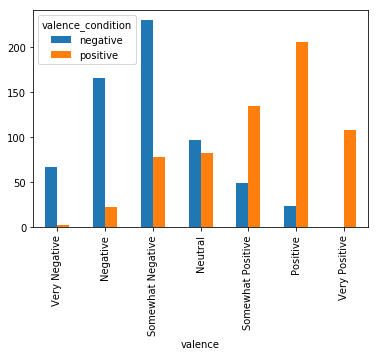

In [31]:
valence_order = ['Very Negative', 'Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive', 'Very Positive']

#Make a graph
pre_test_data.groupby(['valence_condition'])['valence'].value_counts().unstack(0).loc[valence_order].plot.bar()

#print the data
pd.crosstab(pre_test_data['valence_condition'], pre_test_data['valence']).reindex(valence_order, axis="columns")

control          Completely Uncontrollable  Uncontrollable  \
means_condition                                              
absent                                  20              85   
present                                  6              48   

control          Somewhat Uncontrollable  Neutral  Somewhat Controllable  \
means_condition                                                            
absent                               131       48                    158   
present                               78       48                    191   

control          Controllable  Completely Controllable  
means_condition                                         
absent                    138                       51  
present                   193                       71

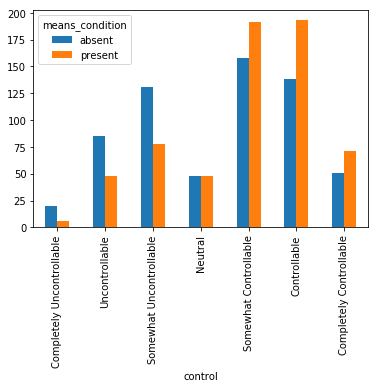

In [32]:
control_order = ['Completely Uncontrollable', 'Uncontrollable', 'Somewhat Uncontrollable', 'Neutral',
                 'Somewhat Controllable', 'Controllable', 'Completely Controllable']

#Make a graph
pre_test_data.groupby(['means_condition'])['control'].value_counts().unstack(0).loc[control_order].plot.bar()

#print the data
pd.crosstab(pre_test_data['means_condition'], pre_test_data['control']).reindex(control_order, axis="columns")

### Breakdown by both means (control) and valence manipulated DVs.

**Valence Ratings.**  However, when you break it down by both control and valence, a possible interaction arises in the valence ratings participants gave. The combinations of positive & means present and negative & means absent seemed to work the best. When materials were positive and means were present, people rated the materials highly positive; when materials were negative and means were absent, people rated the materials mostly negative. 

The materials that were crossed (the positive materials with means absent and the negative materials and means present) do not appear to work as well. They are more spread out and closer to neutral, however both appear to have a central tendency to the positive or negative side of the scale, as expected.

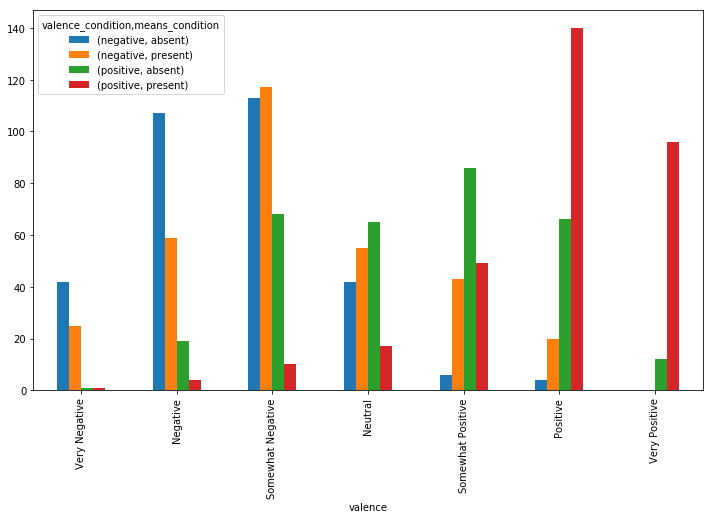

In [33]:
pre_test_data.groupby(['valence_condition', 'means_condition'])['valence'].value_counts().unstack([0,1]).loc[valence_order].plot.bar(figsize = (12,7))


In [34]:
#Group by both valence and control.
pre_test_data.groupby(['valence_condition', 'means_condition'])['valence'].value_counts().unstack(2).reindex(
    valence_order, axis="columns")

valence                            Very Negative  Negative  Somewhat Negative  \
valence_condition means_condition                                               
negative          absent                    42.0     107.0              113.0   
                  present                   25.0      59.0              117.0   
positive          absent                     1.0      19.0               68.0   
                  present                    1.0       4.0               10.0   

valence                            Neutral  Somewhat Positive  Positive  \
valence_condition means_condition                                         
negative          absent              42.0                6.0       4.0   
                  present             55.0               43.0      20.0   
positive          absent              65.0               86.0      66.0   
                  present             17.0               49.0     140.0   

valence                            Very Positive  
valence_condition means_condition                 
negative          absent                     NaN  
                  present                    NaN  
positive          absent                    12.0  
                  present                   96.0

**Controllability Ratings.**  The controllability ratings are less distinct, as participants seemed to agree that all of the scenarios were, more or less, controllable. Again, the positive materials with means present were the most strongly rated controllable. The other three DV pairings seem to be rated more similarly, all having their medians on "Somewhat Controllable".

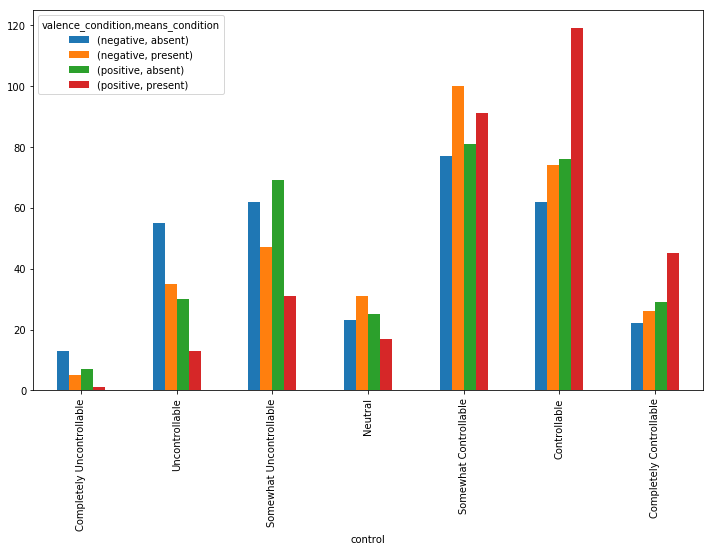

In [35]:
pre_test_data.groupby(['valence_condition', 'means_condition'])['control'].value_counts().unstack([0,1]).loc[control_order].plot.bar(figsize = (12,7))


In [36]:
#Group by both valence and control.
pre_test_data.groupby(['valence_condition', 'means_condition'])['control'].value_counts().unstack(2).reindex(
    control_order, axis="columns")

control                            Completely Uncontrollable  Uncontrollable  \
valence_condition means_condition                                              
negative          absent                                  13              55   
                  present                                  5              35   
positive          absent                                   7              30   
                  present                                  1              13   

control                            Somewhat Uncontrollable  Neutral  \
valence_condition means_condition                                     
negative          absent                                62       23   
                  present                               47       31   
positive          absent                                69       25   
                  present                               31       17   

control                            Somewhat Controllable  Controllable  \
valence_condition means_condition                                        
negative          absent                              77            62   
                  present                            100            74   
positive          absent                              81            76   
                  present                             91           119   

control                            Completely Controllable  
valence_condition means_condition                           
negative          absent                                22  
                  present                               26  
positive          absent                                29  
                  present                               45

## Frequencies of responses by material.

A look at the spread by-materials tells a similar story. Most of the materials have the same valence-rating profile as the overall graph, but the controllability ratings are a mess.

/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



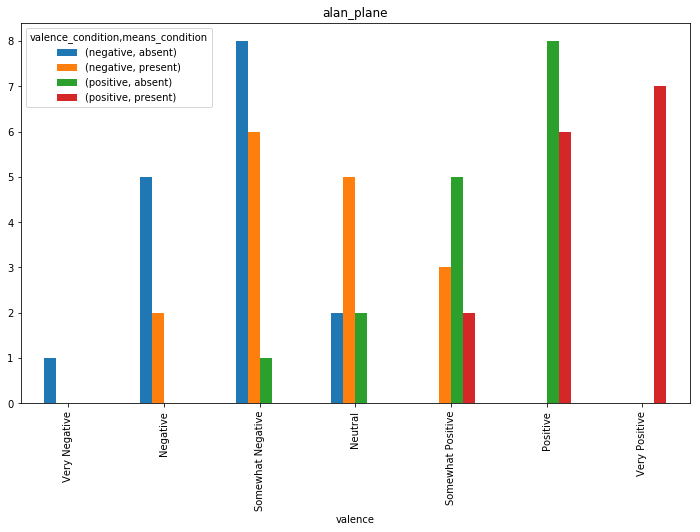

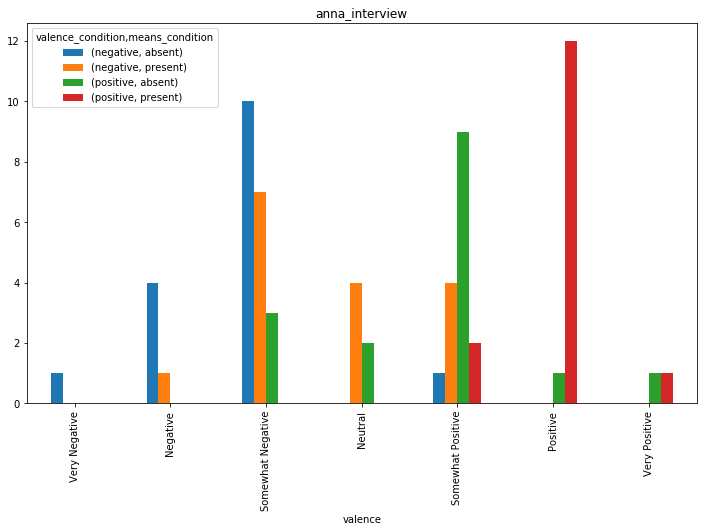

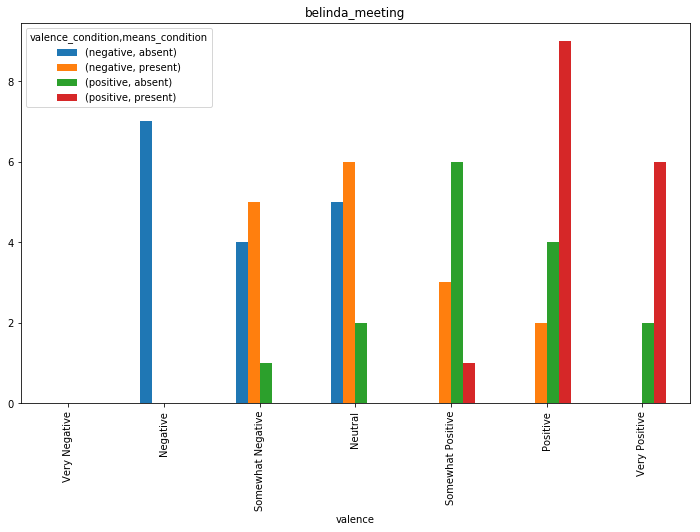

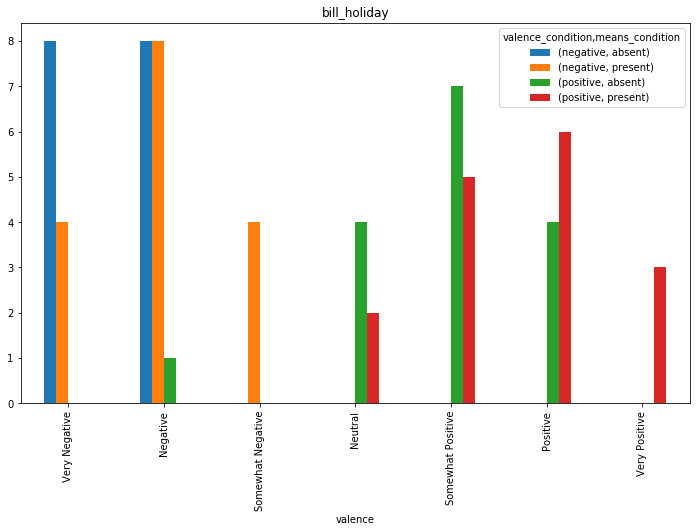

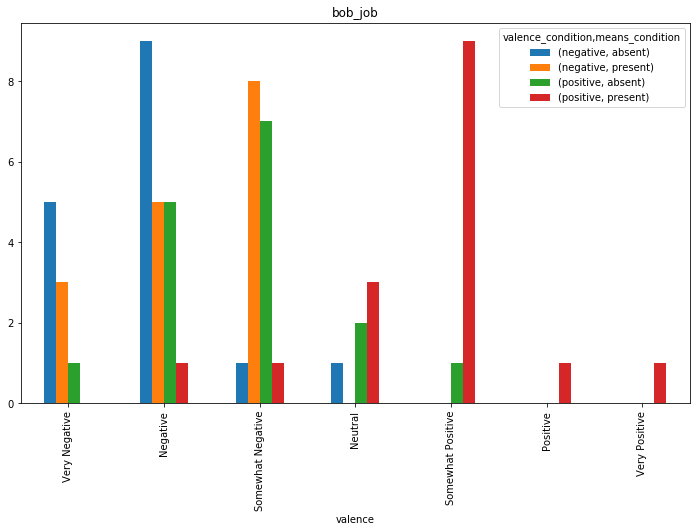

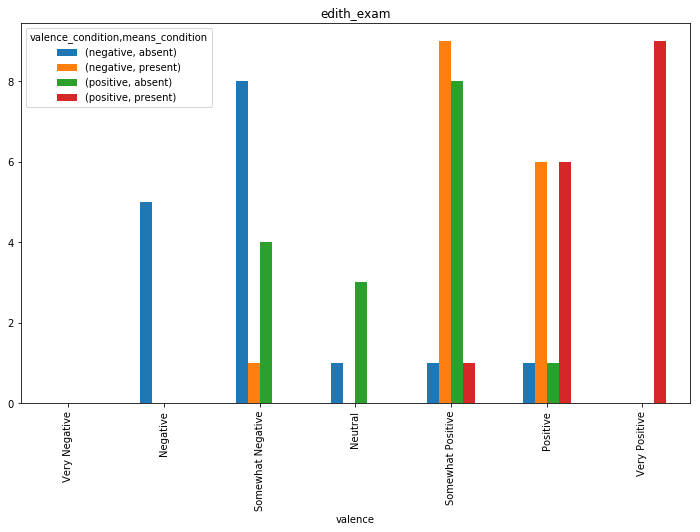

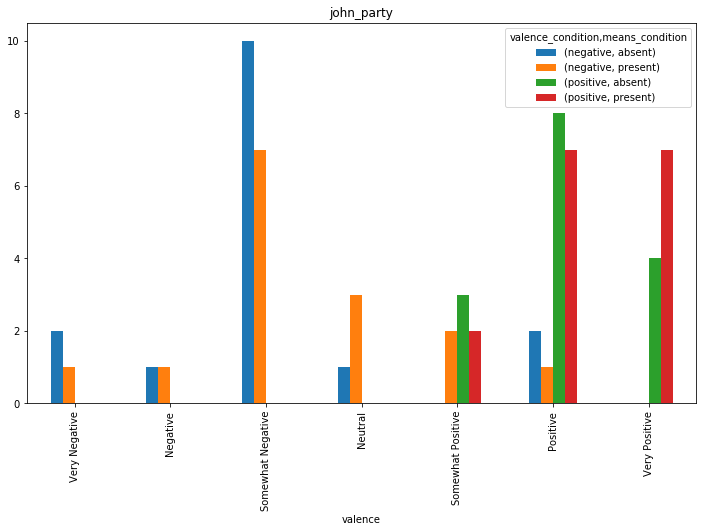

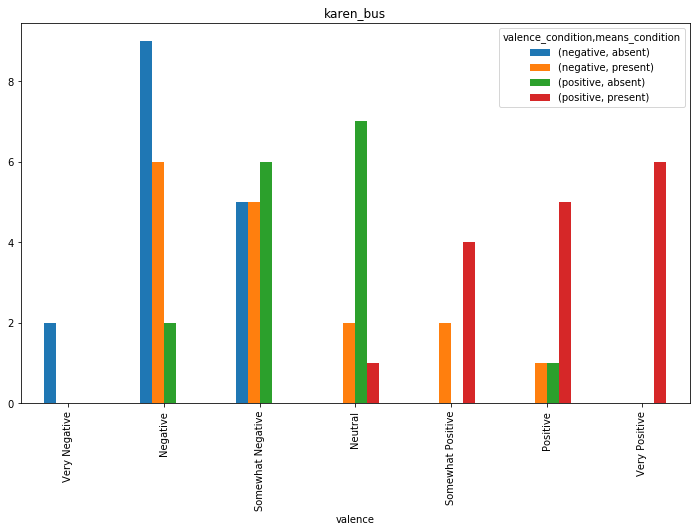

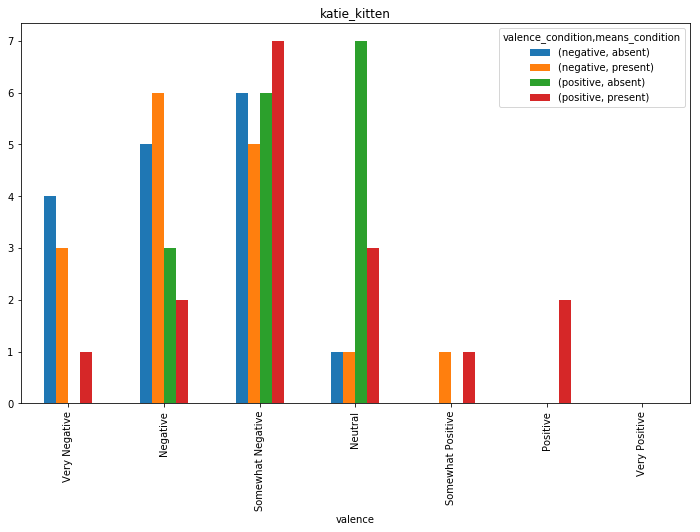

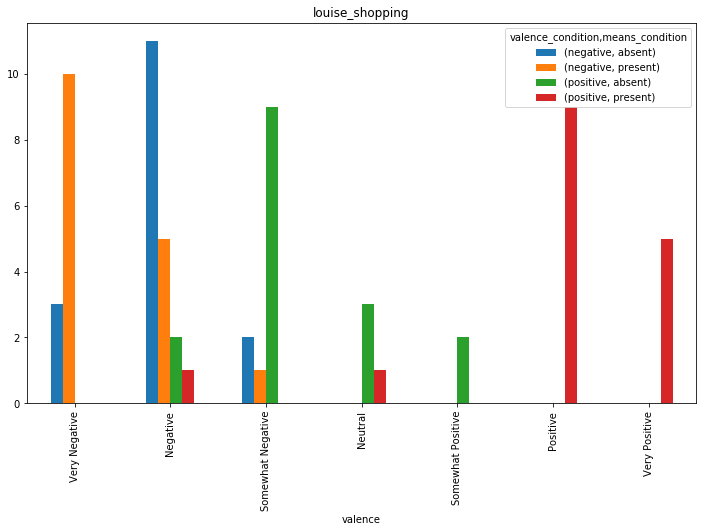

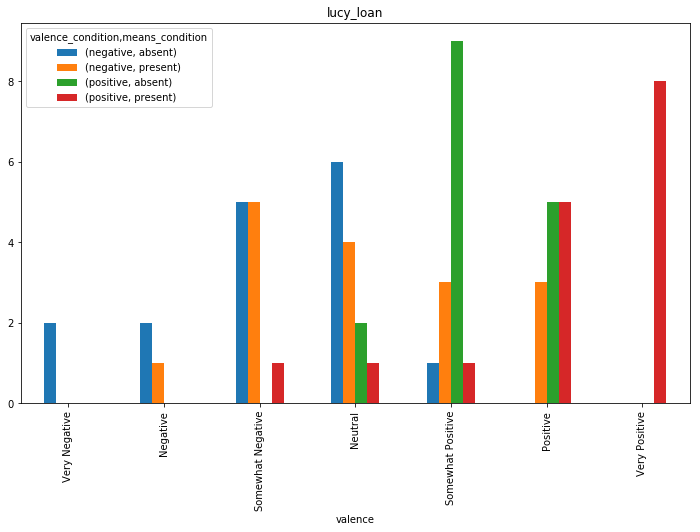

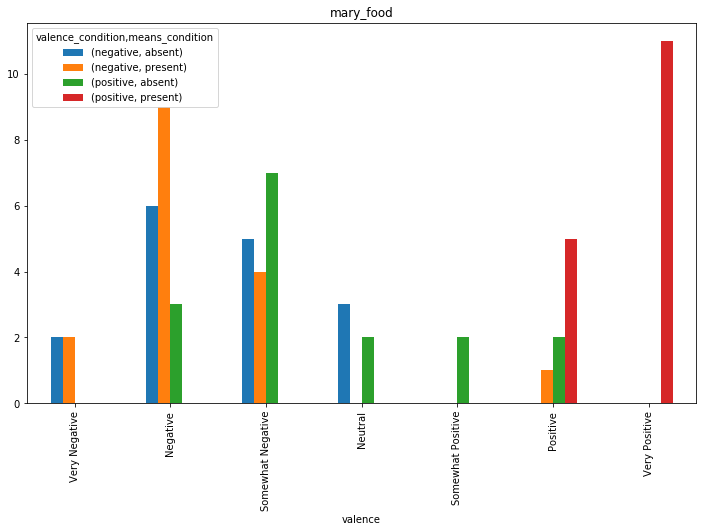

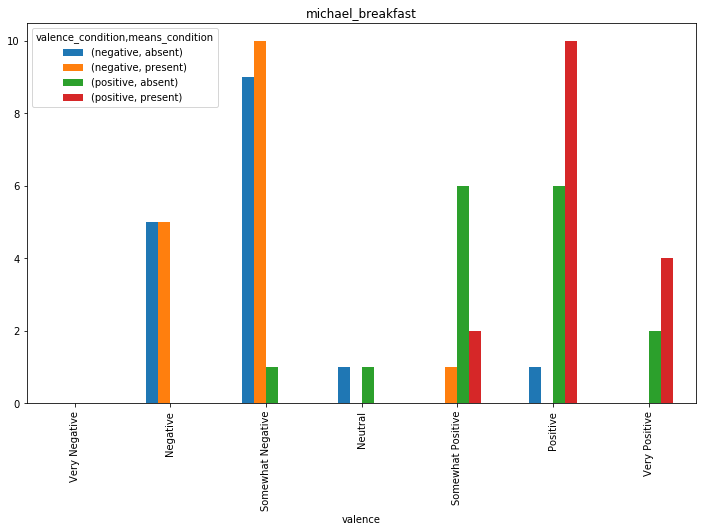

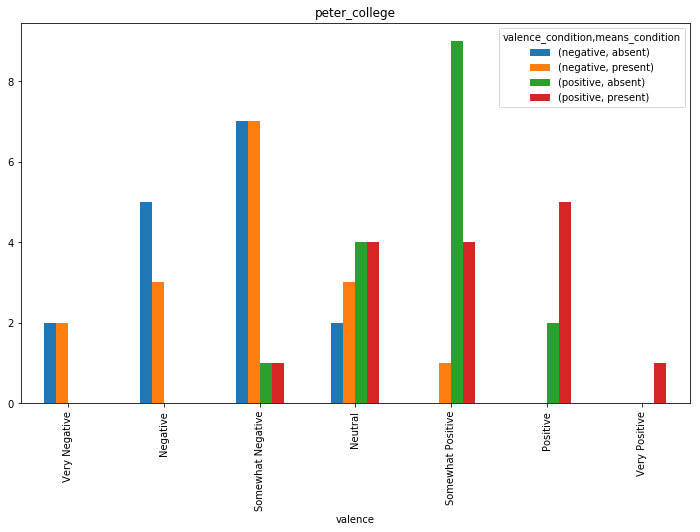

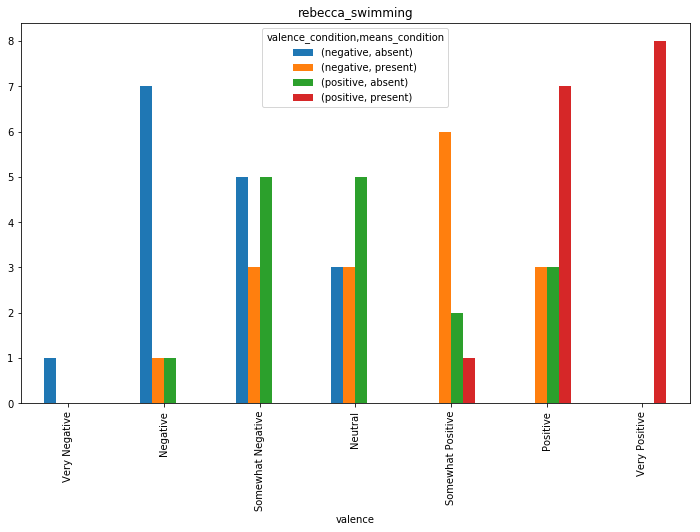

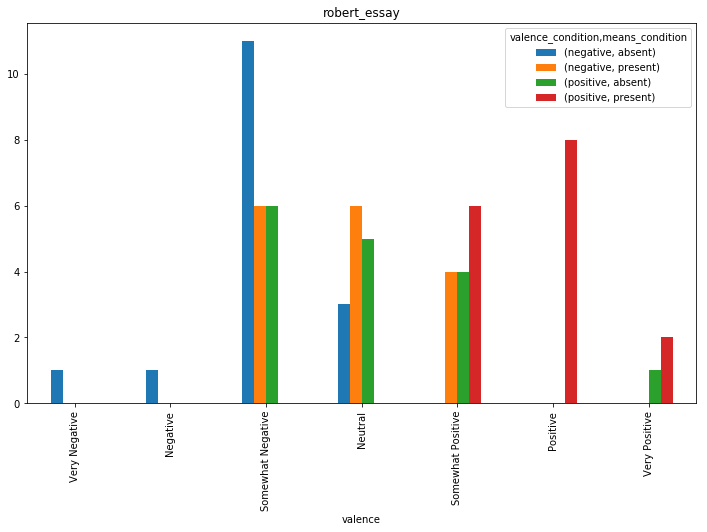

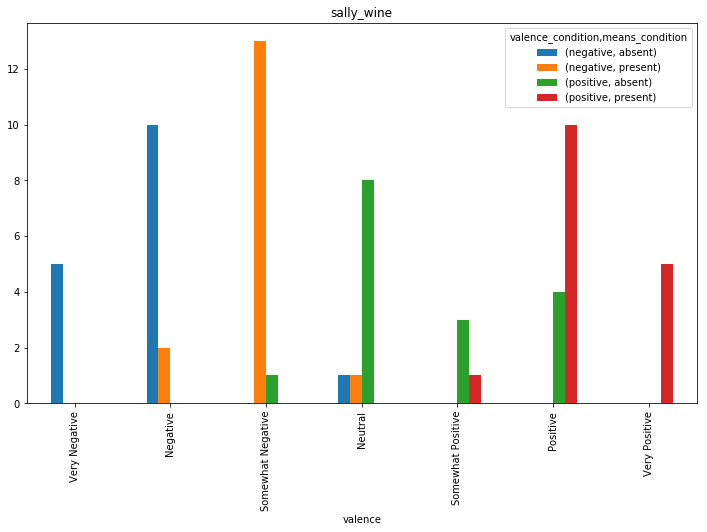

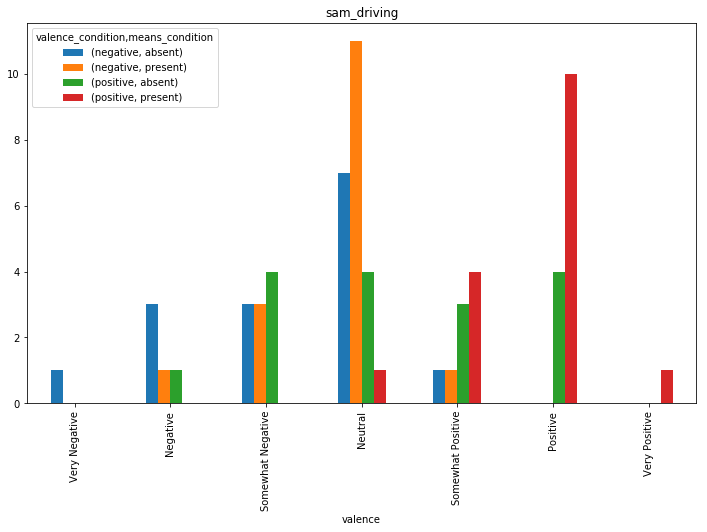

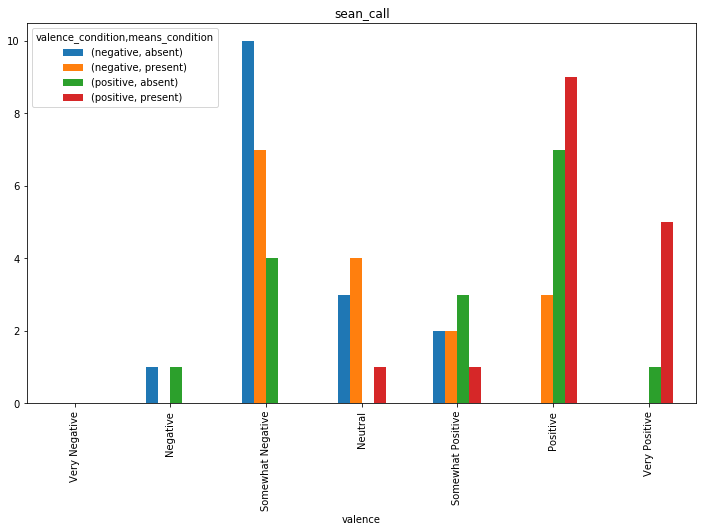

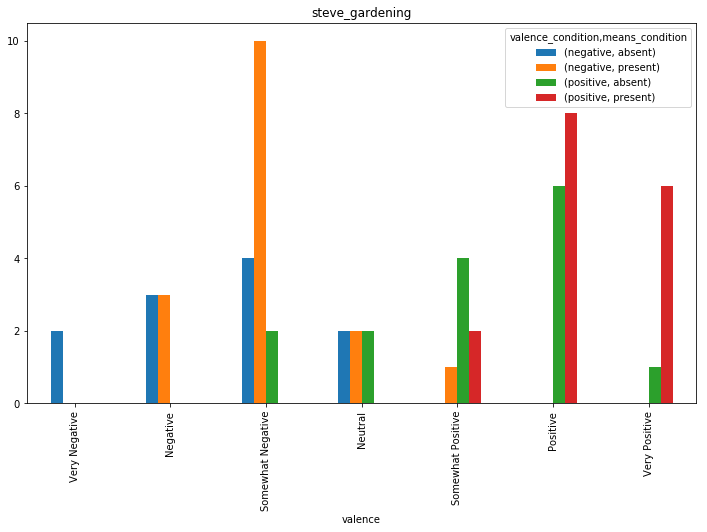

In [37]:
#Make a graph for each material in each valence condition.
for mat in pre_test_data['material'].unique():
    graph_data = pre_test_data[pre_test_data['material'] == mat]
    graph_data.groupby(['valence_condition', 'means_condition'])['valence'].value_counts().unstack([0,1]).loc[valence_order].plot.bar(title = mat, figsize = (12,7))


/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



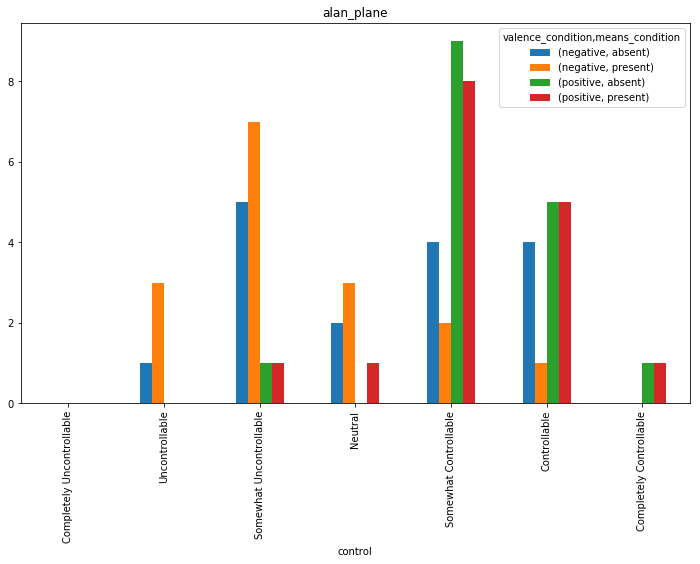

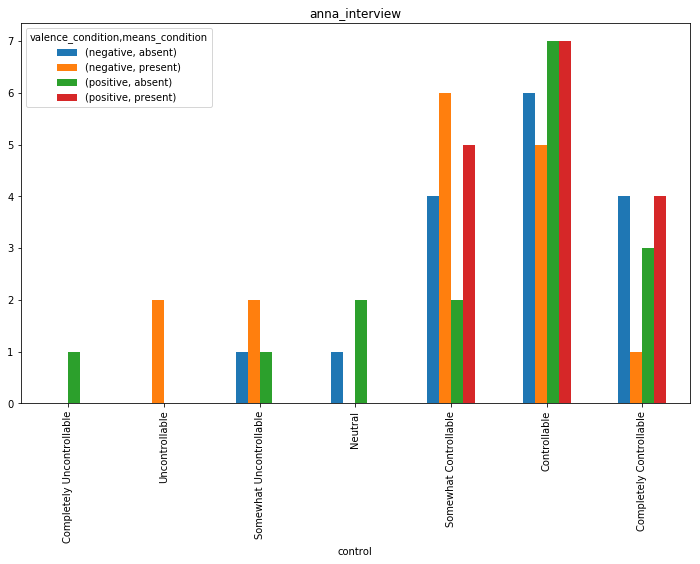

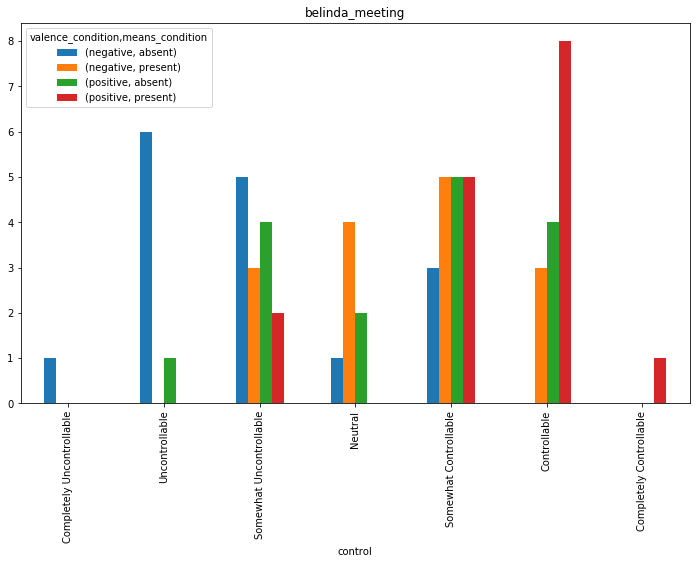

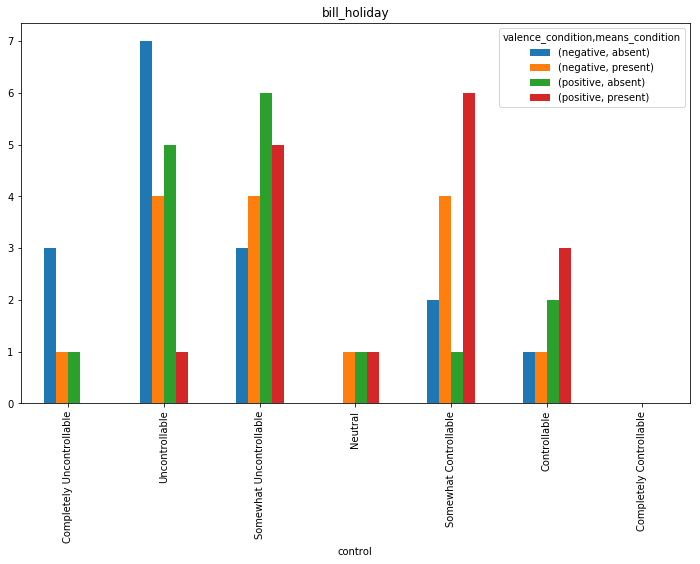

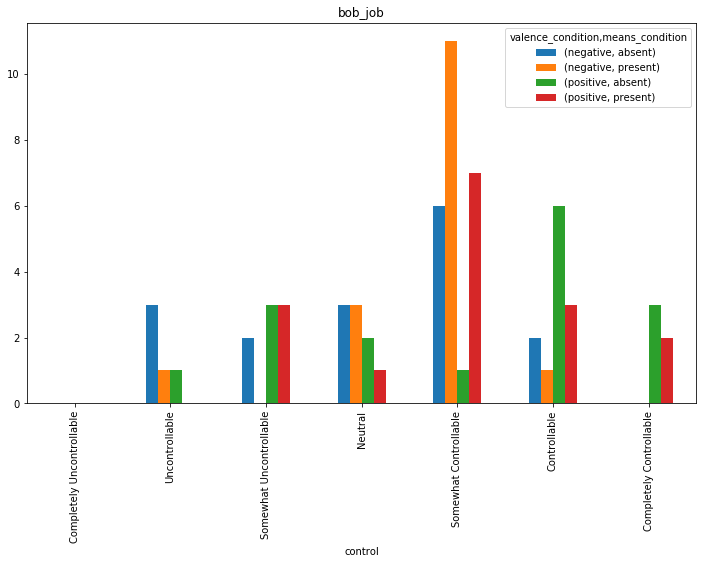

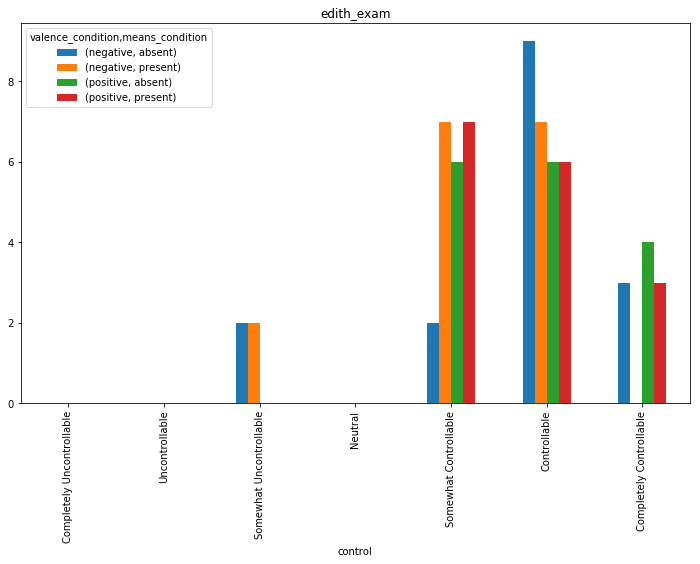

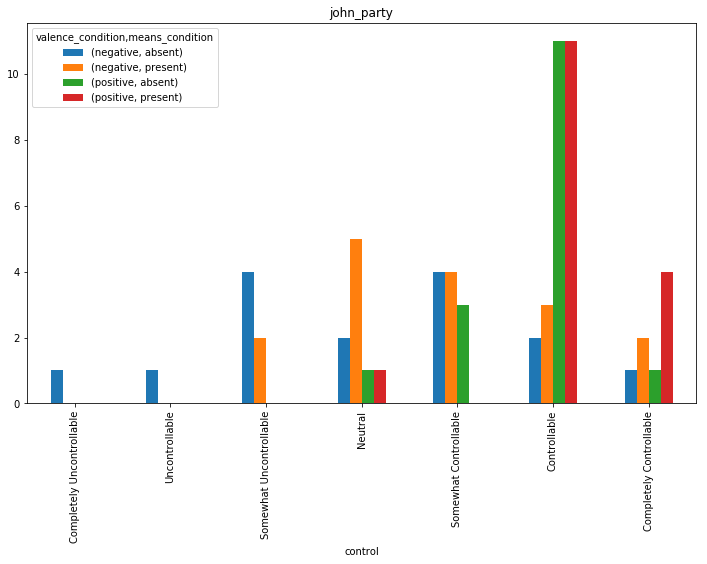

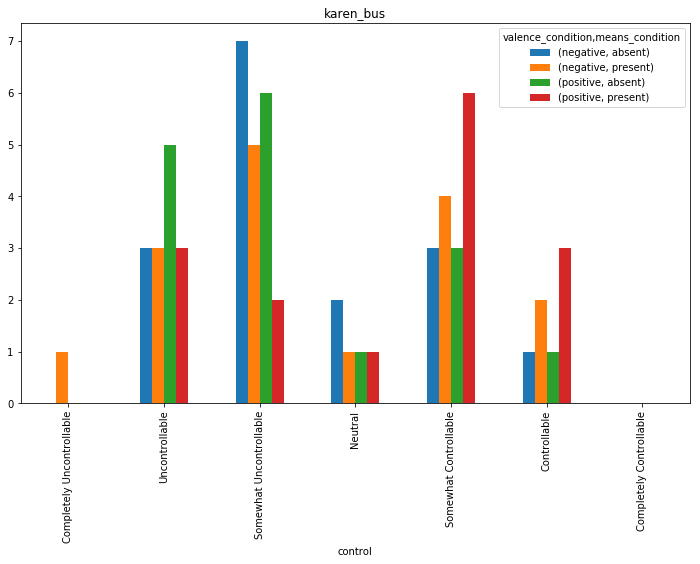

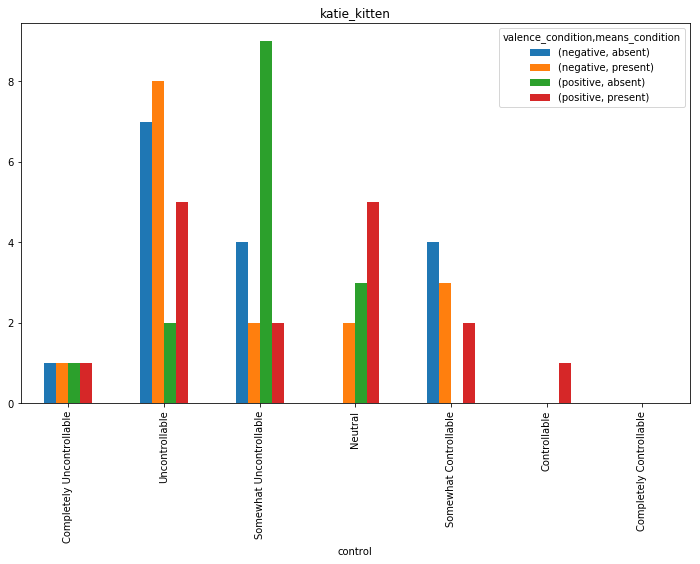

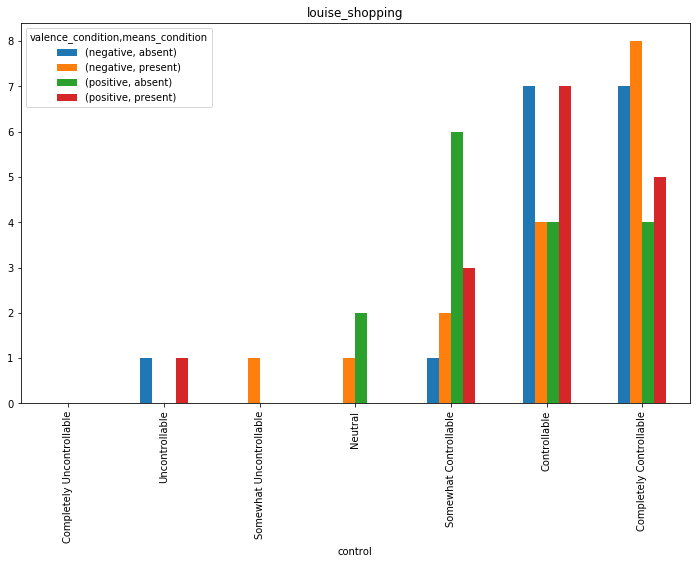

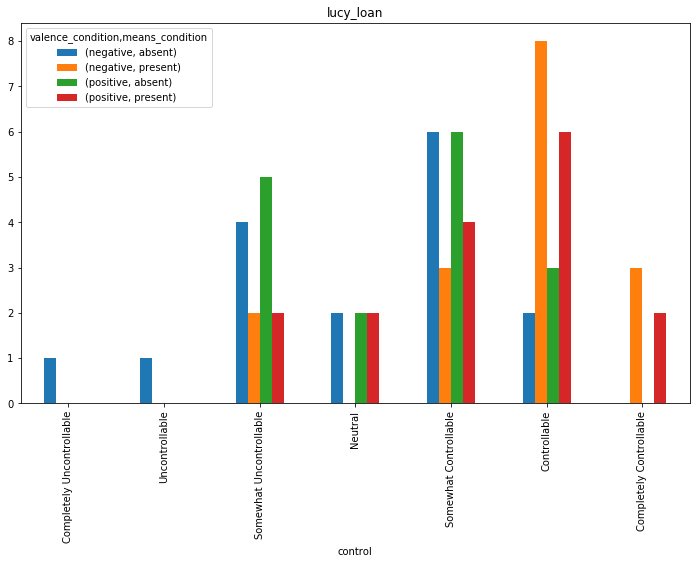

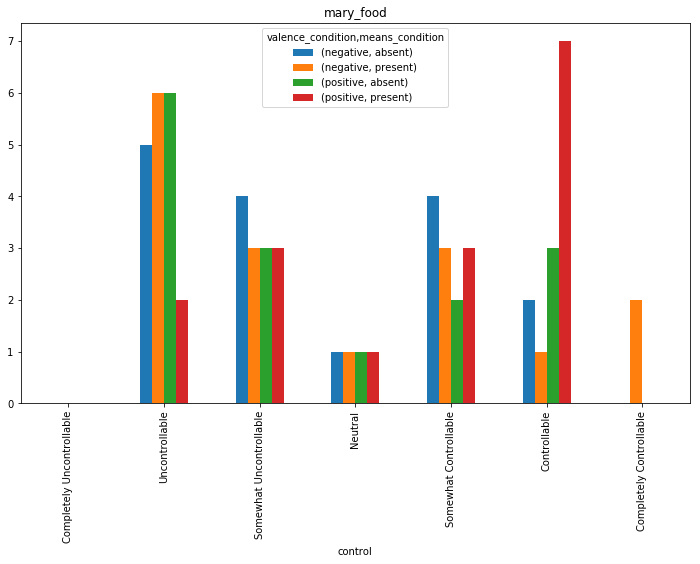

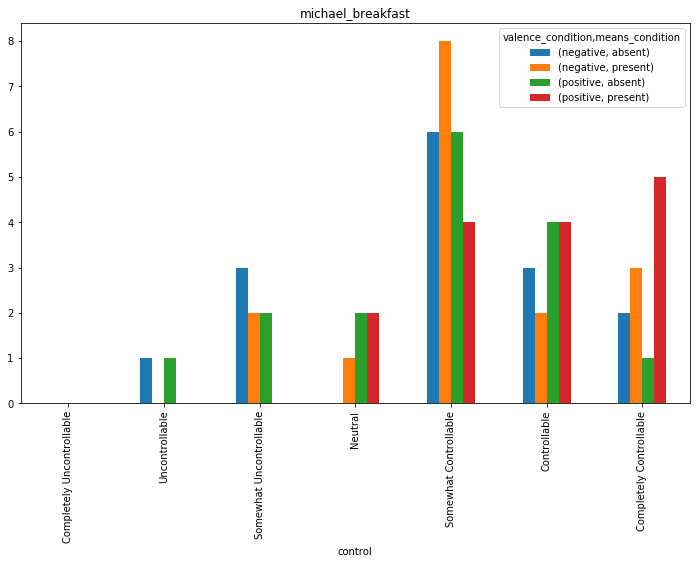

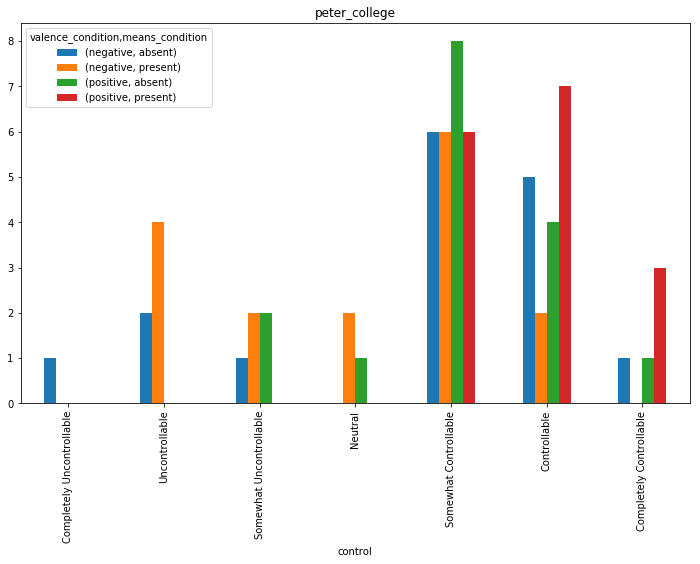

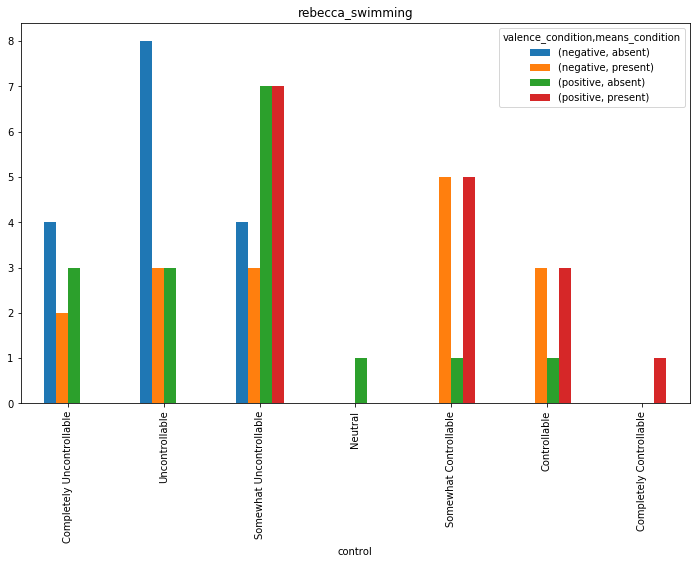

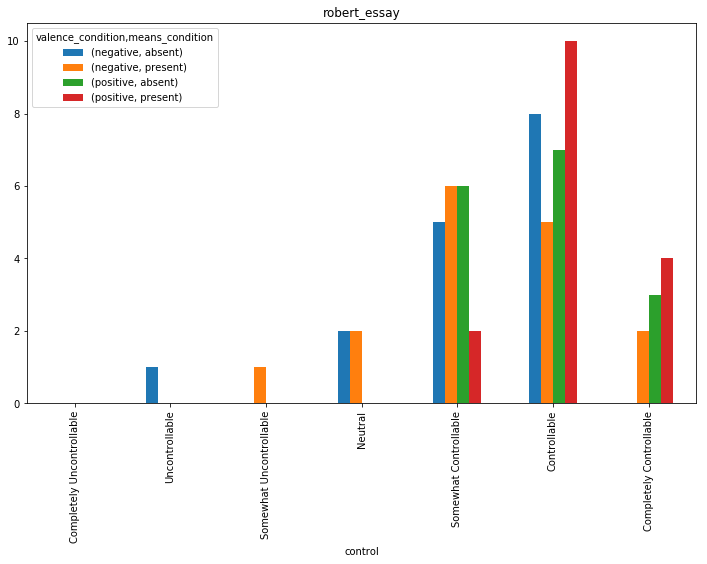

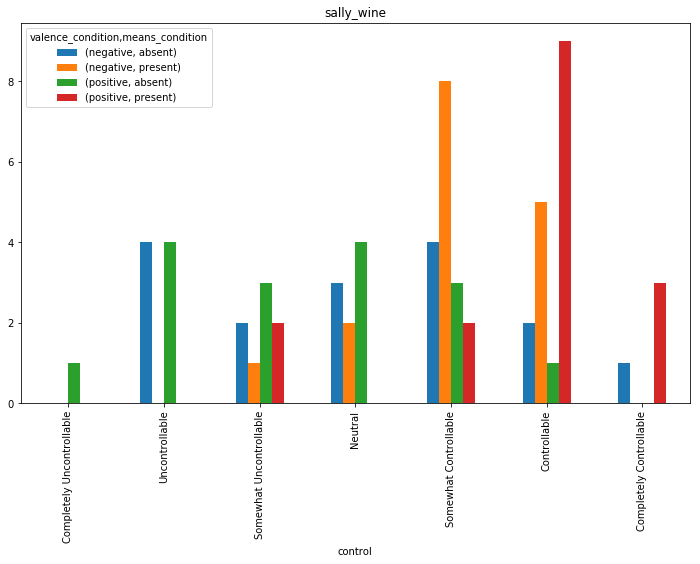

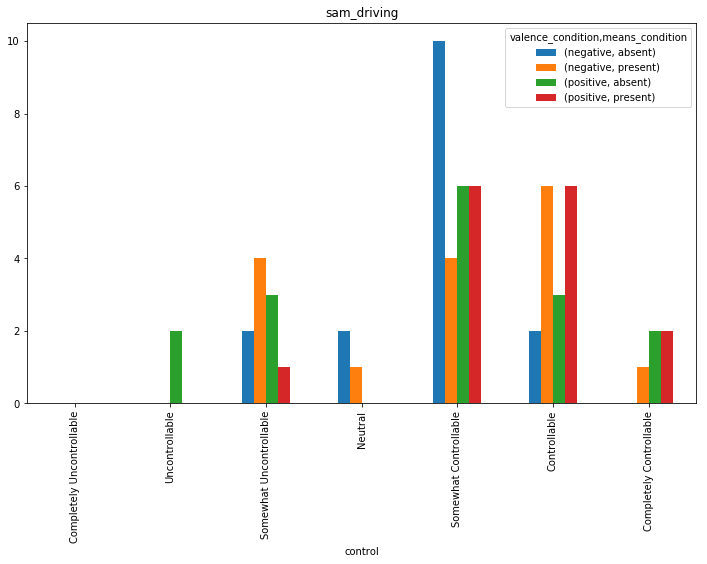

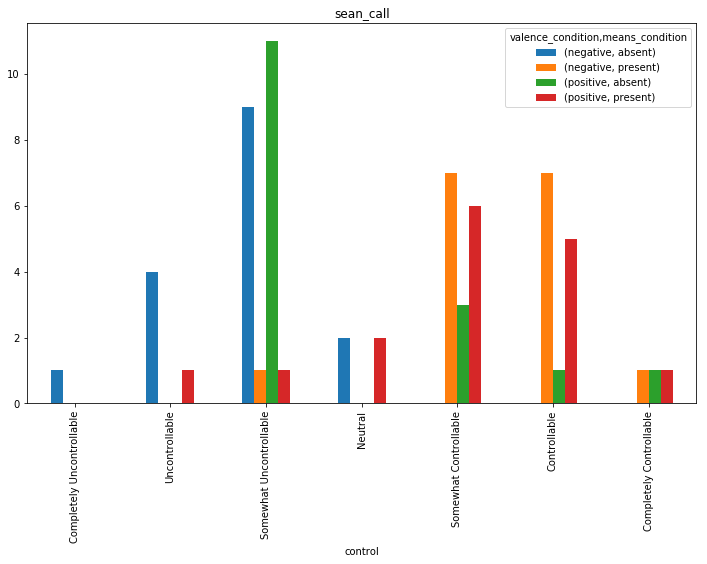

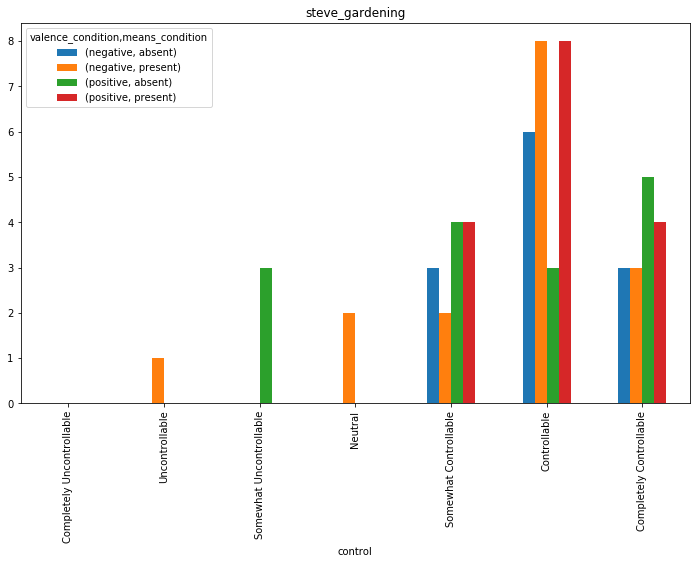

In [38]:
#Make a graph for each material in each control condition.
for mat in pre_test_data['material'].unique():
    graph_data = pre_test_data[pre_test_data['material'] == mat]
    graph_data.groupby(['valence_condition', 'means_condition'])['control'].value_counts().unstack([0,1]).loc[control_order].plot.bar(title = mat, figsize = (12,7))


## Check for order effects of Valence and Controllability questions.

In [39]:
# but first, I need to make numeric variables for the valence and controllability ratings.
numeric_ratings = [1,2,3,4,5,6,7]

# pair the numbers with the ordered (text) ratings
numeric_valence_ratings = dict(zip(valence_order, numeric_ratings))
numeric_control_ratings = dict(zip(control_order, numeric_ratings))

#check
#print(numeric_valence_ratings)
#list(numeric_control_ratings)

pre_test_data['numeric_valence'] = pre_test_data['valence'].map(
    lambda x: numeric_valence_ratings[x] if x != -9999 else None
)

pre_test_data['numeric_control'] = pre_test_data['control'].map(
    lambda x: numeric_control_ratings[x] if x != -9999 else None
)

In [40]:
#dataframe to hold the t-test info.
pre_t_tests_valence = pd.DataFrame(columns=["lg", "cond",'material','M_cv', 'SD_cv', 'M_vc', 'SD_vc', 't','p'])

#where pre_test_data['lg'] is the same, compare pre_test_data['order']=='vc' to pre_test_data['order']=='cv'

#for each latin-greco row,
for lg in pre_test_data['lg'].unique():
    # and each material
    for material in pre_test_data['material'].unique():
        
        data = pre_test_data[(pre_test_data['lg'] == lg) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['order']== 'cv']['numeric_valence'], 
                                   data[data['order']== 'vc']['numeric_valence'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")

        
        pre_t_tests_valence = pre_t_tests_valence.append({
                #condition info
                'lg': lg,
                'cond': data['valence_condition'].unique()[0] ,
                'material': material,
                
                #get means and standard deviations
                'M_cv': np.mean(data['numeric_valence'].loc[data['order']== 'cv']),
                'SD_cv': np.std(data['numeric_valence'].loc[data['order']== 'cv']),
                'M_vc': np.mean(data['numeric_valence'].loc[data['order']== 'vc']),
                'SD_vc': np.std(data['numeric_valence'].loc[data['order']== 'vc']),
                
                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


LGs2r1 steve_gardening was unable to be tested because the order conditions were unequal.


In [41]:
pre_t_tests_valence[pre_t_tests_valence['p'] <= 0.05]

lg      cond          material  M_cv     SD_cv      M_vc     SD_vc  \
70   LGs2r1  negative         lucy_loan  5.00  0.707107  3.750000  0.433013   
79   LGs2r1  negative   steve_gardening   NaN       NaN  3.666667  0.471405   
114  LGs2r4  positive  rebecca_swimming  5.25  0.829156  3.000000  0.707107   
121  LGs1r4  positive    anna_interview  4.00  0.707107  5.250000  0.433013   
139  LGs1r4  negative   steve_gardening  3.50  0.500000  2.500000  0.500000   
157  LGs2r3  negative       sam_driving  4.00  0.707107  2.000000  0.816497   

               t            p  
70      5.000000     0.015392  
79  -9999.000000 -9999.000000  
114     4.700097     0.018220  
121    -5.000000     0.015392  
139          inf     0.000000  
157          inf     0.000000

So, there are 5, maybe 6 materials that do not have the same responses to the valence question when the order of the valence and control questions is changed. Two of which are Steve_Gardening in the negative condition.


In [42]:
#dataframe to hold the t-test info.
pre_t_tests_control = pd.DataFrame(columns=["lg", "cond",'material','M_cv', 'SD_cv', 'M_vc', 'SD_vc', 't','p'])

#where pre_test_data['lg'] is the same, compare pre_test_data['order']=='vc' to pre_test_data['order']=='cv'

#for each latin-greco row,
for lg in pre_test_data['lg'].unique():
    # and each material
    for material in pre_test_data['material'].unique():
        
        data = pre_test_data[(pre_test_data['lg'] == lg) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['order']== 'cv']['numeric_control'], 
                                   data[data['order']== 'vc']['numeric_control'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")

        
        pre_t_tests_control = pre_t_tests_control.append({
                #condition info
                'lg': lg,
                'cond': data['means_condition'].unique()[0] ,
                'material': material,
                
                #get means and standard deviations
                'M_cv': np.mean(data['numeric_control'].loc[data['order']== 'cv']),
                'SD_cv': np.std(data['numeric_control'].loc[data['order']== 'cv']),
                'M_vc': np.mean(data['numeric_control'].loc[data['order']== 'vc']),
                'SD_vc': np.std(data['numeric_control'].loc[data['order']== 'vc']),
                
                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


LGs2r1 steve_gardening was unable to be tested because the order conditions were unequal.


In [43]:
pre_t_tests_control[pre_t_tests_control['p'] <= 0.05]

lg     cond         material  M_cv     SD_cv  M_vc     SD_vc  \
7    LGs1r3  present        karen_bus  5.50  0.500000  3.75  1.299038   
61   LGs2r1  present   anna_interview  6.50  0.500000  5.50  0.500000   
79   LGs2r1   absent  steve_gardening   NaN       NaN  6.00  0.707107   
82   LGs1r2   absent  belinda_meeting  2.00  0.000000  3.75  0.829156   
99   LGs1r2   absent  steve_gardening  6.50  0.500000  4.75  1.089725   
156  LGs2r3  present       sally_wine  5.75  0.433013  4.25  0.829156   

               t            p  
7       3.655631     0.035353  
61           inf     0.000000  
79  -9999.000000 -9999.000000  
82     -3.655631     0.035353  
99      3.655631     0.035353  
156     5.196152     0.013847

There are six, maybe 7 materials that do not have the same responses to the control question when the order of the valence and control questions is changed. Two of which are Steve_Gardening in the absent condition. 

However, the above results are based on 4 observations for each condition and question order, so may not be entirely valid.

## Compare valence and control ratings as in the Study 3 Valence pre-test.

### Check which materials meet the cut-off criteria of <= 3.5 for negative/absent and >= 4.5 for positive/present.

In [44]:
mean_valence_and_control = pre_test_data.groupby(['material','valence_condition','means_condition']
                                                )[['numeric_valence','numeric_control']].mean().reset_index()
#mean_valence_and_control.head()

There are 16 materials that meet the cut-offs for both valence and control in the positive-present condition.

In [45]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'present') & \
                         (mean_valence_and_control['valence_condition'] == 'positive') & \
                         (mean_valence_and_control['numeric_valence'] >= 4.5) & \
                         (mean_valence_and_control['numeric_control'] >= 4.5)]

material valence_condition means_condition  numeric_valence  \
3          alan_plane          positive         present         6.333333   
7      anna_interview          positive         present         5.933333   
11    belinda_meeting          positive         present         6.312500   
19            bob_job          positive         present         4.687500   
23         edith_exam          positive         present         6.500000   
27         john_party          positive         present         6.312500   
39    louise_shopping          positive         present         5.937500   
43          lucy_loan          positive         present         6.125000   
47          mary_food          positive         present         6.687500   
51  michael_breakfast          positive         present         6.125000   
55      peter_college          positive         present         5.066667   
63       robert_essay          positive         present         5.750000   
67         sally_wine          positive         present         6.250000   
71        sam_driving          positive         present         5.687500   
75          sean_call          positive         present         6.125000   
79    steve_gardening          positive         present         6.250000   

    numeric_control  
3          5.250000  
7          5.937500  
11         5.375000  
19         5.000000  
23         5.750000  
27         6.125000  
39         5.875000  
43         5.250000  
47         4.625000  
51         5.800000  
55         5.812500  
63         6.125000  
67         5.687500  
71         5.533333  
75         5.000000  
79         6.000000

There are 6 materials that meet the cut-offs for both valence and control in the negative-absent condition.

In [46]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'absent') & \
                         (mean_valence_and_control['valence_condition'] == 'negative') & \
                         (mean_valence_and_control['numeric_valence'] <= 3.5) & \
                         (mean_valence_and_control['numeric_control'] <= 3.5)]

material valence_condition means_condition  numeric_valence  \
8    belinda_meeting          negative          absent           2.8750   
12      bill_holiday          negative          absent           1.5000   
28         karen_bus          negative          absent           2.1875   
32      katie_kitten          negative          absent           2.2500   
56  rebecca_swimming          negative          absent           2.6250   
72         sean_call          negative          absent           3.3750   

    numeric_control  
8            2.9375  
12           2.6250  
28           3.5000  
32           2.9375  
56           2.0000  
72           2.7500

There are only 2 materials that meet both cut-offs for the positive-absent condition.

In [47]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'absent') & \
                         (mean_valence_and_control['valence_condition'] == 'positive') & \
                         (mean_valence_and_control['numeric_valence'] >= 4.5) & \
                         (mean_valence_and_control['numeric_control'] <= 3.5)]

material valence_condition means_condition  numeric_valence  \
14  bill_holiday          positive          absent           4.8125   
66    sally_wine          positive          absent           4.6250   

    numeric_control  
14           3.1250  
66           3.4375

There are 6 materials that meet the cut-offs for both valence and control in the negative-present condition. 

In [48]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'present') & \
                         (mean_valence_and_control['valence_condition'] == 'negative') & \
                         (mean_valence_and_control['numeric_valence'] <= 3.5) & \
                         (mean_valence_and_control['numeric_control'] >= 4.5)]

material valence_condition means_condition  numeric_valence  \
17            bob_job          negative         present         2.312500   
25         john_party          negative         present         3.466667   
37    louise_shopping          negative         present         1.437500   
49  michael_breakfast          negative         present         2.812500   
65         sally_wine          negative         present         2.937500   
77    steve_gardening          negative         present         3.062500   

    numeric_control  
17           4.6875  
25           4.8750  
37           6.0625  
49           5.1875  
65           5.0625  
77           5.5625

These materials only match up in a few instances, so the cut-off method may not be the best.

### Since the cut-offs don't appear to be that good, maybe a range will be. Draw a scatter plot of the 4 condition pairs to see...

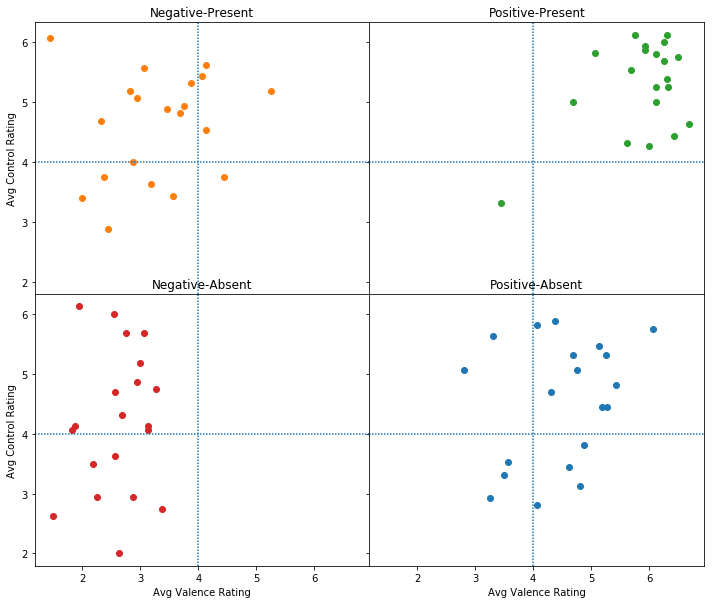

In [49]:
#create the grouped object by condition_code (valence and control conditions)
groups = pre_test_data.groupby(['condition_code'])

conditions = {'A':'Negative-Present', 'C':'Positive-Present', 'B':'Negative-Absent', 'D':'Positive-Absent'}    


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(groups.get_group('A').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('A').groupby('material')["numeric_control"].mean(),  'tab:orange', 
               marker="o", linestyle="")
axs[0, 0].set_title('Negative-Present')

axs[0, 1].plot(groups.get_group('C').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('C').groupby('material')["numeric_control"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Positive-Present')
axs[1, 0].plot(groups.get_group('B').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('B').groupby('material')["numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Negative-Absent')
axs[1, 1].plot(groups.get_group('D').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('D').groupby('material')["numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Positive-Absent')

for ax in axs.flat:
    ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=4, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

As can be seen above, the dashed lines represent the middle of the scales (the Neutral rating), the scatter plots show just about the same as the tables of materials that meet the cut-off(s). Materials do not appear to truly cluster where they are expected to cluster except for in the Positive-Present condition. 

It can also be seen here that the valence manipulation worked much more consistently than the controllability manipulation. The majority of materials do appear to be on the expected side of neutral on the valence scale; however, the materials spread across the controllability scale in all but the Positive-Present condition.

Since the valence manipulation appears to have worked, perhaps we can use the cut-off there and a range of controllability ratings for control. However, we do not have that option in the Positive-Present condition. So, maybe we have a more and less controllable criteria, since most agreed that very few materials were actually "uncontrollable".

#### Try the same for each material individually...

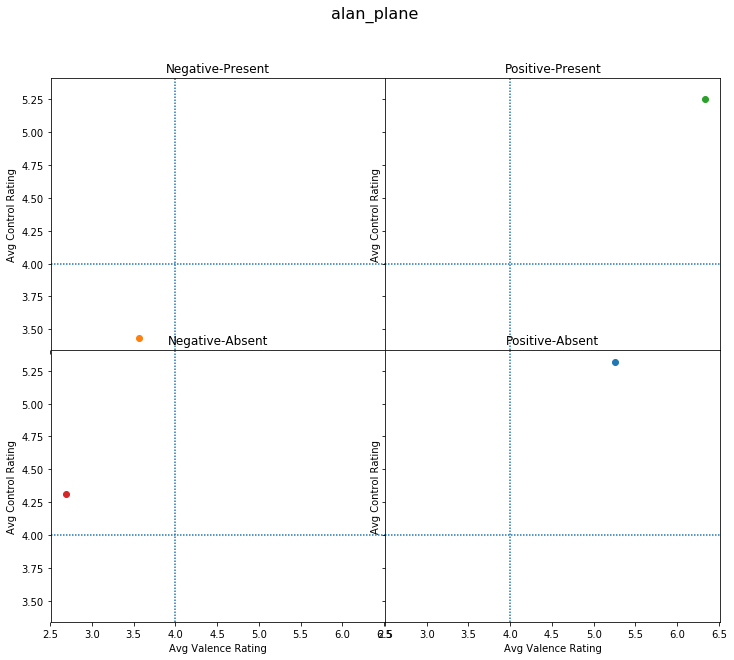

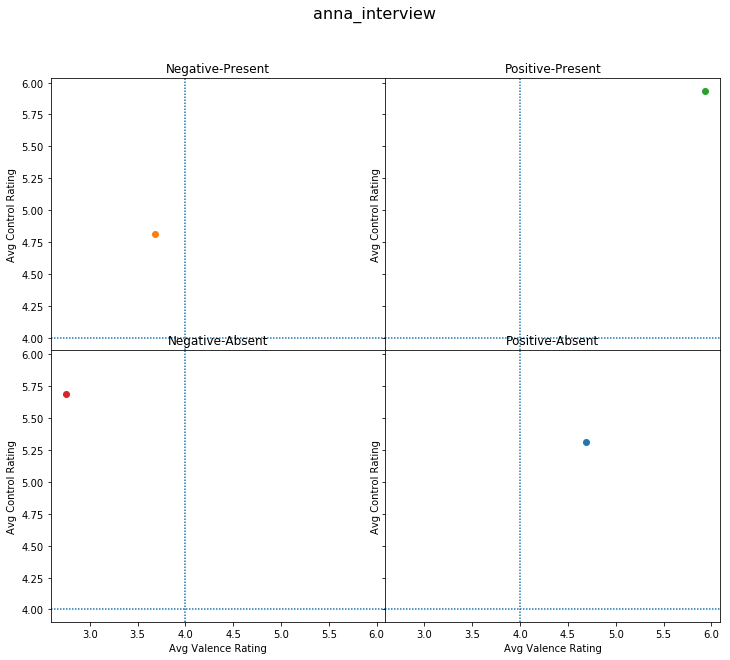

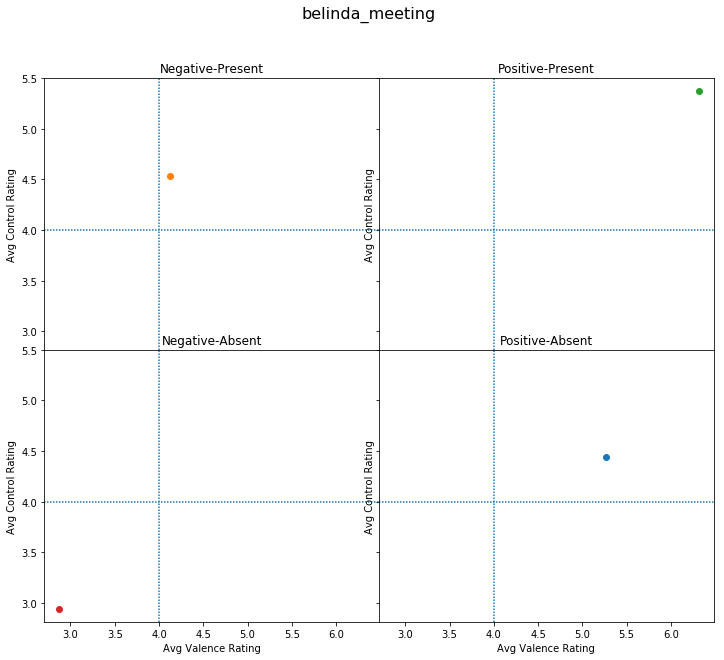

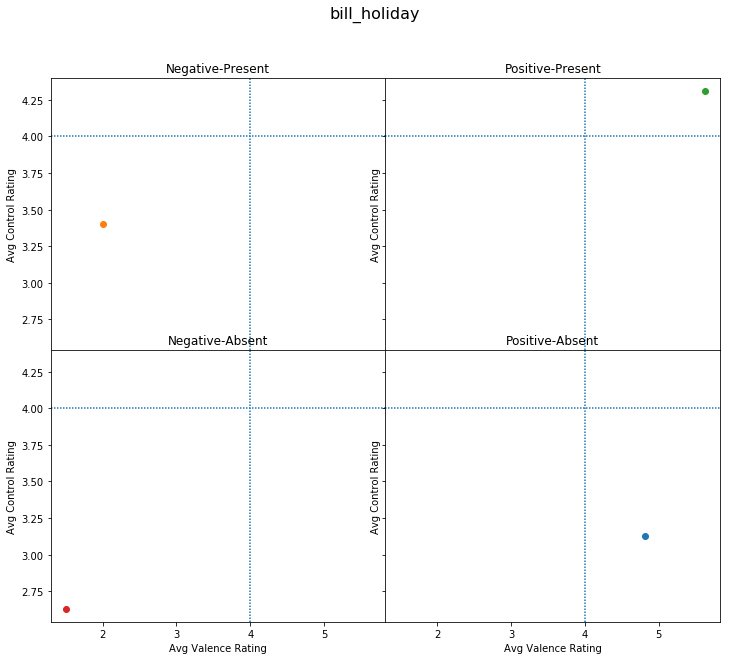

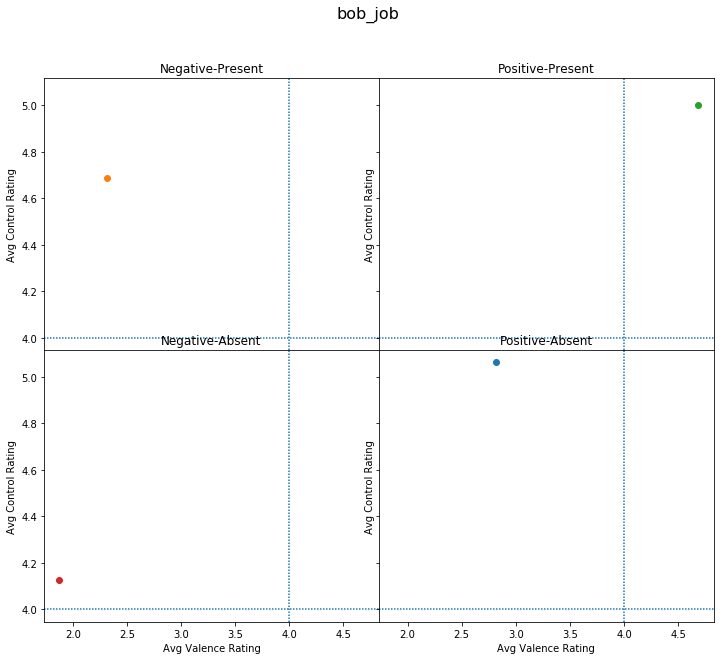

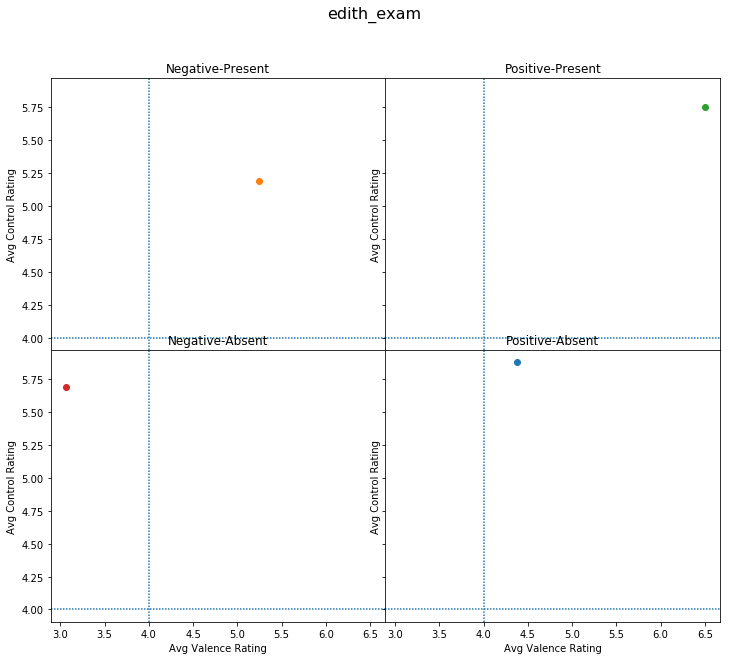

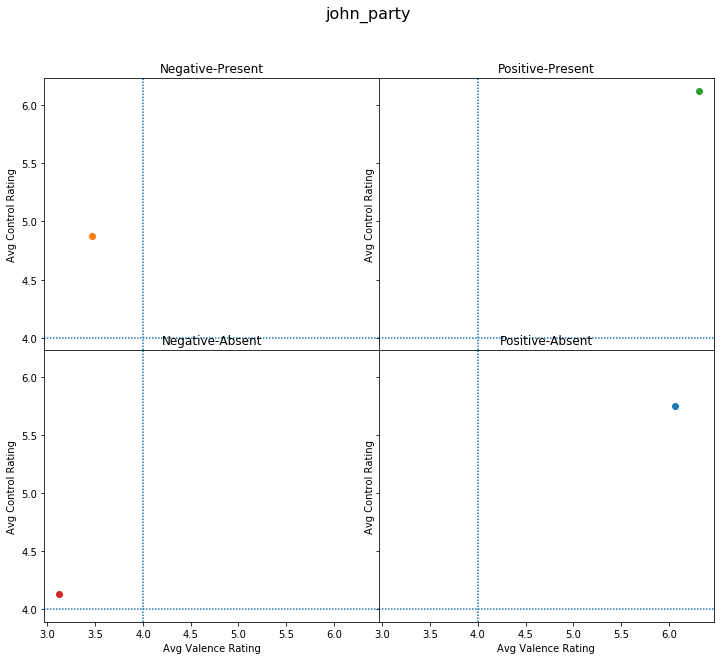

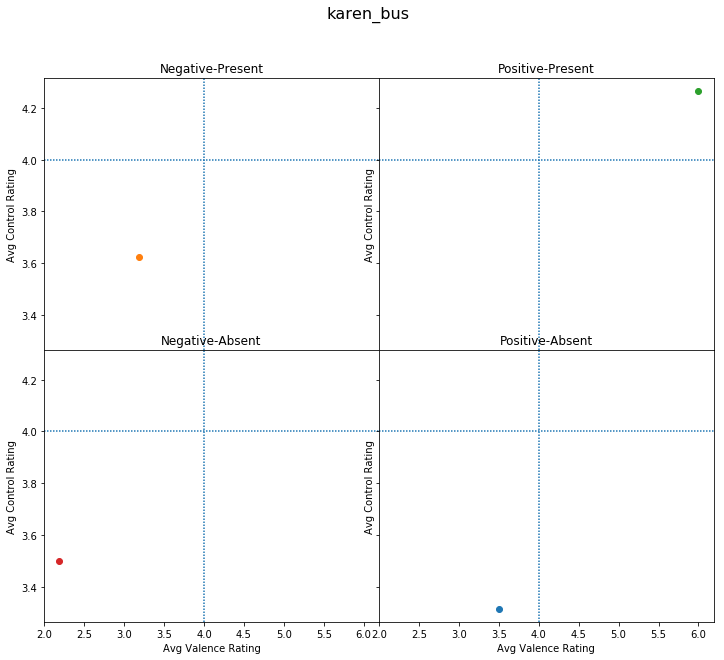

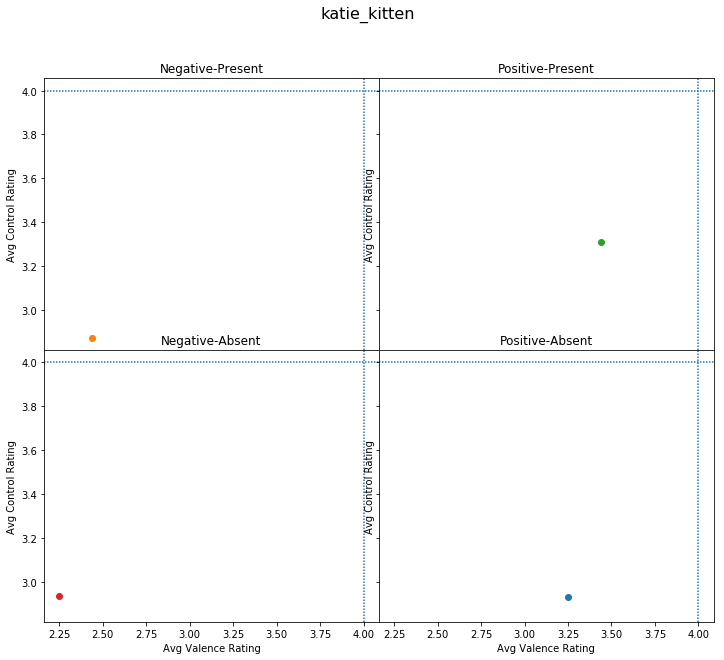

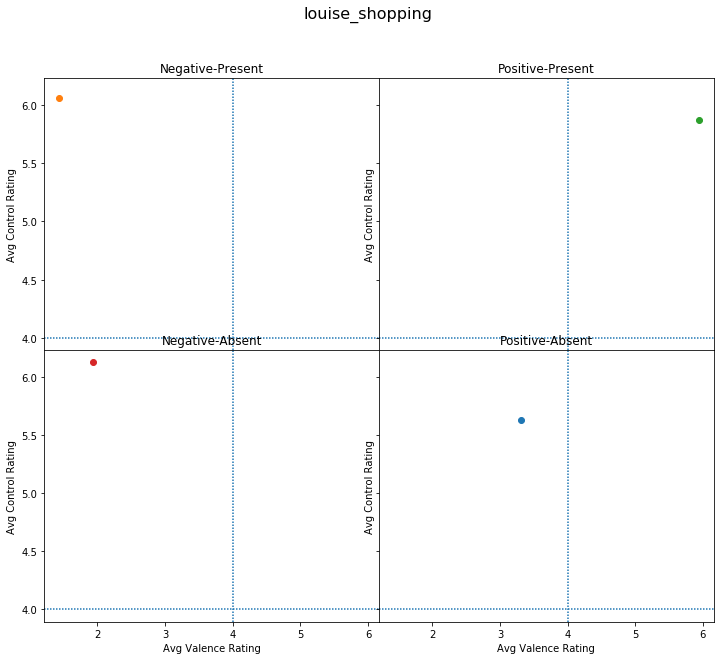

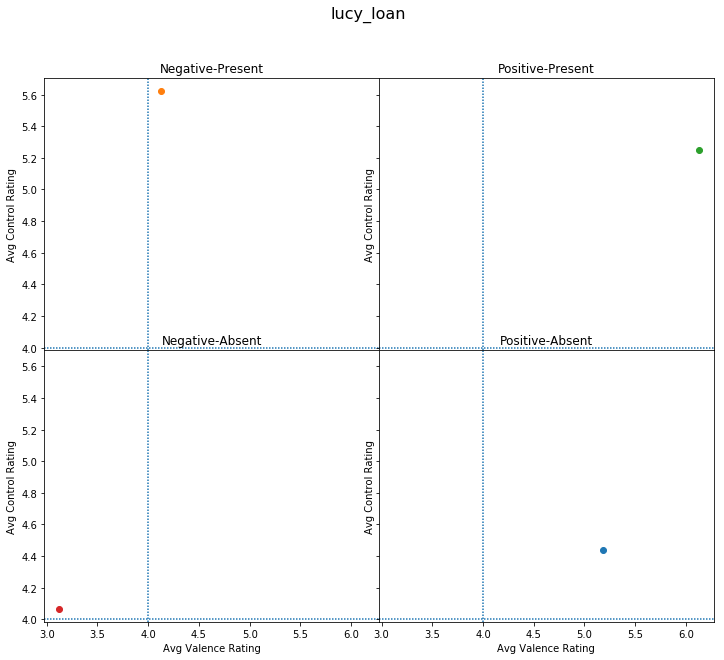

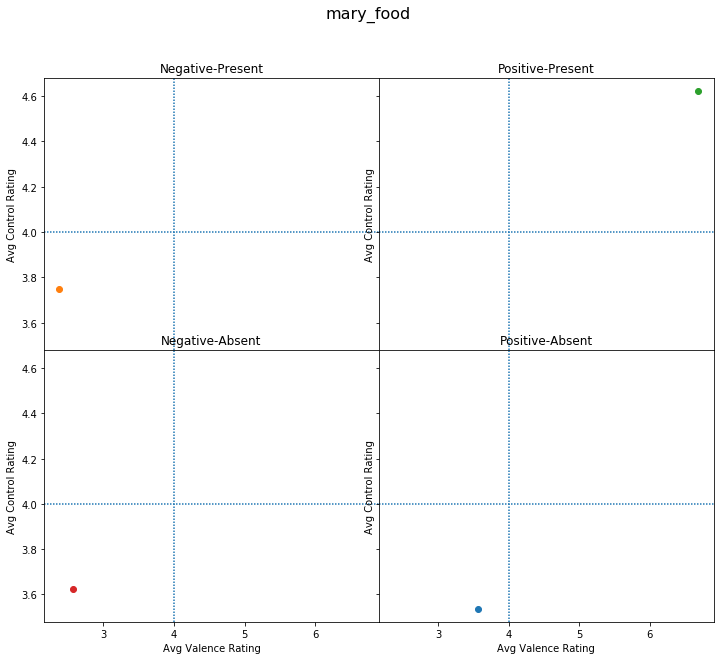

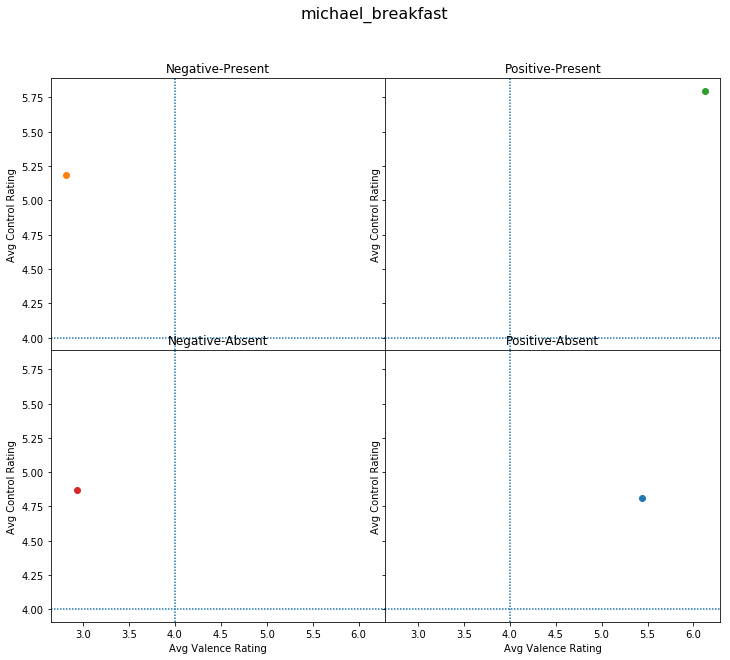

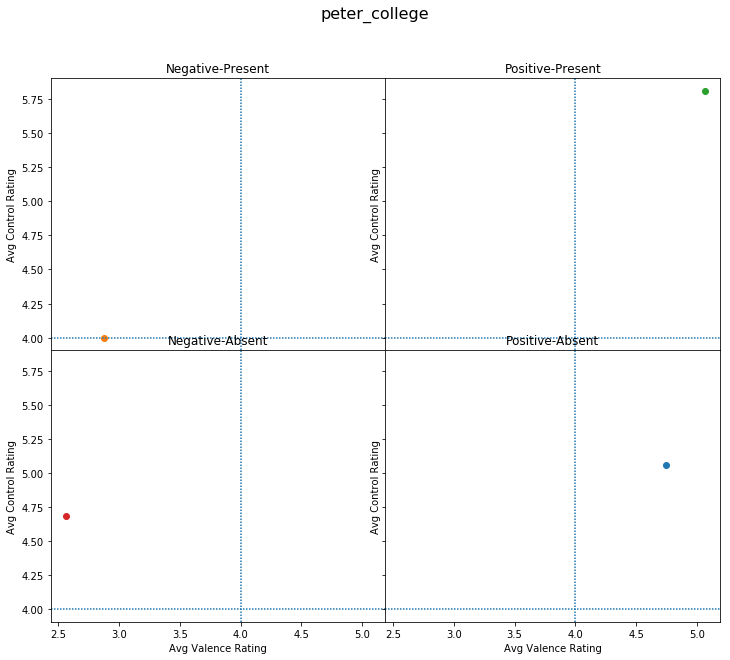

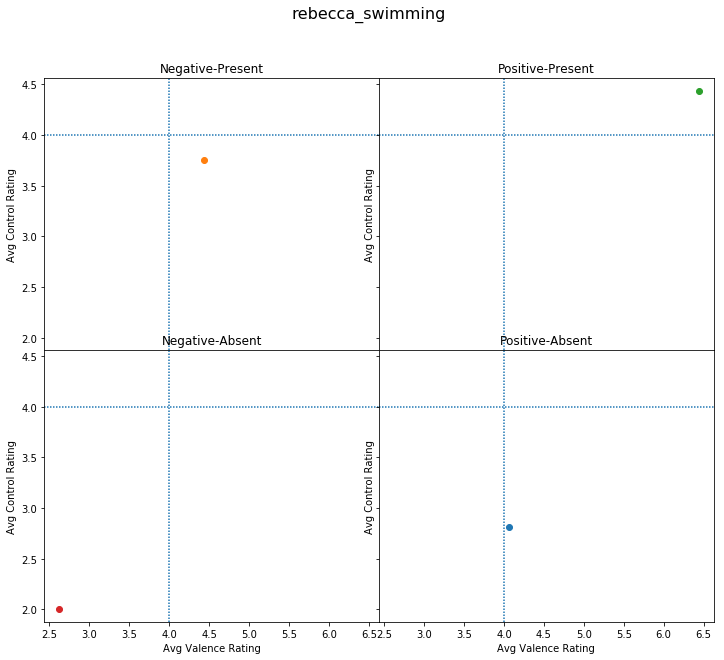

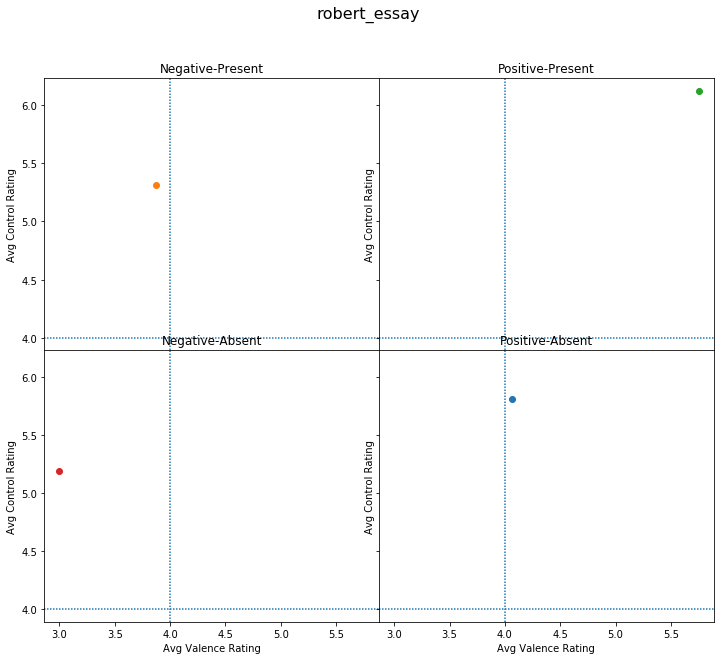

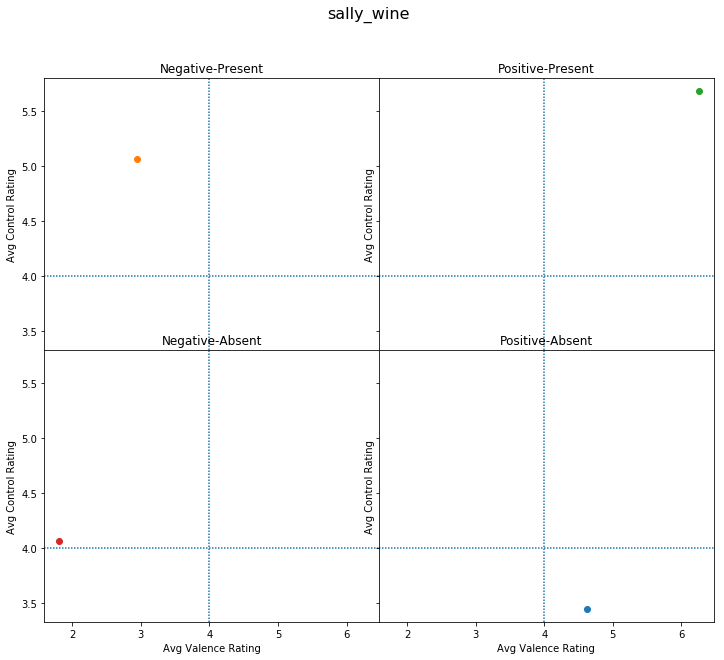

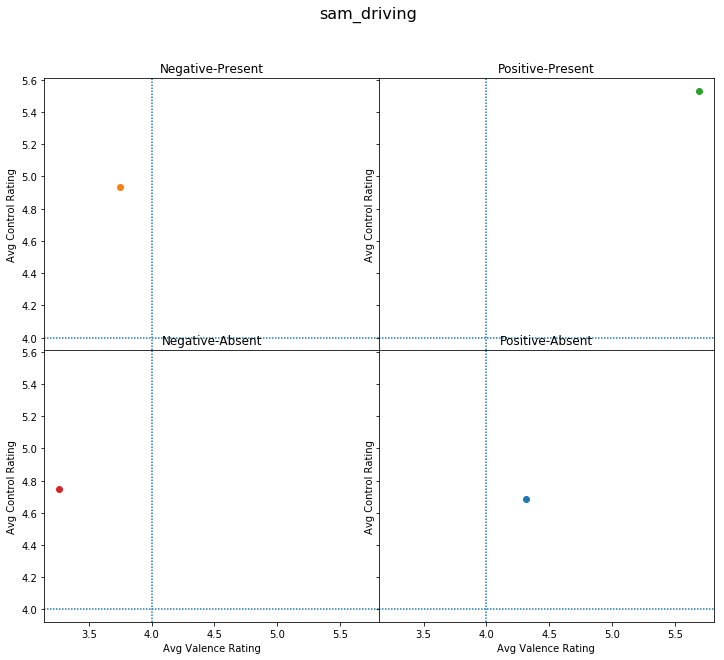

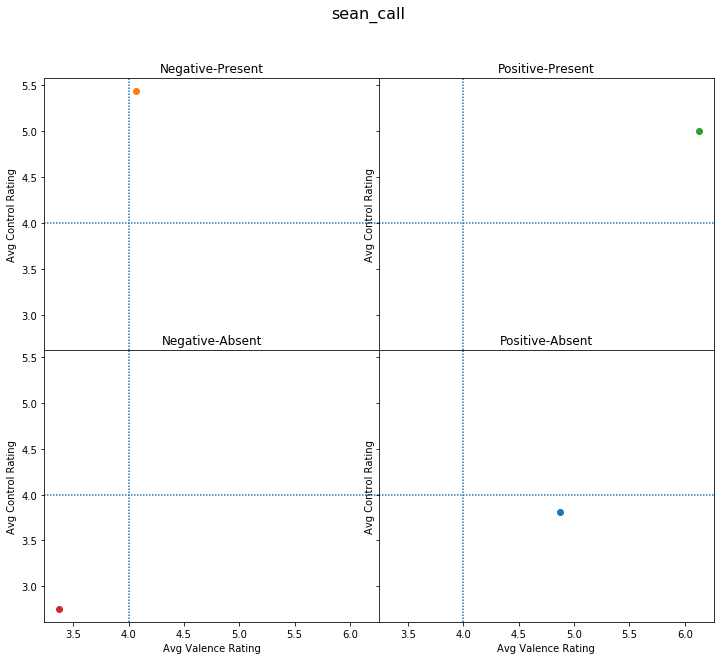

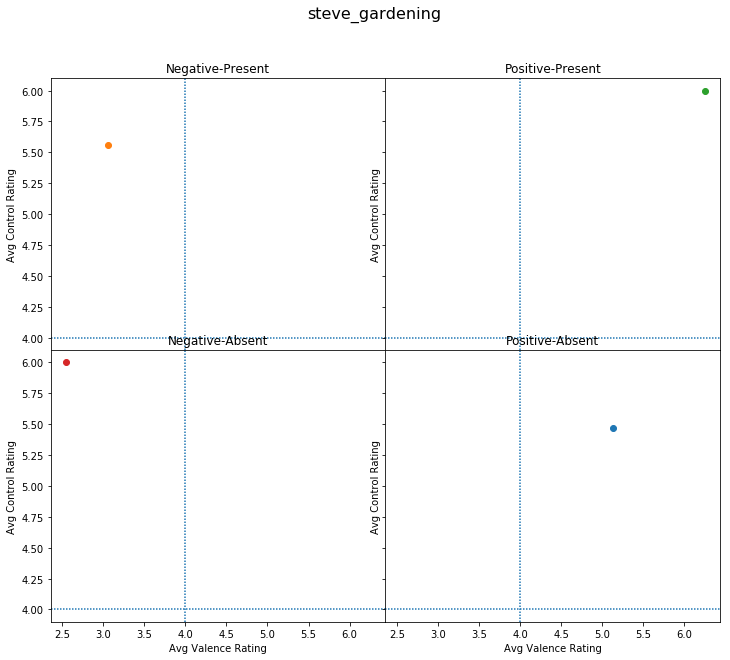

In [50]:
#Make a graph for each material in each control condition.
for mat in pre_test_data['material'].unique():
    groups = pre_test_data[pre_test_data['material'] == mat].groupby(['condition_code'])

    conditions = {'A':'Negative-Present', 'C':'Positive-Present', 'B':'Negative-Absent', 'D':'Positive-Absent'}    


    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                           figsize = (12,10))

    axs[0, 0].plot(groups.get_group('A')["numeric_valence"].mean(), 
                   groups.get_group('A')["numeric_control"].mean(),  'tab:orange', 
                   marker="o", linestyle="")
    axs[0, 0].set_title('Negative-Present')

    axs[0, 1].plot(groups.get_group('C')["numeric_valence"].mean(), 
                   groups.get_group('C')["numeric_control"].mean(), 'tab:green',
                   marker="o", linestyle="")
    axs[0, 1].set_title('Positive-Present')
    axs[1, 0].plot(groups.get_group('B')["numeric_valence"].mean(), 
                   groups.get_group('B')["numeric_control"].mean(),  'tab:red',
                   marker="o", linestyle="")
    axs[1, 0].set_title('Negative-Absent')
    axs[1, 1].plot(groups.get_group('D')["numeric_valence"].mean(), 
                   groups.get_group('D')["numeric_control"].mean(), 'tab:blue', 
                   marker="o", linestyle="")
    axs[1, 1].set_title('Positive-Absent')

    for ax in axs.flat:
        ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')

    for ax in axs.flat:
        ax.axvline(x=4, dashes = (1,1))
        ax.axhline(y=4, dashes = (1,1))

    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
        
    fig.suptitle(mat, fontsize=16)

In [51]:
#make a csv output to see which materials are salvagable.
pre_test_data.groupby(['valence_condition','means_condition','material']).agg(
                      {'numeric_valence':['mean','std'],'numeric_control':['mean', 'std']}
).to_csv('means_by_condition_material.csv')

In [52]:
# 

### Get the t-tests of whether the valence ratings are the same across the two control conditions
They are not.

In [53]:
# since the original scales are by positive = high and controllable = high number,
# I need the materials that are negative/uncontrollable to have their own value with high numbers.
opposite_numeric_ratings = [7,6,5,4,3,2,1]
opposite_numeric_valence_ratings = dict(zip(valence_order, opposite_numeric_ratings))
opposite_numeric_control_ratings = dict(zip(control_order, opposite_numeric_ratings))

pre_test_data['numeric_valence_strength'] = pre_test_data['valence'].loc[pre_test_data['valence_condition'] == 'positive'].map(
    lambda x: numeric_valence_ratings[x] if x != -9999 else None
)

pre_test_data['numeric_control_strength'] = pre_test_data['control'].loc[pre_test_data['means_condition'] == 'present'].map(
    lambda x: numeric_control_ratings[x] if x != -9999 else None
)

pre_test_data['numeric_valence_strength'].loc[pre_test_data['valence_condition'] == 'negative'] = pre_test_data['valence'].loc[pre_test_data['valence_condition'] == 'negative'].map(
    lambda x: opposite_numeric_valence_ratings[x] if x != -9999 else None
)

pre_test_data['numeric_control_strength'].loc[pre_test_data['means_condition'] == 'absent'] = pre_test_data['control'].loc[pre_test_data['means_condition'] == 'absent'].map(
    lambda x: opposite_numeric_control_ratings[x] if x != -9999 else None
)

/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [54]:
#dataframe to hold the t-test info.
t_tests_valencexcontrol = pd.DataFrame(columns=["cond", 'material','M_absent', 'SD_absent', 'M_present', 'SD_present', 
                                            't', 'p'])

#for each valence, compare answers
for valence in ['negative','positive']:
    #for each material
    for material in pre_test_data['material'].unique():

        data = pre_test_data[(pre_test_data['valence_condition'] == valence) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['means_condition'] == 'absent']['numeric_control'], 
                                   data[data['means_condition'] == 'present']['numeric_control'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")


        t_tests_valencexcontrol = t_tests_valencexcontrol.append({
                #condition info
                'cond': data['valence_condition'].unique()[0] ,
                'material': material,

                #get means and standard deviations
                'M_absent': np.mean(data['numeric_control'].loc[data['means_condition'] == 'absent']),
                'SD_absent': np.std(data['numeric_control'].loc[data['means_condition'] == 'absent']),
                'M_present': np.mean(data['numeric_control'].loc[data['means_condition'] == 'present']),
                'SD_present': np.std(data['numeric_control'].loc[data['means_condition'] == 'present']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


LGs2r3 steve_gardening was unable to be tested because the order conditions were unequal.


In [55]:
print(len(t_tests_valencexcontrol[t_tests_valencexcontrol['p']<=0.05]))
t_tests_valencexcontrol[t_tests_valencexcontrol['p']<=0.05]

12


cond           material  M_absent  SD_absent  M_present  SD_present  \
2   negative    belinda_meeting    2.9375   1.197328   4.533333    1.024153   
10  negative          lucy_loan    4.0625   1.390537   5.625000    1.165922   
14  negative   rebecca_swimming    2.0000   0.707107   3.750000    1.750000   
18  negative          sean_call    2.7500   0.750000   5.437500    0.863767   
19  negative    steve_gardening    6.0000   0.707107   5.562500    1.273222   
22  positive    belinda_meeting    4.4375   1.273222   5.375000    1.053269   
23  positive       bill_holiday    3.1250   1.408678   4.312500    1.260890   
32  positive  michael_breakfast    4.8125   1.285435   5.800000    1.045626   
33  positive      peter_college    5.0625   1.028880   5.812500    0.726184   
34  positive   rebecca_swimming    2.8125   1.333171   4.437500    1.367879   
36  positive         sally_wine    3.4375   1.367879   5.687500    1.157516   
38  positive          sean_call    3.8125   1.285435   5.000000    1.224745   

              t             p  
2     -3.360672  4.663877e-03  
10    -3.358808  4.306818e-03  
14    -3.723966  2.036642e-03  
18   -10.596577  2.319132e-08  
19 -9999.000000 -9.999000e+03  
22    -2.216453  4.253721e-02  
23    -2.967301  9.590100e-03  
32    -3.095624  7.900765e-03  
33    -2.422719  2.852807e-02  
34    -3.992918  1.176138e-03  
36    -5.443725  6.785849e-05  
38    -2.823998  1.282315e-02

### Get the t-tests of whether the controllability ratings are the same across the two valence conditions
They also are not.

In [56]:
#dataframe to hold the t-test info.
t_tests_controlxvalence = pd.DataFrame(columns=["cond", 'material','M_positive', 'SD_positive', 'M_negative', 
                                            'SD_negative', 't', 'p'])

#for each valence, compare answers
for control in ['absent','present']:
    #for each material
    for material in pre_test_data['material'].unique():

        data = pre_test_data[(pre_test_data['means_condition'] == control) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['valence_condition'] == 'positive']['numeric_valence_strength'], 
                                   data[data['valence_condition'] == 'negative']['numeric_valence_strength'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")


        t_tests_controlxvalence = t_tests_controlxvalence.append({
                #condition info
                'cond': data['means_condition'].unique()[0] ,
                'material': material,

                #get means and standard deviations
                'M_positive': np.mean(data['numeric_control_strength'].loc[data['valence_condition'] == 'positive']),
                'SD_positive': np.std(data['numeric_control_strength'].loc[data['valence_condition'] == 'positive']),
                'M_negative': np.mean(data['numeric_control_strength'].loc[data['valence_condition'] == 'negative']),
                'SD_negative': np.std(data['numeric_control_strength'].loc[data['valence_condition'] == 'negative']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)

LGs2r3 steve_gardening was unable to be tested because the order conditions were unequal.


In [57]:
t_tests_controlxvalence['M_difference'] = t_tests_controlxvalence['M_negative'] - t_tests_controlxvalence['M_positive']

In [58]:
print(len(t_tests_controlxvalence[t_tests_controlxvalence['p']<=0.05]))
t_tests_controlxvalence[t_tests_controlxvalence['p']<=0.05]

29


cond           material  M_positive  SD_positive  M_negative  \
3    absent       bill_holiday    4.875000     1.408678    5.375000   
4    absent            bob_job    2.937500     1.599560    3.875000   
6    absent         john_party    2.250000     0.661438    3.866667   
7    absent          karen_bus    4.687500     1.260890    4.500000   
8    absent       katie_kitten    5.066667     0.771722    5.062500   
9    absent    louise_shopping    2.375000     0.992157    1.875000   
11   absent          mary_food    4.466667     1.586050    4.375000   
13   absent      peter_college    2.937500     1.028880    3.312500   
14   absent   rebecca_swimming    5.187500     1.333171    6.000000   
15   absent       robert_essay    2.187500     0.726184    2.812500   
16   absent         sally_wine    4.562500     1.367879    3.937500   
19   absent    steve_gardening    2.533333     1.454495    2.000000   
20  present         alan_plane    5.250000     0.901388    3.437500   
21  present     anna_interview    5.937500     0.747391    4.812500   
22  present    belinda_meeting    5.375000     1.053269    4.533333   
24  present            bob_job    5.000000     1.224745    4.687500   
25  present         edith_exam    5.750000     0.750000    5.187500   
26  present         john_party    6.125000     0.695971    4.875000   
27  present          karen_bus    4.266667     1.436044    3.625000   
28  present       katie_kitten    3.312500     1.356408    2.875000   
30  present          lucy_loan    5.250000     1.198958    5.625000   
31  present          mary_food    4.625000     1.494783    3.750000   
32  present  michael_breakfast    5.800000     1.045626    5.187500   
34  present   rebecca_swimming    4.437500     1.367879    3.750000   
35  present       robert_essay    6.125000     0.599479    5.312500   
36  present         sally_wine    5.687500     1.157516    5.062500   
37  present        sam_driving    5.533333     0.956847    4.937500   
38  present          sean_call    5.000000     1.224745    5.437500   
39  present    steve_gardening    6.000000     0.707107    5.562500   

    SD_negative            t             p  M_difference  
3      1.452369    -5.646279  4.648128e-05      0.500000  
4      1.316957    -8.387028  4.789437e-07      0.937500  
6      1.586050     3.838859  1.806805e-03      1.616667  
7      1.172604    -7.737493  1.295489e-06     -0.187500  
8      1.297534    -9.682458  7.626918e-08     -0.004167  
9      1.218349   -11.000000  1.406252e-08     -0.500000  
11     1.452369    -5.325537  8.483478e-05     -0.091667  
13     1.685184    -2.550564  2.217317e-02      0.375000  
14     0.707107    -3.516317  3.117389e-03      0.812500  
15     1.073473    -2.457146  2.666428e-02      0.625000  
16     1.559998    -4.579646  3.612809e-04     -0.625000  
19     0.707107 -9999.000000 -9.999000e+03     -0.533333  
20     1.116286     5.775201  4.807260e-05     -1.812500  
21     1.467087     5.526794  7.457361e-05     -1.125000  
22     1.024153     7.414574  2.167105e-06     -0.841667  
24     0.845484    -2.656845  1.794419e-02     -0.312500  
25     0.949918    14.090047  4.680776e-10     -0.562500  
26     1.218349     3.833491  1.826038e-03     -1.250000  
27     1.494783     2.643312  1.843605e-02     -0.641667  
28     1.268611    -3.999539  1.160405e-03     -0.437500  
30     1.165922     5.891883  2.959673e-05      0.375000  
31     1.785357     3.436857  3.669486e-03     -0.875000  
32     1.184206     4.037864  1.073433e-03     -0.612500  
34     1.750000    10.022127  4.853639e-08     -0.687500  
35     1.043956     5.664681  4.492286e-05     -0.812500  
36     0.826797     8.733133  2.877772e-07     -0.625000  
37     1.297534     7.064394  3.844964e-06     -0.595833  
38     0.863767     6.142557  1.883019e-05      0.437500  
39     1.273222     5.175073  1.130207e-04     -0.437500

### 2x2 Repeated Measures ANOVA. Get an ANOVA of the control and valence DV measures by the control and valence IV groups. 

In [59]:
#using statsmodels, which I am not very confident in...
from statsmodels.stats.anova import AnovaRM

aovrm = AnovaRM(pre_test_data, 'numeric_valence', 'user_id', within=['valence_condition','means_condition'], 
                aggregate_func='mean')
res = aovrm.fit()

print(res)

                             Anova
                                  F Value  Num DF  Den DF Pr > F
----------------------------------------------------------------
valence_condition                 542.4767 1.0000 63.0000 0.0000
means_condition                   257.7830 1.0000 63.0000 0.0000
valence_condition:means_condition  26.5869 1.0000 63.0000 0.0000



In [60]:
aovrm = AnovaRM(pre_test_data, 'numeric_control', 'user_id', within=['valence_condition','means_condition'], 
                aggregate_func='mean')
res = aovrm.fit()

print(res)

                             Anova
                                  F Value Num DF  Den DF Pr > F
---------------------------------------------------------------
valence_condition                 28.5485 1.0000 63.0000 0.0000
means_condition                   64.4925 1.0000 63.0000 0.0000
valence_condition:means_condition  1.1111 1.0000 63.0000 0.2959



In [61]:
#using pingouin, which looks good...
import pingouin as pg

pg.rm_anova(pre_test_data, dv='numeric_valence', within=['valence_condition','means_condition'], subject='user_id', 
            correction='auto', effsize='np2')


Source          SS  ddof1  ddof2          MS  \
0                    valence_condition  317.619229      1     63  317.619229   
1                      means_condition   71.244150      1     63   71.244150   
2  valence_condition * means_condition    8.869229      1     63    8.869229   

            F         p-unc     p-GG-corr       np2  eps  
0  542.476721  1.166245e-32  1.166245e-32  0.895950  1.0  
1  257.782961  6.025295e-24  6.025295e-24  0.803606  1.0  
2   26.586927  2.711589e-06  2.711589e-06  0.296772  1.0

In [62]:
pg.rm_anova(pre_test_data, dv='numeric_control', within=['valence_condition','means_condition'], subject='user_id', 
            correction='auto', effsize='np2')


Source         SS  ddof1  ddof2         MS  \
0                    valence_condition  16.964102      1     63  16.964102   
1                      means_condition  20.987852      1     63  20.987852   
2  valence_condition * means_condition   1.515977      1     63   1.515977   

           F         p-unc     p-GG-corr       np2  eps  
0  28.548491  1.339989e-06  1.339989e-06  0.311840  1.0  
1  64.492492  3.152760e-11  3.152760e-11  0.505853  1.0  
2   1.111135  2.958613e-01  2.958613e-01  0.017331  1.0

### Look for an interaction effect with graphs.

Valence appears to be the only construct that is reliably changed across the condition pairs. Interestingly, when the means are absent, control ratings go down slightly, but valence ratings are reduced considerably. It seems like valence is the construct affected by means manipulation, rather than controllability which remains somewhat unaffected by either means or valence manipulations.

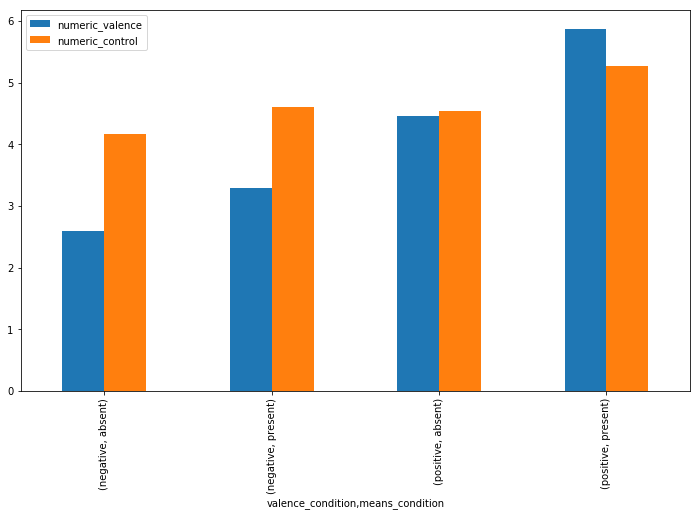

In [63]:
pre_test_data.groupby(['valence_condition','means_condition'])[['numeric_valence','numeric_control']].mean().plot.bar(figsize = (12,7))


There appears to be a significant difference in valence ratings between all 4 groups. There is only a possible significant difference in control ratings between the Positive-Present condition and the three others.

In [64]:
four_groups = pre_test_data.groupby(['valence_condition','means_condition'])['numeric_valence'].agg({'mean', 'sem'}).reset_index()
four_groups

/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



valence_condition means_condition      mean       sem
0          negative          absent  2.601911  0.057703
1          negative         present  3.288401  0.072925
2          positive          absent  4.457413  0.073739
3          positive         present  5.880126  0.062192

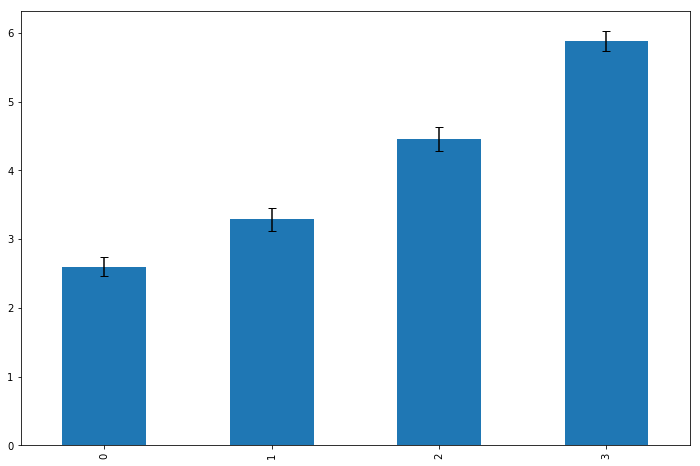

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
(four_groups['mean'].plot.bar(yerr=four_groups['sem'] * 2.306, ax=ax, capsize=4)
)
plt.show()

If we look at the graph of mean valence by mean controllability for each of the four condition pairs, this effect is seen even more prominently. If you go from means-absent to means-present (for either valence condition), both the valence and the controllability ratings are higher. If you go from negative to positive (for either means condition), both the valence and the controllability ratings are higher.

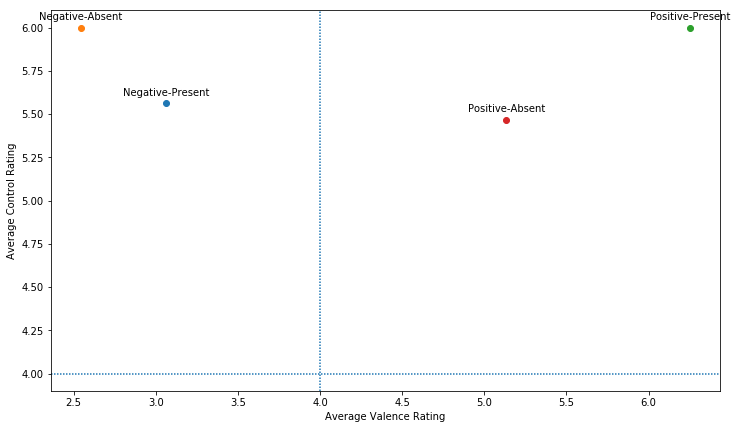

In [66]:
# a scatter plot of each material as a point on a graph that has one axis for its average valence rating 
# and one for its average control rating.


plt.figure(figsize = (12,7))
for name, group in groups:
    x = group["numeric_valence"].mean()
    y = group["numeric_control"].mean()
    
    #plot
    plt.plot(x, y,            
             marker="o", linestyle="", label=conditions[name])
    
    #add data labels instead of legend
    plt.annotate(conditions[name], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('Average Valence Rating')
plt.ylabel('Average Control Rating')

plt.axvline(x=4, dashes = (1,1))
plt.axhline(y=4, dashes = (1,1))


#### Try one with only the highest scoring materials across the four condition pairs.
But it looks exactly the same.

In [67]:
# a scatter plot of each material as a point on a graph that has one axis for its average valence rating 
# and one for its average control rating.

high_score_materials = ['anna_interview','belinda_meeting','bill_holiday','john_party','karen_bus', 
                    'michael_breakfast', 'peter_college', 'robert_essay','sally_wine','sean_call','steve_gardening']

better_data_maybe = pre_test_data.loc[pre_test_data['material'].isin(high_score_materials)]
#better_data_maybe

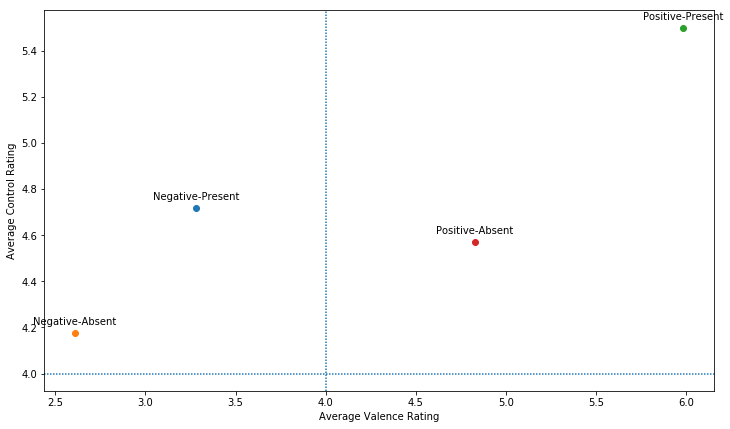

In [68]:
better_data_groups = better_data_maybe.groupby(['condition_code'])

plt.figure(figsize = (12,7))
for name, group in better_data_groups:
    x = group["numeric_valence"].mean()
    y = group["numeric_control"].mean()
    
    #plot
    plt.plot(x, y,            
             marker="o", linestyle="", label=conditions[name])
    
    #add data labels instead of legend
    plt.annotate(conditions[name], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('Average Valence Rating')
plt.ylabel('Average Control Rating')

plt.axvline(x=4, dashes = (1,1))
plt.axhline(y=4, dashes = (1,1))


#### Try one with only the highest scoring materials for "means-absent" only.
Which at least puts the means in the correct quadrants.

In [69]:
# a scatter plot of each material as a point on a graph that has one axis for its average valence rating 
# and one for its average control rating.

high_absent_score_materials = ['belinda_meeting','bill_holiday','karen_bus', 'katie_kitten', 'mary_food',
                        'rebecca_swimming','sally_wine','sean_call']

better_data_absent = pre_test_data.loc[pre_test_data['material'].isin(high_absent_score_materials)]
#better_data_absent

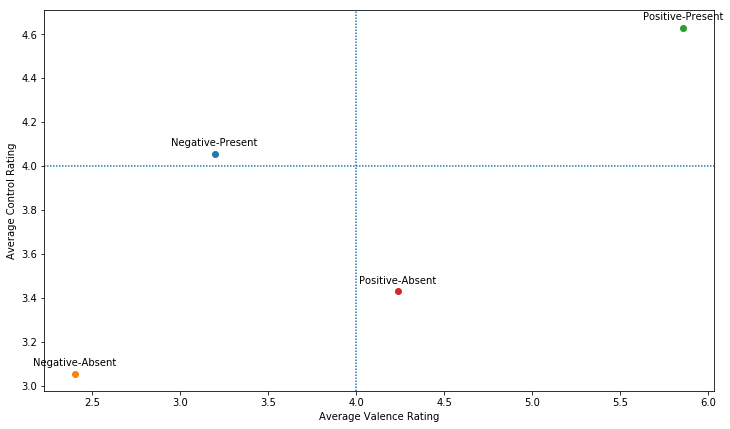

In [70]:
better_data_absent_groups = better_data_absent.groupby(['condition_code'])

plt.figure(figsize = (12,7))
for name, group in better_data_absent_groups:
    x = group["numeric_valence"].mean()
    y = group["numeric_control"].mean()
    
    #plot
    plt.plot(x, y,            
             marker="o", linestyle="", label=conditions[name])
    
    #add data labels instead of legend
    plt.annotate(conditions[name], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('Average Valence Rating')
plt.ylabel('Average Control Rating')

plt.axvline(x=4, dashes = (1,1))
plt.axhline(y=4, dashes = (1,1))


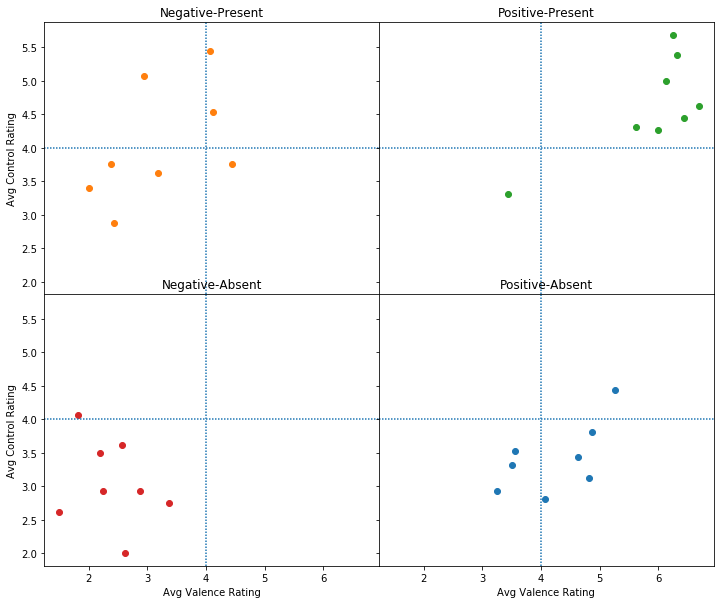

In [71]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(better_data_absent_groups.get_group('A').groupby('material')["numeric_valence"].mean(), 
               better_data_absent_groups.get_group('A').groupby('material')["numeric_control"].mean(),  'tab:orange', 
               marker="o", linestyle="")
axs[0, 0].set_title('Negative-Present')

axs[0, 1].plot(better_data_absent_groups.get_group('C').groupby('material')["numeric_valence"].mean(), 
               better_data_absent_groups.get_group('C').groupby('material')["numeric_control"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Positive-Present')
axs[1, 0].plot(better_data_absent_groups.get_group('B').groupby('material')["numeric_valence"].mean(), 
               better_data_absent_groups.get_group('B').groupby('material')["numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Negative-Absent')
axs[1, 1].plot(better_data_absent_groups.get_group('D').groupby('material')["numeric_valence"].mean(), 
               better_data_absent_groups.get_group('D').groupby('material')["numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Positive-Absent')

for ax in axs.flat:
    ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=4, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Try one with the highest scores in Negative-Present and Absent.

In [72]:
# a scatter plot of each material as a point on a graph that has one axis for its average valence rating 
# and one for its average control rating.

high_negative_present_score_materials = ['belinda_meeting','bill_holiday','karen_bus', 'katie_kitten', 'mary_food',
                                         'sally_wine','sean_call']

better_data_negative_present = pre_test_data.loc[pre_test_data['material'].isin(high_negative_present_score_materials)]
#better_data_absent

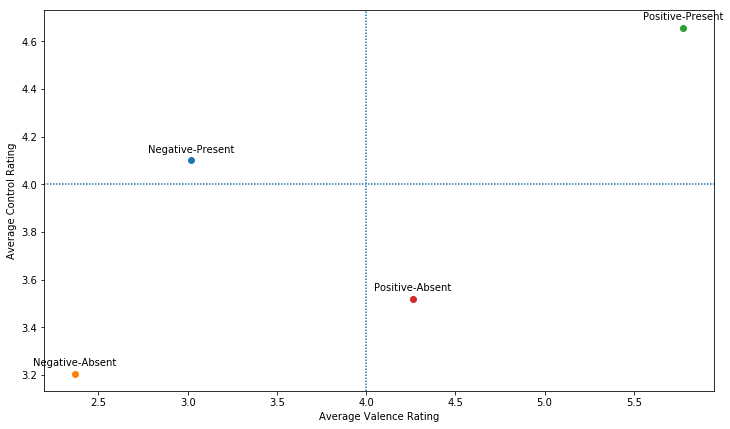

In [73]:
better_data_negative_present_groups = better_data_negative_present.groupby(['condition_code'])

plt.figure(figsize = (12,7))
for name, group in better_data_negative_present_groups:
    x = group["numeric_valence"].mean()
    y = group["numeric_control"].mean()
    
    #plot
    plt.plot(x, y,            
             marker="o", linestyle="", label=conditions[name])
    
    #add data labels instead of legend
    plt.annotate(conditions[name], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('Average Valence Rating')
plt.ylabel('Average Control Rating')

plt.axvline(x=4, dashes = (1,1))
plt.axhline(y=4, dashes = (1,1))


#### Try one with the materials that appear above the cut-off in at least two categories.

In [74]:
# a scatter plot of each material as a point on a graph that has one axis for its average valence rating 
# and one for its average control rating.

two_condition_materials = ['anna_interview','belinda_meeting','bill_holiday','bob_job','john_party','karen_bus', 
                           'louise_shopping','mary_food','michael_breakfast', 'peter_college','rebecca_swimming',
                           'robert_essay','sally_wine','sam_driving','sean_call','steve_gardening']

better_data_two_condition = pre_test_data.loc[pre_test_data['material'].isin(two_condition_materials)]
#better_data_absent

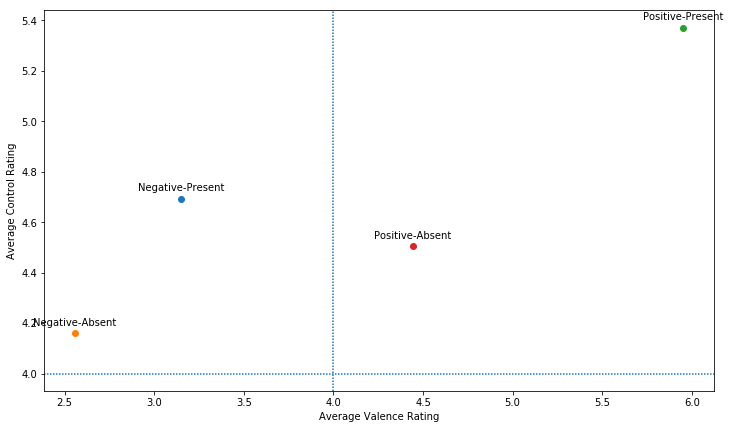

In [75]:
better_data_two_condition_groups = better_data_two_condition.groupby(['condition_code'])

plt.figure(figsize = (12,7))
for name, group in better_data_two_condition_groups:
    x = group["numeric_valence"].mean()
    y = group["numeric_control"].mean()
    
    #plot
    plt.plot(x, y,            
             marker="o", linestyle="", label=conditions[name])
    
    #add data labels instead of legend
    plt.annotate(conditions[name], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
plt.xlabel('Average Valence Rating')
plt.ylabel('Average Control Rating')

plt.axvline(x=4, dashes = (1,1))
plt.axhline(y=4, dashes = (1,1))


### Correlation Analyses

Do material-pairs in each valence-condition correlate on controllability ratings across the control-conditions?

In [76]:
correlate_pre_test_data = pre_test_data.groupby(['means_condition','valence_condition','material'])['numeric_control'].mean().unstack([0,1])
correlate_pre_test_data


means_condition      absent             present          
valence_condition  negative  positive  negative  positive
material                                                 
alan_plane         4.312500  5.312500  3.437500  5.250000
anna_interview     5.687500  5.312500  4.812500  5.937500
belinda_meeting    2.937500  4.437500  4.533333  5.375000
bill_holiday       2.625000  3.125000  3.400000  4.312500
bob_job            4.125000  5.062500  4.687500  5.000000
edith_exam         5.687500  5.875000  5.187500  5.750000
john_party         4.133333  5.750000  4.875000  6.125000
karen_bus          3.500000  3.312500  3.625000  4.266667
katie_kitten       2.937500  2.933333  2.875000  3.312500
louise_shopping    6.125000  5.625000  6.062500  5.875000
lucy_loan          4.062500  4.437500  5.625000  5.250000
mary_food          3.625000  3.533333  3.750000  4.625000
michael_breakfast  4.866667  4.812500  5.187500  5.800000
peter_college      4.687500  5.062500  4.000000  5.812500
rebecca_swimming   2.000000  2.812500  3.750000  4.437500
robert_essay       5.187500  5.812500  5.312500  6.125000
sally_wine         4.062500  3.437500  5.062500  5.687500
sam_driving        4.750000  4.687500  4.937500  5.533333
sean_call          2.750000  3.812500  5.437500  5.000000
steve_gardening    6.000000  5.466667  5.562500  6.000000

In [77]:
r =correlate_pre_test_data["absent"]["negative"].corr(correlate_pre_test_data["present"]["negative"])
print("The correlation between negative materials in which the means are present and negative materials in which the means are absent is", r)

The correlation between negative materials in which the means are present and negative materials in which the means are absent is 0.6154689825939683


In [78]:
r = correlate_pre_test_data["absent"]["positive"].corr(correlate_pre_test_data["present"]["positive"])
print("The correlation between positive materials in which the means are present and positive materials in which the means are absent is", r)

The correlation between positive materials in which the means are present and positive materials in which the means are absent is 0.8332031331893246


So, the materials (whether positive or negative) are correlated with each other on controllability so that if a "controllable" material is considered more controllable, its "uncontrollable" material counterpart is also considered more controllable; when the "controllable" material is considered less controllable, its "uncontrollable" material counterpart is also considered less controllable.

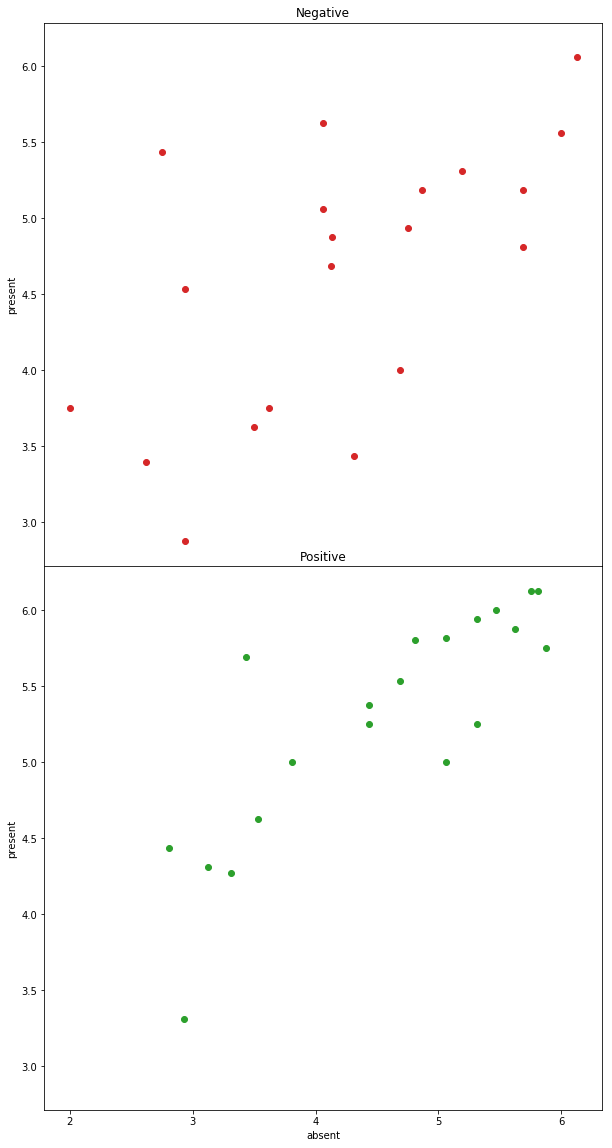

In [79]:
fig, axs = plt.subplots(2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                        figsize = (10,20))

axs[0].plot(correlate_pre_test_data["absent"]["negative"],
               correlate_pre_test_data["present"]["negative"], 'tab:red', 
               marker="o", linestyle="")
axs[0].set_title('Negative')

axs[1].plot(correlate_pre_test_data["absent"]["positive"],
               correlate_pre_test_data["present"]["positive"], 'tab:green',
               marker="o", linestyle="")
axs[1].set_title('Positive')

for ax in axs.flat:
    ax.set(xlabel='absent', ylabel='present')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Now, try where materials have the correct distance between positive and negative, and controllable and uncontrollable

In [80]:
pre_test_data.head()

MQ  expt      lg order      surveygizmo_export_filename  Response ID  \
0  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
1  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
2  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
3  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
4  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   

             Time Started          Date Submitted    Status Language  ...  \
0  May 8, 2020 6:40:58 am  May 8, 2020 6:59:07 am  Complete  English  ...   
1  May 8, 2020 6:42:20 am  May 8, 2020 7:02:51 am  Complete  English  ...   
2  May 8, 2020 6:54:49 am  May 8, 2020 7:11:21 am  Complete  English  ...   
3  May 8, 2020 7:03:56 am  May 8, 2020 7:17:08 am  Complete  English  ...   
4  May 8, 2020 6:40:58 am  May 8, 2020 6:59:07 am  Complete  English  ...   

  subset valence_condition means_condition  \
0      1          positive          absent   
1      1          positive          absent   
2      1          positive          absent   
3      1          positive          absent   
4      4          negative         present   

                                           goal_step  \
0  Alan has a plane to catch, that is departing f...   
1  Alan has a plane to catch, that is departing f...   
2  Alan has a plane to catch, that is departing f...   
3  Alan has a plane to catch, that is departing f...   
4  Anna has an important job interview to attend ...   

                                        action_step  \
0          Alan is packing his bag before the trip.   
1          Alan is packing his bag before the trip.   
2          Alan is packing his bag before the trip.   
3          Alan is packing his bag before the trip.   
4  Going to bed, Anna sets her alarm clock for 7am.   

                                      resources_step numeric_valence  \
0  Alan gets to the airport late, but clears secu...             6.0   
1  Alan gets to the airport late, but clears secu...             3.0   
2  Alan gets to the airport late, but clears secu...             6.0   
3  Alan gets to the airport late, but clears secu...             5.0   
4  Anna has read a lot about the company but does...             5.0   

  numeric_control numeric_valence_strength numeric_control_strength  
0             5.0                      6.0                      3.0  
1             6.0                      3.0                      2.0  
2             5.0                      6.0                      3.0  
3             5.0                      5.0                      3.0  
4             5.0                      3.0                      5.0  

[5 rows x 36 columns]

In [81]:
average_scoes_by_material = pre_test_data.groupby(['material','valence_condition','means_condition'])[['numeric_valence','numeric_control']].mean().unstack([1,2])
average_scoes_by_material.head()
#pre_test_data.groupby(['means_condition','valence_condition','material'])['numeric_control'].mean()


numeric_valence                             numeric_control  \
valence_condition        negative          positive                  negative   
means_condition            absent present    absent   present          absent   
material                                                                        
alan_plane                 2.6875  3.5625  5.250000  6.333333          4.3125   
anna_interview             2.7500  3.6875  4.687500  5.933333          5.6875   
belinda_meeting            2.8750  4.1250  5.266667  6.312500          2.9375   
bill_holiday               1.5000  2.0000  4.812500  5.625000          2.6250   
bob_job                    1.8750  2.3125  2.812500  4.687500          4.1250   

                                              
valence_condition           positive          
means_condition     present   absent present  
material                                      
alan_plane         3.437500   5.3125  5.2500  
anna_interview     4.812500   5.3125  5.9375  
belinda_meeting    4.533333   4.4375  5.3750  
bill_holiday       3.400000   3.1250  4.3125  
bob_job            4.687500   5.0625  5.0000

In [82]:
average_scoes_by_material.columns = average_scoes_by_material.columns.to_flat_index()

average_scoes_by_material.columns


Index([ ('numeric_valence', 'negative', 'absent'),
       ('numeric_valence', 'negative', 'present'),
        ('numeric_valence', 'positive', 'absent'),
       ('numeric_valence', 'positive', 'present'),
        ('numeric_control', 'negative', 'absent'),
       ('numeric_control', 'negative', 'present'),
        ('numeric_control', 'positive', 'absent'),
       ('numeric_control', 'positive', 'present')],
      dtype='object')

In [83]:
average_scoes_by_material['valence_negative_abs2pres'] = average_scoes_by_material[("numeric_valence", "negative", "absent")] - average_scoes_by_material[("numeric_valence", "negative", "present")]
average_scoes_by_material['valence_positive_abs2pres'] = average_scoes_by_material[('numeric_valence', 'positive', 'absent')] - average_scoes_by_material[('numeric_valence', 'positive', 'present')]
average_scoes_by_material['valence_absent_neg2pos'] = average_scoes_by_material[("numeric_valence", "negative", "absent")] - average_scoes_by_material[("numeric_valence", "positive", "absent")]
average_scoes_by_material['valence_present_neg2pos'] = average_scoes_by_material[('numeric_valence', 'negative', 'present')] - average_scoes_by_material[('numeric_valence', 'positive', 'present')]
average_scoes_by_material.head()

(numeric_valence, negative, absent)  \
material                                               
alan_plane                                    2.6875   
anna_interview                                2.7500   
belinda_meeting                               2.8750   
bill_holiday                                  1.5000   
bob_job                                       1.8750   

                 (numeric_valence, negative, present)  \
material                                                
alan_plane                                     3.5625   
anna_interview                                 3.6875   
belinda_meeting                                4.1250   
bill_holiday                                   2.0000   
bob_job                                        2.3125   

                 (numeric_valence, positive, absent)  \
material                                               
alan_plane                                  5.250000   
anna_interview                              4.687500   
belinda_meeting                             5.266667   
bill_holiday                                4.812500   
bob_job                                     2.812500   

                 (numeric_valence, positive, present)  \
material                                                
alan_plane                                   6.333333   
anna_interview                               5.933333   
belinda_meeting                              6.312500   
bill_holiday                                 5.625000   
bob_job                                      4.687500   

                 (numeric_control, negative, absent)  \
material                                               
alan_plane                                    4.3125   
anna_interview                                5.6875   
belinda_meeting                               2.9375   
bill_holiday                                  2.6250   
bob_job                                       4.1250   

                 (numeric_control, negative, present)  \
material                                                
alan_plane                                   3.437500   
anna_interview                               4.812500   
belinda_meeting                              4.533333   
bill_holiday                                 3.400000   
bob_job                                      4.687500   

                 (numeric_control, positive, absent)  \
material                                               
alan_plane                                    5.3125   
anna_interview                                5.3125   
belinda_meeting                               4.4375   
bill_holiday                                  3.1250   
bob_job                                       5.0625   

                 (numeric_control, positive, present)  \
material                                                
alan_plane                                     5.2500   
anna_interview                                 5.9375   
belinda_meeting                                5.3750   
bill_holiday                                   4.3125   
bob_job                                        5.0000   

                 valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                
alan_plane                         -0.8750                  -1.083333   
anna_interview                     -0.9375                  -1.245833   
belinda_meeting                    -1.2500                  -1.045833   
bill_holiday                       -0.5000                  -0.812500   
bob_job                            -0.4375                  -1.875000   

                 valence_absent_neg2pos  valence_present_neg2pos  
material                                                          
alan_plane                    -2.562500                -2.770833  
anna_interview                -1.937500                -2.245833  
belinda_meeting               -2.391667                -2.187500 

In [84]:
average_scoes_by_material['control_negative_abs2pres'] = average_scoes_by_material[("numeric_control", "negative", "absent")] - average_scoes_by_material[("numeric_control", "negative", "present")]
average_scoes_by_material['control_positive_abs2pres'] = average_scoes_by_material[('numeric_control', 'positive', 'absent')] - average_scoes_by_material[('numeric_control', 'positive', 'present')]
average_scoes_by_material['control_absent_neg2pos'] = average_scoes_by_material[("numeric_control", "negative", "absent")] - average_scoes_by_material[("numeric_control", "positive", "absent")]
average_scoes_by_material['control_present_neg2pos'] = average_scoes_by_material[('numeric_control', 'negative', 'present')] - average_scoes_by_material[('numeric_control', 'positive', 'present')]
average_scoes_by_material.head()

(numeric_valence, negative, absent)  \
material                                               
alan_plane                                    2.6875   
anna_interview                                2.7500   
belinda_meeting                               2.8750   
bill_holiday                                  1.5000   
bob_job                                       1.8750   

                 (numeric_valence, negative, present)  \
material                                                
alan_plane                                     3.5625   
anna_interview                                 3.6875   
belinda_meeting                                4.1250   
bill_holiday                                   2.0000   
bob_job                                        2.3125   

                 (numeric_valence, positive, absent)  \
material                                               
alan_plane                                  5.250000   
anna_interview                              4.687500   
belinda_meeting                             5.266667   
bill_holiday                                4.812500   
bob_job                                     2.812500   

                 (numeric_valence, positive, present)  \
material                                                
alan_plane                                   6.333333   
anna_interview                               5.933333   
belinda_meeting                              6.312500   
bill_holiday                                 5.625000   
bob_job                                      4.687500   

                 (numeric_control, negative, absent)  \
material                                               
alan_plane                                    4.3125   
anna_interview                                5.6875   
belinda_meeting                               2.9375   
bill_holiday                                  2.6250   
bob_job                                       4.1250   

                 (numeric_control, negative, present)  \
material                                                
alan_plane                                   3.437500   
anna_interview                               4.812500   
belinda_meeting                              4.533333   
bill_holiday                                 3.400000   
bob_job                                      4.687500   

                 (numeric_control, positive, absent)  \
material                                               
alan_plane                                    5.3125   
anna_interview                                5.3125   
belinda_meeting                               4.4375   
bill_holiday                                  3.1250   
bob_job                                       5.0625   

                 (numeric_control, positive, present)  \
material                                                
alan_plane                                     5.2500   
anna_interview                                 5.9375   
belinda_meeting                                5.3750   
bill_holiday                                   4.3125   
bob_job                                        5.0000   

                 valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                
alan_plane                         -0.8750                  -1.083333   
anna_interview                     -0.9375                  -1.245833   
belinda_meeting                    -1.2500                  -1.045833   
bill_holiday                       -0.5000                  -0.812500   
bob_job                            -0.4375                  -1.875000   

                 valence_absent_neg2pos  valence_present_neg2pos  \
material                                                           
alan_plane                    -2.562500                -2.770833   
anna_interview                -1.937500                -2.245833   
belinda_meeting               -2.391667                -2.187

In [85]:
perfect_materials = average_scoes_by_material[(average_scoes_by_material['control_negative_abs2pres'] <= -1) & 
                                              (average_scoes_by_material['control_positive_abs2pres'] <= -1) &
                                              (average_scoes_by_material['valence_absent_neg2pos'] <= -1) &
                                              (average_scoes_by_material['valence_present_neg2pos'] <= -1)]
perfect_materials

(numeric_valence, negative, absent)  \
material                                                
rebecca_swimming                               2.6250   
sally_wine                                     1.8125   
sean_call                                      3.3750   

                  (numeric_valence, negative, present)  \
material                                                 
rebecca_swimming                                4.4375   
sally_wine                                      2.9375   
sean_call                                       4.0625   

                  (numeric_valence, positive, absent)  \
material                                                
rebecca_swimming                               4.0625   
sally_wine                                     4.6250   
sean_call                                      4.8750   

                  (numeric_valence, positive, present)  \
material                                                 
rebecca_swimming                                6.4375   
sally_wine                                      6.2500   
sean_call                                       6.1250   

                  (numeric_control, negative, absent)  \
material                                                
rebecca_swimming                               2.0000   
sally_wine                                     4.0625   
sean_call                                      2.7500   

                  (numeric_control, negative, present)  \
material                                                 
rebecca_swimming                                3.7500   
sally_wine                                      5.0625   
sean_call                                       5.4375   

                  (numeric_control, positive, absent)  \
material                                                
rebecca_swimming                               2.8125   
sally_wine                                     3.4375   
sean_call                                      3.8125   

                  (numeric_control, positive, present)  \
material                                                 
rebecca_swimming                                4.4375   
sally_wine                                      5.6875   
sean_call                                       5.0000   

                  valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                 
rebecca_swimming                    -1.8125                     -2.375   
sally_wine                          -1.1250                     -1.625   
sean_call                           -0.6875                     -1.250   

                  valence_absent_neg2pos  valence_present_neg2pos  \
material                                                            
rebecca_swimming                 -1.4375                  -2.0000   
sally_wine                       -2.8125                  -3.3125   
sean_call                        -1.5000                  -2.0625   

                  control_negative_abs2pres  control_positive_abs2pres  \
material                                                                 
rebecca_swimming                    -1.7500                    -1.6250   
sally_wine                          -1.0000                    -2.2500   
sean_call                           -2.6875                    -1.1875   

                  control_absent_neg2pos  control_present_neg2pos  
material                                                           
rebecca_swimming                 -0.8125                  -0.6875  
sally_wine                        0.6250                  -0.6250  
sean_call                        -1.0625                   0.4375

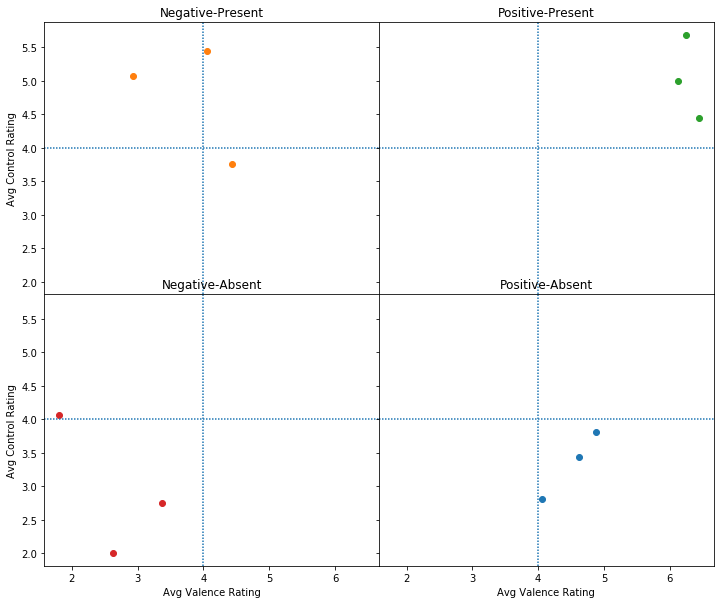

In [86]:
perf_mats_groups = pre_test_data.loc[pre_test_data['material'].isin(['rebecca_swimming','sally_wine','sean_call'])]
graph_perf_mats = perf_mats_groups.groupby(['condition_code'])



fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(graph_perf_mats.get_group('A').groupby('material')["numeric_valence"].mean(), 
               graph_perf_mats.get_group('A').groupby('material')["numeric_control"].mean(),  'tab:orange', 
               marker="o", linestyle="")
axs[0, 0].set_title('Negative-Present')

axs[0, 1].plot(graph_perf_mats.get_group('C').groupby('material')["numeric_valence"].mean(), 
               graph_perf_mats.get_group('C').groupby('material')["numeric_control"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Positive-Present')
axs[1, 0].plot(graph_perf_mats.get_group('B').groupby('material')["numeric_valence"].mean(), 
               graph_perf_mats.get_group('B').groupby('material')["numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Negative-Absent')
axs[1, 1].plot(graph_perf_mats.get_group('D').groupby('material')["numeric_valence"].mean(), 
               graph_perf_mats.get_group('D').groupby('material')["numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Positive-Absent')

for ax in axs.flat:
    ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=4, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
# z = [0.15, 0.3, 0.45, 0.6, 0.75]
# n = [58, 651, 393, 203, 123] which is material names for me

# fig, ax = plt.subplots()
# ax.scatter(z, y)

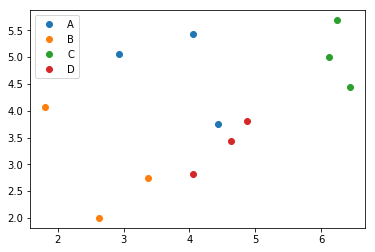

In [87]:
for name, group in graph_perf_mats:
    plt.plot(group.groupby('material')["numeric_valence"].mean(), 
             group.groupby('material')["numeric_control"].mean(), 
             marker="o", linestyle="", label=name
             )

        
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=4, dashes = (1,1))
    
plt.legend()

In [88]:
plotly_graph_data = perf_mats_groups.groupby(['material','condition_code'])[['numeric_valence','numeric_control']].mean().reset_index()
plotly_graph_data

material condition_code  numeric_valence  numeric_control
0   rebecca_swimming              A           4.4375           3.7500
1   rebecca_swimming              B           2.6250           2.0000
2   rebecca_swimming              C           6.4375           4.4375
3   rebecca_swimming              D           4.0625           2.8125
4         sally_wine              A           2.9375           5.0625
5         sally_wine              B           1.8125           4.0625
6         sally_wine              C           6.2500           5.6875
7         sally_wine              D           4.6250           3.4375
8          sean_call              A           4.0625           5.4375
9          sean_call              B           3.3750           2.7500
10         sean_call              C           6.1250           5.0000
11         sean_call              D           4.8750           3.8125

In [89]:
import plotly.express as px

fig = px.scatter(plotly_graph_data, x="numeric_valence", y="numeric_control", color="material", symbol="condition_code",
                 hover_data=['condition_code'])
fig.show()

#### Get a few more:

In [90]:
perfect_materials2 = average_scoes_by_material[(average_scoes_by_material['control_negative_abs2pres'] <= -.50) & 
                                              (average_scoes_by_material['control_positive_abs2pres'] <= -.50) &
                                              (average_scoes_by_material['valence_absent_neg2pos'] <= -1) &
                                              (average_scoes_by_material['valence_present_neg2pos'] <= -1)]
perfect_materials2

(numeric_valence, negative, absent)  \
material                                                
belinda_meeting                                2.8750   
bill_holiday                                   1.5000   
lucy_loan                                      3.1250   
rebecca_swimming                               2.6250   
sally_wine                                     1.8125   
sean_call                                      3.3750   

                  (numeric_valence, negative, present)  \
material                                                 
belinda_meeting                                 4.1250   
bill_holiday                                    2.0000   
lucy_loan                                       4.1250   
rebecca_swimming                                4.4375   
sally_wine                                      2.9375   
sean_call                                       4.0625   

                  (numeric_valence, positive, absent)  \
material                                                
belinda_meeting                              5.266667   
bill_holiday                                 4.812500   
lucy_loan                                    5.187500   
rebecca_swimming                             4.062500   
sally_wine                                   4.625000   
sean_call                                    4.875000   

                  (numeric_valence, positive, present)  \
material                                                 
belinda_meeting                                 6.3125   
bill_holiday                                    5.6250   
lucy_loan                                       6.1250   
rebecca_swimming                                6.4375   
sally_wine                                      6.2500   
sean_call                                       6.1250   

                  (numeric_control, negative, absent)  \
material                                                
belinda_meeting                                2.9375   
bill_holiday                                   2.6250   
lucy_loan                                      4.0625   
rebecca_swimming                               2.0000   
sally_wine                                     4.0625   
sean_call                                      2.7500   

                  (numeric_control, negative, present)  \
material                                                 
belinda_meeting                               4.533333   
bill_holiday                                  3.400000   
lucy_loan                                     5.625000   
rebecca_swimming                              3.750000   
sally_wine                                    5.062500   
sean_call                                     5.437500   

                  (numeric_control, positive, absent)  \
material                                                
belinda_meeting                                4.4375   
bill_holiday                                   3.1250   
lucy_loan                                      4.4375   
rebecca_swimming                               2.8125   
sally_wine                                     3.4375   
sean_call                                      3.8125   

                  (numeric_control, positive, present)  \
material                                                 
belinda_meeting                                 5.3750   
bill_holiday                                    4.3125   
lucy_loan                                       5.2500   
rebecca_swimming                                4.4375   
sally_wine                                      5.6875   
sean_call                                       5.0000   

                  valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                 
belinda_meeting                     -1.2500                  -1.045833   
bill_holiday                        -0.5000                  -0.812500   
lucy_loan                         

In [91]:
perf_mats2_groups = pre_test_data.loc[pre_test_data['material'].isin(['belinda_meeting','bill_holiday','john_party',
                                                                     'lucy_loan','rebecca_swimming',
                                                                     'sally_wine','sean_call'])]

plotly_graph_data = perf_mats2_groups.groupby(['material','condition_code'])[['numeric_valence','numeric_control']].mean().reset_index()
plotly_graph_data

material condition_code  numeric_valence  numeric_control
0    belinda_meeting              A         4.125000         4.533333
1    belinda_meeting              B         2.875000         2.937500
2    belinda_meeting              C         6.312500         5.375000
3    belinda_meeting              D         5.266667         4.437500
4       bill_holiday              A         2.000000         3.400000
5       bill_holiday              B         1.500000         2.625000
6       bill_holiday              C         5.625000         4.312500
7       bill_holiday              D         4.812500         3.125000
8         john_party              A         3.466667         4.875000
9         john_party              B         3.125000         4.133333
10        john_party              C         6.312500         6.125000
11        john_party              D         6.066667         5.750000
12         lucy_loan              A         4.125000         5.625000
13         lucy_loan              B         3.125000         4.062500
14         lucy_loan              C         6.125000         5.250000
15         lucy_loan              D         5.187500         4.437500
16  rebecca_swimming              A         4.437500         3.750000
17  rebecca_swimming              B         2.625000         2.000000
18  rebecca_swimming              C         6.437500         4.437500
19  rebecca_swimming              D         4.062500         2.812500
20        sally_wine              A         2.937500         5.062500
21        sally_wine              B         1.812500         4.062500
22        sally_wine              C         6.250000         5.687500
23        sally_wine              D         4.625000         3.437500
24         sean_call              A         4.062500         5.437500
25         sean_call              B         3.375000         2.750000
26         sean_call              C         6.125000         5.000000
27         sean_call              D         4.875000         3.812500

In [92]:
import plotly.graph_objects as go

# fig = px.scatter(plotly_graph_data, x="numeric_valence", y="numeric_control", 
#                  color="material", symbol="condition_code", mode = 'lines+markers',
#                  hover_data=['condition_code'])

fig = go.Figure()
for mat in plotly_graph_data['material'].unique():
    fig.add_trace(go.Scatter(x = plotly_graph_data[(plotly_graph_data['material']==mat)
                                                  ]['numeric_valence'], 
                             y = plotly_graph_data[(plotly_graph_data['material']==mat) 
                                                  ]['numeric_control'], 
                             mode = 'lines+markers',
                             text=plotly_graph_data['condition_code'],#,color="material", symbol="condition_code"
                             hoverinfo="text",
                             name=mat
                        ))

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

fig.show()

In [93]:
good_materials = average_scoes_by_material[(average_scoes_by_material['control_negative_abs2pres'] <= -.50) & 
                                              (average_scoes_by_material['control_positive_abs2pres'] <= -.50)]
good_materials

(numeric_valence, negative, absent)  \
material                                                
belinda_meeting                                2.8750   
bill_holiday                                   1.5000   
lucy_loan                                      3.1250   
rebecca_swimming                               2.6250   
sally_wine                                     1.8125   
sean_call                                      3.3750   

                  (numeric_valence, negative, present)  \
material                                                 
belinda_meeting                                 4.1250   
bill_holiday                                    2.0000   
lucy_loan                                       4.1250   
rebecca_swimming                                4.4375   
sally_wine                                      2.9375   
sean_call                                       4.0625   

                  (numeric_valence, positive, absent)  \
material                                                
belinda_meeting                              5.266667   
bill_holiday                                 4.812500   
lucy_loan                                    5.187500   
rebecca_swimming                             4.062500   
sally_wine                                   4.625000   
sean_call                                    4.875000   

                  (numeric_valence, positive, present)  \
material                                                 
belinda_meeting                                 6.3125   
bill_holiday                                    5.6250   
lucy_loan                                       6.1250   
rebecca_swimming                                6.4375   
sally_wine                                      6.2500   
sean_call                                       6.1250   

                  (numeric_control, negative, absent)  \
material                                                
belinda_meeting                                2.9375   
bill_holiday                                   2.6250   
lucy_loan                                      4.0625   
rebecca_swimming                               2.0000   
sally_wine                                     4.0625   
sean_call                                      2.7500   

                  (numeric_control, negative, present)  \
material                                                 
belinda_meeting                               4.533333   
bill_holiday                                  3.400000   
lucy_loan                                     5.625000   
rebecca_swimming                              3.750000   
sally_wine                                    5.062500   
sean_call                                     5.437500   

                  (numeric_control, positive, absent)  \
material                                                
belinda_meeting                                4.4375   
bill_holiday                                   3.1250   
lucy_loan                                      4.4375   
rebecca_swimming                               2.8125   
sally_wine                                     3.4375   
sean_call                                      3.8125   

                  (numeric_control, positive, present)  \
material                                                 
belinda_meeting                                 5.3750   
bill_holiday                                    4.3125   
lucy_loan                                       5.2500   
rebecca_swimming                                4.4375   
sally_wine                                      5.6875   
sean_call                                       5.0000   

                  valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                 
belinda_meeting                     -1.2500                  -1.045833   
bill_holiday                        -0.5000                  -0.812500   
lucy_loan                         

In [94]:
good_materials = average_scoes_by_material[(average_scoes_by_material['control_negative_abs2pres'] <= -.75)]
good_materials

(numeric_valence, negative, absent)  \
material                                                
belinda_meeting                                2.8750   
bill_holiday                                   1.5000   
lucy_loan                                      3.1250   
rebecca_swimming                               2.6250   
sally_wine                                     1.8125   
sean_call                                      3.3750   

                  (numeric_valence, negative, present)  \
material                                                 
belinda_meeting                                 4.1250   
bill_holiday                                    2.0000   
lucy_loan                                       4.1250   
rebecca_swimming                                4.4375   
sally_wine                                      2.9375   
sean_call                                       4.0625   

                  (numeric_valence, positive, absent)  \
material                                                
belinda_meeting                              5.266667   
bill_holiday                                 4.812500   
lucy_loan                                    5.187500   
rebecca_swimming                             4.062500   
sally_wine                                   4.625000   
sean_call                                    4.875000   

                  (numeric_valence, positive, present)  \
material                                                 
belinda_meeting                                 6.3125   
bill_holiday                                    5.6250   
lucy_loan                                       6.1250   
rebecca_swimming                                6.4375   
sally_wine                                      6.2500   
sean_call                                       6.1250   

                  (numeric_control, negative, absent)  \
material                                                
belinda_meeting                                2.9375   
bill_holiday                                   2.6250   
lucy_loan                                      4.0625   
rebecca_swimming                               2.0000   
sally_wine                                     4.0625   
sean_call                                      2.7500   

                  (numeric_control, negative, present)  \
material                                                 
belinda_meeting                               4.533333   
bill_holiday                                  3.400000   
lucy_loan                                     5.625000   
rebecca_swimming                              3.750000   
sally_wine                                    5.062500   
sean_call                                     5.437500   

                  (numeric_control, positive, absent)  \
material                                                
belinda_meeting                                4.4375   
bill_holiday                                   3.1250   
lucy_loan                                      4.4375   
rebecca_swimming                               2.8125   
sally_wine                                     3.4375   
sean_call                                      3.8125   

                  (numeric_control, positive, present)  \
material                                                 
belinda_meeting                                 5.3750   
bill_holiday                                    4.3125   
lucy_loan                                       5.2500   
rebecca_swimming                                4.4375   
sally_wine                                      5.6875   
sean_call                                       5.0000   

                  valence_negative_abs2pres  valence_positive_abs2pres  \
material                                                                 
belinda_meeting                     -1.2500                  -1.045833   
bill_holiday                        -0.5000                  -0.812500   
lucy_loan                         

In [95]:
good_materials = average_scoes_by_material[(average_scoes_by_material['control_positive_abs2pres'] <= -.75)]
good_materials

(numeric_valence, negative, absent)  \
material                                                 
belinda_meeting                               2.875000   
bill_holiday                                  1.500000   
karen_bus                                     2.187500   
lucy_loan                                     3.125000   
mary_food                                     2.562500   
michael_breakfast                             2.937500   
peter_college                                 2.562500   
rebecca_swimming                              2.625000   
sally_wine                                    1.812500   
sam_driving                                   3.266667   
sean_call                                     3.375000   

                   (numeric_valence, negative, present)  \
material                                                  
belinda_meeting                                  4.1250   
bill_holiday                                     2.0000   
karen_bus                                        3.1875   
lucy_loan                                        4.1250   
mary_food                                        2.3750   
michael_breakfast                                2.8125   
peter_college                                    2.8750   
rebecca_swimming                                 4.4375   
sally_wine                                       2.9375   
sam_driving                                      3.7500   
sean_call                                        4.0625   

                   (numeric_valence, positive, absent)  \
material                                                 
belinda_meeting                               5.266667   
bill_holiday                                  4.812500   
karen_bus                                     3.500000   
lucy_loan                                     5.187500   
mary_food                                     3.562500   
michael_breakfast                             5.437500   
peter_college                                 4.750000   
rebecca_swimming                              4.062500   
sally_wine                                    4.625000   
sam_driving                                   4.312500   
sean_call                                     4.875000   

                   (numeric_valence, positive, present)  \
material                                                  
belinda_meeting                                6.312500   
bill_holiday                                   5.625000   
karen_bus                                      6.000000   
lucy_loan                                      6.125000   
mary_food                                      6.687500   
michael_breakfast                              6.125000   
peter_college                                  5.066667   
rebecca_swimming                               6.437500   
sally_wine                                     6.250000   
sam_driving                                    5.687500   
sean_call                                      6.125000   

                   (numeric_control, negative, absent)  \
material                                                 
belinda_meeting                               2.937500   
bill_holiday                                  2.625000   
karen_bus                                     3.500000   
lucy_loan                                     4.062500   
mary_food                                     3.625000   
michael_breakfast                             4.866667   
peter_college                                 4.687500   
rebecca_swimming                              2.000000   
sally_wine                                    4.062500   
sam_driving                                   4.750000   
sean_call                                     2.750000   

                   (numeric_control, negative, present)  \
material                                                  
belinda_meeting                                4.533333   
bill_holiday                             

### Get the t-tests of whether the controllability ratings are reliably different across the control conditions in each valence condition.

In [96]:
#dataframe to hold the t-test info.
t_tests_controlxcontrolxvalence = pd.DataFrame(columns=["cond", 'material','M_present', 'SD_present', 'M_absent', 
                                            'SD_absent', 'M_difference', 't', 'p'])

#for each valence, compare answers
for valence in ['positive','negative']:
    #for each material
    for material in pre_test_data['material'].unique():

        data = pre_test_data[(pre_test_data['valence_condition'] == valence) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['means_condition'] == 'present']['numeric_control'], 
                                   data[data['means_condition'] == 'absent']['numeric_control'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")


        t_tests_controlxcontrolxvalence = t_tests_controlxcontrolxvalence.append({
                #condition info
                'cond': data['valence_condition'].unique()[0] ,
                'material': material,

                #get means and standard deviations
                'M_present': np.mean(data['numeric_control'].loc[data['means_condition'] == 'present']),
                'SD_present': np.std(data['numeric_control'].loc[data['means_condition'] == 'present']),
                'M_absent': np.mean(data['numeric_control'].loc[data['means_condition'] == 'absent']),
                'SD_absent': np.std(data['numeric_control'].loc[data['means_condition'] == 'absent']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)

LGs2r3 steve_gardening was unable to be tested because the order conditions were unequal.


In [97]:
t_tests_controlxcontrolxvalence['M_difference'] = t_tests_controlxcontrolxvalence['M_absent'] - t_tests_controlxcontrolxvalence['M_present']

In [98]:
print(len(t_tests_controlxcontrolxvalence[t_tests_controlxcontrolxvalence['p']<=0.05]))
t_tests_controlxcontrolxvalence[t_tests_controlxcontrolxvalence['p']<=0.05]

12


cond           material  M_present  SD_present  M_absent  SD_absent  \
2   positive    belinda_meeting   5.375000    1.053269    4.4375   1.273222   
3   positive       bill_holiday   4.312500    1.260890    3.1250   1.408678   
12  positive  michael_breakfast   5.800000    1.045626    4.8125   1.285435   
13  positive      peter_college   5.812500    0.726184    5.0625   1.028880   
14  positive   rebecca_swimming   4.437500    1.367879    2.8125   1.333171   
16  positive         sally_wine   5.687500    1.157516    3.4375   1.367879   
18  positive          sean_call   5.000000    1.224745    3.8125   1.285435   
22  negative    belinda_meeting   4.533333    1.024153    2.9375   1.197328   
30  negative          lucy_loan   5.625000    1.165922    4.0625   1.390537   
34  negative   rebecca_swimming   3.750000    1.750000    2.0000   0.707107   
38  negative          sean_call   5.437500    0.863767    2.7500   0.750000   
39  negative    steve_gardening   5.562500    1.273222    6.0000   0.707107   

    M_difference            t             p  
2      -0.937500     2.216453  4.253721e-02  
3      -1.187500     2.967301  9.590100e-03  
12     -0.987500     3.095624  7.900765e-03  
13     -0.750000     2.422719  2.852807e-02  
14     -1.625000     3.992918  1.176138e-03  
16     -2.250000     5.443725  6.785849e-05  
18     -1.187500     2.823998  1.282315e-02  
22     -1.595833     3.360672  4.663877e-03  
30     -1.562500     3.358808  4.306818e-03  
34     -1.750000     3.723966  2.036642e-03  
38     -2.687500    10.596577  2.319132e-08  
39      0.437500 -9999.000000 -9.999000e+03

In [99]:
mats_meeting_stats = t_tests_controlxcontrolxvalence[t_tests_controlxcontrolxvalence['p']<=0.05][['material','cond']]
mats_meeting_stats

material      cond
2     belinda_meeting  positive
3        bill_holiday  positive
12  michael_breakfast  positive
13      peter_college  positive
14   rebecca_swimming  positive
16         sally_wine  positive
18          sean_call  positive
22    belinda_meeting  negative
30          lucy_loan  negative
34   rebecca_swimming  negative
38          sean_call  negative
39    steve_gardening  negative

In [100]:
mats_meeting_stats_groups = pre_test_data.loc[pre_test_data['material'].isin(mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['material'])]

plotly_graph_data = mats_meeting_stats_groups.groupby(['material','condition_code','valence_condition','means_condition'])[['numeric_valence','numeric_control']].mean().reset_index()
plotly_graph_data

material condition_code valence_condition means_condition  \
0     belinda_meeting              A          negative         present   
1     belinda_meeting              B          negative          absent   
2     belinda_meeting              C          positive         present   
3     belinda_meeting              D          positive          absent   
4        bill_holiday              A          negative         present   
5        bill_holiday              B          negative          absent   
6        bill_holiday              C          positive         present   
7        bill_holiday              D          positive          absent   
8           lucy_loan              A          negative         present   
9           lucy_loan              B          negative          absent   
10          lucy_loan              C          positive         present   
11          lucy_loan              D          positive          absent   
12  michael_breakfast              A          negative         present   
13  michael_breakfast              B          negative          absent   
14  michael_breakfast              C          positive         present   
15  michael_breakfast              D          positive          absent   
16      peter_college              A          negative         present   
17      peter_college              B          negative          absent   
18      peter_college              C          positive         present   
19      peter_college              D          positive          absent   
20   rebecca_swimming              A          negative         present   
21   rebecca_swimming              B          negative          absent   
22   rebecca_swimming              C          positive         present   
23   rebecca_swimming              D          positive          absent   
24         sally_wine              A          negative         present   
25         sally_wine              B          negative          absent   
26         sally_wine              C          positive         present   
27         sally_wine              D          positive          absent   
28          sean_call              A          negative         present   
29          sean_call              B          negative          absent   
30          sean_call              C          positive         present   
31          sean_call              D          positive          absent   

    numeric_valence  numeric_control  
0          4.125000         4.533333  
1          2.875000         2.937500  
2          6.312500         5.375000  
3          5.266667         4.437500  
4          2.000000         3.400000  
5          1.500000         2.625000  
6          5.625000         4.312500  
7          4.812500         3.125000  
8          4.125000         5.625000  
9          3.125000         4.062500  
10         6.125000         5.250000  
11         5.187500         4.437500  
12         2.812500         5.187500  
13         2.937500         4.866667  
14         6.125000         5.800000  
15         5.437500         4.812500  
16         2.875000         4.000000  
17         2.562500         4.687500  
18         5.066667         5.812500  
19         4.750000         5.062500  
20         4.437500         3.750000  
21         2.625000         2.000000  
22         6.437500         4.437500  
23         4.062500         2.812500  
24         2.937500         5.062500  
25         1.812500         4.062500  
26         6.250000         5.687500  
27         4.625000         3.437500  
28         4.062500         5.437500  
29         3.375000         2.750000  
30         6.125000         5.000000  
31         4.875000         3.812500

In [101]:
import plotly.graph_objects as go

# fig = px.scatter(plotly_graph_data, x="numeric_valence", y="numeric_control", 
#                  color="material", symbol="condition_code", mode = 'lines+markers',
#                  hover_data=['condition_code'])

fig = go.Figure()
for mat, val_cond in zip(mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['material'],
                         mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['cond']):
    fig.add_trace(go.Scatter(x = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_valence'], 
                             y = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_control'],
                             
                             mode = 'lines+markers',#,color="material", symbol="condition_code"
                             name= str(mat + ", " + val_cond)
                        )
                 )

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

fig.show()

Firstly, just to get the materials that have a significant difference between Mean Controllability Score in the "means_present" vs "means_absent" means_condition. Since the study is exploratory and underpowered for the t-tests conducted, the cutoff score is increased to 0.07. This has the added benefit of adding in two materials that are in both the positive and negative conditions, so that the interaction effect could potentially be assessed.

This cutoff gives us 9 positive materials and 6 negative materials, with 5 of those materials overlapping the two categories.

In [102]:
reasonable_materials = t_tests_controlxcontrolxvalence[t_tests_controlxcontrolxvalence['p']<=0.07]
print(len(reasonable_materials))
pd.options.display.float_format = '{:,.3f}'.format
reasonable_materials

15


cond           material  M_present  SD_present  M_absent  SD_absent  \
2   positive    belinda_meeting      5.375       1.053     4.438      1.273   
3   positive       bill_holiday      4.312       1.261     3.125      1.409   
7   positive          karen_bus      4.267       1.436     3.312      1.261   
10  positive          lucy_loan      5.250       1.199     4.438      1.116   
12  positive  michael_breakfast      5.800       1.046     4.812      1.285   
13  positive      peter_college      5.812       0.726     5.062      1.029   
14  positive   rebecca_swimming      4.438       1.368     2.812      1.333   
16  positive         sally_wine      5.688       1.158     3.438      1.368   
18  positive          sean_call      5.000       1.225     3.812      1.285   
22  negative    belinda_meeting      4.533       1.024     2.938      1.197   
30  negative          lucy_loan      5.625       1.166     4.062      1.391   
34  negative   rebecca_swimming      3.750       1.750     2.000      0.707   
36  negative         sally_wine      5.062       0.827     4.062      1.560   
38  negative          sean_call      5.438       0.864     2.750      0.750   
39  negative    steve_gardening      5.562       1.273     6.000      0.707   

    M_difference          t          p  
2         -0.938      2.216      0.043  
3         -1.188      2.967      0.010  
7         -0.954      1.974      0.068  
10        -0.812      1.979      0.066  
12        -0.987      3.096      0.008  
13        -0.750      2.423      0.029  
14        -1.625      3.993      0.001  
16        -2.250      5.444      0.000  
18        -1.188      2.824      0.013  
22        -1.596      3.361      0.005  
30        -1.562      3.359      0.004  
34        -1.750      3.724      0.002  
36        -1.000      2.000      0.064  
38        -2.688     10.597      0.000  
39         0.438 -9,999.000 -9,999.000

Technically, the design is underpowered for this test (a matched-pairs t-test on *n* = 16 with alpha = 0.05 only gives power of .60), so if we take a few more materials, it shouldn't be too problematic.

In [103]:
reasonable_materials.groupby('cond')['material'].nunique()

cond
negative    6
positive    9
Name: material, dtype: int64

In [104]:
reasonable_materials.groupby('material')['cond'].nunique()

material
belinda_meeting      2
bill_holiday         1
karen_bus            1
lucy_loan            2
michael_breakfast    1
peter_college        1
rebecca_swimming     2
sally_wine           2
sean_call            2
steve_gardening      1
Name: cond, dtype: int64

In [105]:
reasonable_materials_groups = pre_test_data.loc[pre_test_data['material'].isin(reasonable_materials[reasonable_materials['material']!="steve_gardening"]['material'])]
plotly_graph_data = reasonable_materials_groups.groupby(['material','condition_code','valence_condition','means_condition'])[['numeric_valence','numeric_control']].mean().reset_index()
plotly_graph_data.head()

material condition_code valence_condition means_condition  \
0  belinda_meeting              A          negative         present   
1  belinda_meeting              B          negative          absent   
2  belinda_meeting              C          positive         present   
3  belinda_meeting              D          positive          absent   
4     bill_holiday              A          negative         present   

   numeric_valence  numeric_control  
0            4.125            4.533  
1            2.875            2.938  
2            6.312            5.375  
3            5.267            4.438  
4            2.000            3.400

In [106]:
mats_meeting_stats = reasonable_materials[['material','cond']]

#### Graph the materials to be used in Expt4 - Controllability

In [107]:
import plotly.graph_objects as go

# fig = px.scatter(plotly_graph_data, x="numeric_valence", y="numeric_control", 
#                  color="material", symbol="condition_code", mode = 'lines+markers',
#                  hover_data=['condition_code'])

fig = go.Figure()
for mat, val_cond in zip(mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['material'],
                         mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['cond']):
    fig.add_trace(go.Scatter(x = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_valence'], 
                             y = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_control'],
                             
                             mode = 'lines+markers',#,color="material", symbol="condition_code"
                             name= str(mat + ", " + val_cond)
                        )
                 )
fig.update_layout(
    xaxis={'title':'Mean Valence Score (7 = "Very Positive")'},
    yaxis={'title':'Mean Controllability Score'})

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

fig.show()

In [108]:
x = reasonable_materials['M_present'].append(reasonable_materials['M_absent'])

fig = go.Figure(data=[go.Histogram(x=x, nbinsx=9)])
fig.show()

In [109]:
fig = go.Figure(data=[go.Histogram(x=reasonable_materials['M_absent'])])
fig.show()

In [110]:
fig = go.Figure(data=[go.Histogram(x=reasonable_materials['M_present'])])
fig.show()

In [111]:
import plotly.graph_objects as go

# fig = px.scatter(plotly_graph_data, x="numeric_valence", y="numeric_control", 
#                  color="material", symbol="condition_code", mode = 'lines+markers',
#                  hover_data=['condition_code'])

fig = go.Figure()
for mat, val_cond in zip(mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['material'],
                         mats_meeting_stats[mats_meeting_stats['material']!="steve_gardening"]['cond']):
    fig.add_trace(go.Scatter(x = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_valence'], 
                             y = [1,1],
                             
                             mode = 'markers',#,color="material", symbol="condition_code"
                             name= str(mat + ", " + val_cond)
                        )
                 )
fig.update_layout(
    xaxis={'title':'Mean Controllability Score'},
    yaxis={'title':'Example half of binary classification'})

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

fig.show()

#### Check if the valence scores are reliably different in this subset of materials.

If we're going to compare valence conditions or look for an interaction effect, this will be important.

In [112]:
mats_in_both = ["belinda_meeting","lucy_loan","rebecca_swimming","sally_wine","sean_call"]
# belinda_meeting      2
# bill_holiday         1
# karen_bus            1
# lucy_loan            2
# michael_breakfast    1
# peter_college        1
# rebecca_swimming     2
# sally_wine           2
# sean_call            2
# steve_gardening      1

In [113]:
#dataframe to hold the t-test info.
t_tests_valencexcontrolxcontrol = pd.DataFrame(columns=["cond", 'material',
                                                        'M_negative', 'SD_negative', 
                                                        'M_positive', 'SD_positive', 
                                            "M_difference",'t', 'p'])

#for each valence, compare answers
for control in ['absent','present']:
    #for each material
    for material in mats_in_both:

        data = pre_test_data[(pre_test_data['means_condition'] == control) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['valence_condition'] == 'negative']['numeric_valence'], 
                                   data[data['valence_condition'] == 'positive']['numeric_valence'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")


        t_tests_valencexcontrolxcontrol = t_tests_valencexcontrolxcontrol.append({
                #condition info
                'cond': control,
                'material': material,

                #get means and standard deviations
                'M_negative': np.mean(data['numeric_valence'].loc[data['valence_condition'] == 'negative']),
                'SD_negative': np.std(data['numeric_valence'].loc[data['valence_condition'] == 'negative']),
                'M_positive': np.mean(data['numeric_valence'].loc[data['valence_condition'] == 'positive']),
                'SD_positive': np.std(data['numeric_valence'].loc[data['valence_condition'] == 'positive']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


In [114]:
t_tests_valencexcontrolxcontrol['M_difference'] = t_tests_valencexcontrolxcontrol['M_negative'] - t_tests_valencexcontrolxcontrol['M_positive'] 

In [115]:
t_tests_valencexcontrolxcontrol

cond          material  M_negative  SD_negative  M_positive  \
0   absent   belinda_meeting       2.875        0.857       5.267   
1   absent         lucy_loan       3.125        1.111       5.188   
2   absent  rebecca_swimming       2.625        0.857       4.062   
3   absent        sally_wine       1.812        0.726       4.625   
4   absent         sean_call       3.375        0.781       4.875   
5  present   belinda_meeting       4.125        0.992       6.312   
6  present         lucy_loan       4.125        1.218       6.125   
7  present  rebecca_swimming       4.438        1.171       6.438   
8  present        sally_wine       2.938        0.428       6.250   
9  present         sean_call       4.062        1.144       6.125   

   SD_positive  M_difference       t     p  
0        1.062        -2.392  -7.668 0.000  
1        0.634        -2.062  -5.745 0.000  
2        1.197        -1.438  -3.715 0.002  
3        0.927        -2.812 -10.747 0.000  
4        1.495        -1.500  -3.286 0.005  
5        0.583        -2.188  -8.359 0.000  
6        1.166        -2.000  -4.140 0.001  
7        0.609        -2.000  -5.164 0.000  
8        0.559        -3.312 -15.174 0.000  
9        0.781        -2.062  -5.745 0.000

All of the 5 materials that meet requirements for both of the control conditions also are significantly different in the expected direction on the valence dimension.

In [116]:
t_tests_valencexcontrolxcontrol.describe()

M_negative  SD_negative  M_positive  SD_positive  M_difference       t  \
count      10.000       10.000      10.000       10.000        10.000  10.000   
mean        3.350        0.929       5.527        0.901        -2.177  -6.974   
std         0.832        0.247       0.833        0.321         0.561   3.688   
min         1.812        0.428       4.062        0.559        -3.312 -15.174   
25%         2.891        0.800       4.953        0.615        -2.341  -8.186   
50%         3.250        0.925       5.696        0.854        -2.062  -5.745   
75%         4.109        1.136       6.219        1.140        -2.000  -4.396   
max         4.438        1.218       6.438        1.495        -1.438  -3.286   

           p  
count 10.000  
mean   0.001  
std    0.002  
min    0.000  
25%    0.000  
50%    0.000  
75%    0.001  
max    0.005

## Materials to use in Pilot Test for Expt4 - Controllability

In [117]:
better_reasonable_materials = t_tests_controlxcontrolxvalence[((t_tests_controlxcontrolxvalence['M_difference']<=-.25) |
                                                              (t_tests_controlxcontrolxvalence['p']<=0.20)) &
                                                              (t_tests_controlxcontrolxvalence['M_difference'] < 0)]
print(len(better_reasonable_materials))
pd.options.display.float_format = '{:,.3f}'.format
better_reasonable_materials


26


cond           material  M_present  SD_present  M_absent  SD_absent  \
1   positive     anna_interview      5.938       0.747     5.312      1.570   
2   positive    belinda_meeting      5.375       1.053     4.438      1.273   
3   positive       bill_holiday      4.312       1.261     3.125      1.409   
6   positive         john_party      6.125       0.696     5.750      0.661   
7   positive          karen_bus      4.267       1.436     3.312      1.261   
8   positive       katie_kitten      3.312       1.356     2.933      0.772   
9   positive    louise_shopping      5.875       1.218     5.625      0.992   
10  positive          lucy_loan      5.250       1.199     4.438      1.116   
11  positive          mary_food      4.625       1.495     3.533      1.586   
12  positive  michael_breakfast      5.800       1.046     4.812      1.285   
13  positive      peter_college      5.812       0.726     5.062      1.029   
14  positive   rebecca_swimming      4.438       1.368     2.812      1.333   
15  positive       robert_essay      6.125       0.599     5.812      0.726   
16  positive         sally_wine      5.688       1.158     3.438      1.368   
17  positive        sam_driving      5.533       0.957     4.688      1.570   
18  positive          sean_call      5.000       1.225     3.812      1.285   
19  positive    steve_gardening      6.000       0.707     5.467      1.454   
22  negative    belinda_meeting      4.533       1.024     2.938      1.197   
23  negative       bill_holiday      3.400       1.451     2.625      1.452   
24  negative            bob_job      4.688       0.845     4.125      1.317   
26  negative         john_party      4.875       1.218     4.133      1.586   
30  negative          lucy_loan      5.625       1.166     4.062      1.391   
32  negative  michael_breakfast      5.188       1.184     4.867      1.454   
34  negative   rebecca_swimming      3.750       1.750     2.000      0.707   
36  negative         sally_wine      5.062       0.827     4.062      1.560   
38  negative          sean_call      5.438       0.864     2.750      0.750   

    M_difference      t     p  
1         -0.625  1.346 0.198  
2         -0.938  2.216 0.043  
3         -1.188  2.967 0.010  
6         -0.375  1.307 0.211  
7         -0.954  1.974 0.068  
8         -0.379  0.604 0.556  
9         -0.250  0.565 0.580  
10        -0.812  1.979 0.066  
11        -1.092  1.677 0.116  
12        -0.987  3.096 0.008  
13        -0.750  2.423 0.029  
14        -1.625  3.993 0.001  
15        -0.312  1.576 0.136  
16        -2.250  5.444 0.000  
17        -0.846  1.598 0.132  
18        -1.188  2.824 0.013  
19        -0.533  1.293 0.217  
22        -1.596  3.361 0.005  
23        -0.775  1.749 0.102  
24        -0.562  1.315 0.208  
26        -0.742  1.572 0.138  
30        -1.562  3.359 0.004  
32        -0.321  0.702 0.494  
34        -1.750  3.724 0.002  
36        -1.000  2.000 0.064  
38        -2.688 10.597 0.000

In [118]:
better_reasonable_materials.groupby('cond')['material'].nunique()

cond
negative     9
positive    17
Name: material, dtype: int64

In [119]:
better_reasonable_materials.groupby('material')['cond'].nunique()

material
anna_interview       1
belinda_meeting      2
bill_holiday         2
bob_job              1
john_party           2
karen_bus            1
katie_kitten         1
louise_shopping      1
lucy_loan            2
mary_food            1
michael_breakfast    2
peter_college        1
rebecca_swimming     2
robert_essay         1
sally_wine           2
sam_driving          1
sean_call            2
steve_gardening      1
Name: cond, dtype: int64

In [120]:
dubs = better_reasonable_materials.groupby('material').count()['cond'].reset_index()
ones = dubs[dubs['cond']==1]
dubs = dubs[dubs['cond']==2]
dubs

material  cond
1     belinda_meeting     2
2        bill_holiday     2
4          john_party     2
8           lucy_loan     2
10  michael_breakfast     2
12   rebecca_swimming     2
14         sally_wine     2
16          sean_call     2

In [121]:
pilot_materials = better_reasonable_materials[better_reasonable_materials['material'].isin(dubs['material'])].sort_values(by='M_difference')
pilot_materials

cond           material  M_present  SD_present  M_absent  SD_absent  \
38  negative          sean_call      5.438       0.864     2.750      0.750   
16  positive         sally_wine      5.688       1.158     3.438      1.368   
34  negative   rebecca_swimming      3.750       1.750     2.000      0.707   
14  positive   rebecca_swimming      4.438       1.368     2.812      1.333   
22  negative    belinda_meeting      4.533       1.024     2.938      1.197   
30  negative          lucy_loan      5.625       1.166     4.062      1.391   
3   positive       bill_holiday      4.312       1.261     3.125      1.409   
18  positive          sean_call      5.000       1.225     3.812      1.285   
36  negative         sally_wine      5.062       0.827     4.062      1.560   
12  positive  michael_breakfast      5.800       1.046     4.812      1.285   
2   positive    belinda_meeting      5.375       1.053     4.438      1.273   
10  positive          lucy_loan      5.250       1.199     4.438      1.116   
23  negative       bill_holiday      3.400       1.451     2.625      1.452   
26  negative         john_party      4.875       1.218     4.133      1.586   
6   positive         john_party      6.125       0.696     5.750      0.661   
32  negative  michael_breakfast      5.188       1.184     4.867      1.454   

    M_difference      t     p  
38        -2.688 10.597 0.000  
16        -2.250  5.444 0.000  
34        -1.750  3.724 0.002  
14        -1.625  3.993 0.001  
22        -1.596  3.361 0.005  
30        -1.562  3.359 0.004  
3         -1.188  2.967 0.010  
18        -1.188  2.824 0.013  
36        -1.000  2.000 0.064  
12        -0.987  3.096 0.008  
2         -0.938  2.216 0.043  
10        -0.812  1.979 0.066  
23        -0.775  1.749 0.102  
26        -0.742  1.572 0.138  
6         -0.375  1.307 0.211  
32        -0.321  0.702 0.494

In [122]:
x = pilot_materials['M_present'].append(pilot_materials['M_absent'])

fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()

In [123]:
fig = go.Figure(data=[go.Histogram(x=pilot_materials['M_absent'])])
fig.show()

In [124]:
fig = go.Figure(data=[go.Histogram(x=pilot_materials['M_present'])])
fig.show()

In [125]:
mats_meeting_stats = pilot_materials[['material','cond']]
mats_meeting_stats

material      cond
38          sean_call  negative
16         sally_wine  positive
34   rebecca_swimming  negative
14   rebecca_swimming  positive
22    belinda_meeting  negative
30          lucy_loan  negative
3        bill_holiday  positive
18          sean_call  positive
36         sally_wine  negative
12  michael_breakfast  positive
2     belinda_meeting  positive
10          lucy_loan  positive
23       bill_holiday  negative
26         john_party  negative
6          john_party  positive
32  michael_breakfast  negative

In [126]:
mats_meeting_stats_groups = pre_test_data.loc[pre_test_data['material'].isin(pilot_materials['material'])]

plotly_graph_data = mats_meeting_stats_groups.groupby(['material','condition_code','valence_condition','means_condition'])[['numeric_valence','numeric_control']].mean().reset_index()
plotly_graph_data

material condition_code valence_condition means_condition  \
0     belinda_meeting              A          negative         present   
1     belinda_meeting              B          negative          absent   
2     belinda_meeting              C          positive         present   
3     belinda_meeting              D          positive          absent   
4        bill_holiday              A          negative         present   
5        bill_holiday              B          negative          absent   
6        bill_holiday              C          positive         present   
7        bill_holiday              D          positive          absent   
8          john_party              A          negative         present   
9          john_party              B          negative          absent   
10         john_party              C          positive         present   
11         john_party              D          positive          absent   
12          lucy_loan              A          negative         present   
13          lucy_loan              B          negative          absent   
14          lucy_loan              C          positive         present   
15          lucy_loan              D          positive          absent   
16  michael_breakfast              A          negative         present   
17  michael_breakfast              B          negative          absent   
18  michael_breakfast              C          positive         present   
19  michael_breakfast              D          positive          absent   
20   rebecca_swimming              A          negative         present   
21   rebecca_swimming              B          negative          absent   
22   rebecca_swimming              C          positive         present   
23   rebecca_swimming              D          positive          absent   
24         sally_wine              A          negative         present   
25         sally_wine              B          negative          absent   
26         sally_wine              C          positive         present   
27         sally_wine              D          positive          absent   
28          sean_call              A          negative         present   
29          sean_call              B          negative          absent   
30          sean_call              C          positive         present   
31          sean_call              D          positive          absent   

    numeric_valence  numeric_control  
0             4.125            4.533  
1             2.875            2.938  
2             6.312            5.375  
3             5.267            4.438  
4             2.000            3.400  
5             1.500            2.625  
6             5.625            4.312  
7             4.812            3.125  
8             3.467            4.875  
9             3.125            4.133  
10            6.312            6.125  
11            6.067            5.750  
12            4.125            5.625  
13            3.125            4.062  
14            6.125            5.250  
15            5.188            4.438  
16            2.812            5.188  
17            2.938            4.867  
18            6.125            5.800  
19            5.438            4.812  
20            4.438            3.750  
21            2.625            2.000  
22            6.438            4.438  
23            4.062            2.812  
24            2.938            5.062  
25            1.812            4.062  
26            6.250            5.688  
27            4.625            3.438  
28            4.062            5.438  
29            3.375            2.750  
30            6.125            5.000  
31            4.875            3.812

In [127]:
fig = go.Figure()
for mat, val_cond in zip(mats_meeting_stats['material'],
                         mats_meeting_stats['cond']):
    fig.add_trace(go.Scatter(x = plotly_graph_data[(plotly_graph_data['material']==mat) &
                                                   (plotly_graph_data['valence_condition']==val_cond)
                                                  ]['numeric_control'], 
                             y = [1,1],
                             
                             mode = 'markers',#,color="material", symbol="condition_code"
                             name= str(mat + ", " + val_cond)
                        )
                 )
fig.update_layout(
    xaxis={'title':'Mean Controllability Score'},
    yaxis={'title':'Example half of binary classification'})

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500
# )

fig.show()

## Next Steps...

In [128]:
pilot_materials

cond           material  M_present  SD_present  M_absent  SD_absent  \
38  negative          sean_call      5.438       0.864     2.750      0.750   
16  positive         sally_wine      5.688       1.158     3.438      1.368   
34  negative   rebecca_swimming      3.750       1.750     2.000      0.707   
14  positive   rebecca_swimming      4.438       1.368     2.812      1.333   
22  negative    belinda_meeting      4.533       1.024     2.938      1.197   
30  negative          lucy_loan      5.625       1.166     4.062      1.391   
3   positive       bill_holiday      4.312       1.261     3.125      1.409   
18  positive          sean_call      5.000       1.225     3.812      1.285   
36  negative         sally_wine      5.062       0.827     4.062      1.560   
12  positive  michael_breakfast      5.800       1.046     4.812      1.285   
2   positive    belinda_meeting      5.375       1.053     4.438      1.273   
10  positive          lucy_loan      5.250       1.199     4.438      1.116   
23  negative       bill_holiday      3.400       1.451     2.625      1.452   
26  negative         john_party      4.875       1.218     4.133      1.586   
6   positive         john_party      6.125       0.696     5.750      0.661   
32  negative  michael_breakfast      5.188       1.184     4.867      1.454   

    M_difference      t     p  
38        -2.688 10.597 0.000  
16        -2.250  5.444 0.000  
34        -1.750  3.724 0.002  
14        -1.625  3.993 0.001  
22        -1.596  3.361 0.005  
30        -1.562  3.359 0.004  
3         -1.188  2.967 0.010  
18        -1.188  2.824 0.013  
36        -1.000  2.000 0.064  
12        -0.987  3.096 0.008  
2         -0.938  2.216 0.043  
10        -0.812  1.979 0.066  
23        -0.775  1.749 0.102  
26        -0.742  1.572 0.138  
6         -0.375  1.307 0.211  
32        -0.321  0.702 0.494

In [129]:
pilot_materials['material'].nunique()

8

In [130]:
pilot_materials.groupby('cond')['material'].nunique()

cond
negative    8
positive    8
Name: material, dtype: int64

In [131]:
pilot_materials.groupby('material')['cond'].nunique()

material
belinda_meeting      2
bill_holiday         2
john_party           2
lucy_loan            2
michael_breakfast    2
rebecca_swimming     2
sally_wine           2
sean_call            2
Name: cond, dtype: int64

In [132]:
pilot_materials.describe()

M_present  SD_present  M_absent  SD_absent  M_difference      t      p
count     16.000      16.000    16.000     16.000        16.000 16.000 16.000
mean       4.991       1.156     3.754      1.239        -1.237  3.181  0.073
std        0.746       0.252     1.001      0.291         0.644  2.300  0.128
min        3.400       0.696     2.000      0.661        -2.688  0.702  0.000
25%        4.509       1.040     2.906      1.177        -1.603  1.922  0.004
50%        5.125       1.175     3.938      1.309        -1.094  2.896  0.011
75%        5.484       1.234     4.438      1.420        -0.803  3.451  0.075
max        6.125       1.750     5.750      1.586        -0.321 10.597  0.494

So, here we have materials that people have rated as having a range of controllability scores from "Uncontrollable" (2) to "Controllable" (6).

In [133]:
# get a csv of those materials
mats_meeting_stats

material      cond
38          sean_call  negative
16         sally_wine  positive
34   rebecca_swimming  negative
14   rebecca_swimming  positive
22    belinda_meeting  negative
30          lucy_loan  negative
3        bill_holiday  positive
18          sean_call  positive
36         sally_wine  negative
12  michael_breakfast  positive
2     belinda_meeting  positive
10          lucy_loan  positive
23       bill_holiday  negative
26         john_party  negative
6          john_party  positive
32  michael_breakfast  negative

In [134]:
step1 = pre_test_data[pre_test_data['material'].isin(mats_meeting_stats['material'])]
step1.head()

MQ  expt      lg order      surveygizmo_export_filename  Response ID  \
8   MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
9   MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
10  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
11  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
12  MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   

              Time Started          Date Submitted    Status Language  ...  \
8   May 8, 2020 6:40:58 am  May 8, 2020 6:59:07 am  Complete  English  ...   
9   May 8, 2020 6:42:20 am  May 8, 2020 7:02:51 am  Complete  English  ...   
10  May 8, 2020 6:54:49 am  May 8, 2020 7:11:21 am  Complete  English  ...   
11  May 8, 2020 7:03:56 am  May 8, 2020 7:17:08 am  Complete  English  ...   
12  May 8, 2020 6:40:58 am  May 8, 2020 6:59:07 am  Complete  English  ...   

   subset valence_condition means_condition  \
8       3          negative          absent   
9       3          negative          absent   
10      3          negative          absent   
11      3          negative          absent   
12      2          positive         present   

                                            goal_step  \
8   Belinda is on a plane going to Los Angeles for...   
9   Belinda is on a plane going to Los Angeles for...   
10  Belinda is on a plane going to Los Angeles for...   
11  Belinda is on a plane going to Los Angeles for...   
12  Bill is looking forward to going on his summer...   

                                          action_step  \
8   When Belinda reaches Los Angeles, she takes a ...   
9   When Belinda reaches Los Angeles, she takes a ...   
10  When Belinda reaches Los Angeles, she takes a ...   
11  When Belinda reaches Los Angeles, she takes a ...   
12  Then, Bill packs his passport in his suitcase ...   

                                       resources_step numeric_valence  \
8   Belinda's taxi takes her to the wrong office b...           2.000   
9   Belinda's taxi takes her to the wrong office b...           3.000   
10  Belinda's taxi takes her to the wrong office b...           3.000   
11  Belinda's taxi takes her to the wrong office b...           2.000   
12  Bill's luggage is delayed but eventually arriv...           7.000   

   numeric_control numeric_valence_strength numeric_control_strength  
8            2.000                    6.000                    6.000  
9            3.000                    5.000                    5.000  
10           3.000                    5.000                    5.000  
11           1.000                    6.000                    7.000  
12           5.000                    7.000                    5.000  

[5 rows x 36 columns]

In [135]:
step2 = step1.groupby(['material','valence_condition','means_condition',
                       'goal_step','action_step','resources_step'])[['numeric_valence', 'numeric_control',
                        'numeric_valence_strength', 'numeric_control_strength']].mean()
step2

numeric_valence  \
material          valence_condition means_condition goal_step                                          action_step                                        resources_step                                                        
belinda_meeting   negative          absent          Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the wrong office bl...            2.875   
                                    present         Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the front door of t...            4.125   
                  positive          absent          Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the wrong office bl...            5.267   
                                    present         Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the front door of t...            6.312   
bill_holiday      negative          absent          Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is lost and he has a terrible ti...            1.500   
                                    present         Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is delayed but eventually arrive...            2.000   
                  positive          absent          Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is lost, but he still has a grea...            4.812   
                                    present         Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is delayed but eventually arrive...            5.625   
john_party        negative          absent          John comes home early from work because himself... After arriving home, he takes off his coat and ... John cannot find the peeler, but starts to prep...            3.125   
                                    present         John comes home early from work because himself... After arriving home, he takes off his coat and ... John finds the peeler and starts to prepare the...            3.467   
                  positive          absent          John comes home early from work because himself... After arriving home, he takes off his coat and ... John cannot find the peeler, but starts to prep...            6.067   
                                    present         John comes home early from work because himself... After arriving home, he takes off his coat and ... John finds the peeler and starts to prepare the...            6.312   
lucy_loan         negative          absent          Lucy hates her old car and wants to buy a new one. Lucy calls the bank to get a loan for a new car.   The car dealer says her old car is a wreck and ...            3.125   
                                    present         Lucy hates her old car and wants to buy a new one. Lucy calls the bank to get a loan for a new car.   The car dealer says her old car is a classic an...            4.125   
                  positive          absent          Lucy hates her old car and wants to buy a new one. Lucy calls the bank to get a loan for a new car.   The car dealer says her old car is a wreck and ...            5.188   
                                    present         Lucy hates her old car and wants to buy a new one. Lucy calls the bank to get a loan for a new car.   The car dealer says her old car is a classic an...            6.125   
michael_breakfast negative          absent          After waking up, Michael goes downstairs to hav... Then, Michael goes into the kitchen and makes s... Mi

In [136]:
# save as materials file to use for Expt 4
step2.to_csv('material_sets/pilot_test_material_sets/Expt4_materials_and_scores.csv')

# Pilot Test Design

In which we run 20 participants on 4 material sets of 8 materials each in such a way:

In [137]:
mats_meeting_stats['material'].unique()

array(['sean_call', 'sally_wine', 'rebecca_swimming', 'belinda_meeting',
       'lucy_loan', 'bill_holiday', 'michael_breakfast', 'john_party'],
      dtype=object)

In [138]:
pilot_material_subsets = pd.DataFrame.from_dict(
    {'Subset 1': {0: 'bill_holiday', 1: 'john_party'},
     
     'Subset 2': {0: 'rebecca_swimming', 1: 'sally_wine'},
     
     'Subset 3': {0: 'lucy_loan', 1: 'belinda_meeting'},
     
     'Subset 4': {0: 'sean_call', 1: 'michael_tea'}
    }
)

#Print for report.
string = "Pilot Test Methods"
print(string.center(100))
print()
print("""Latin Square Design: 8 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative)""")
print("""The 8 materials are divided into four subsets of 2 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.""")
print(tabulate(pilot_material_subsets, headers="keys", tablefmt='fancy_grid'))
print()
print("""The material subsets were then assigned to four different condition combinations by Control (Means 
Present, Absent) and by Valence (Positive/Negative).""")
print(tabulate(condition_assignments, headers="keys", tablefmt='fancy_grid'))
print()
print("""Four material sets will be created. Each material set will be presented to a separate group of 5 participants.
No participant will see a material in more than one condition. Materials will be presented in a random order.""")


                                         Pilot Test Methods                                         

Latin Square Design: 8 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative)
The 8 materials are divided into four subsets of 2 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.
╒════╤══════════════╤══════════════════╤═════════════════╤═════════════╕
│    │ Subset 1     │ Subset 2         │ Subset 3        │ Subset 4    │
╞════╪══════════════╪══════════════════╪═════════════════╪═════════════╡
│  0 │ bill_holiday │ rebecca_swimming │ lucy_loan       │ sean_call   │
├────┼──────────────┼──────────────────┼─────────────────┼─────────────┤
│  1 │ john_party   │ sally_wine       │ belinda_meeting │ michael_tea │
╘════╧══════════════╧══════════════════╧═════════════════╧═════════════╛

The material subsets were then assigned to four different condition combinations by Control (Means 
Present, 

# Pilot Test Survey Data to Ratings Files

## load in data and reformat

In [139]:
# read in the files with the material sets defined by the latin squares above
pilot_test_path = 'Data/pilot_test_data/annotated_data/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pilot_test_path)

#check
print(list_of_data_files)


['20200630085751-SurveyExport.csv', '.DS_Store', '20200629094753-SurveyExport.csv', '20200629070746-SurveyExport.csv', '20200630064835-SurveyExport.csv']


In [140]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pilot_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

This is not a .csv file and will be discarded:  .DS_Store


In [141]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [142]:
#dict_of_files['20200630085751-SurveyExport.csv'].columns

In [143]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].melt(
                 id_vars = ['cond', 'Response ID', 'Time Started', 'Date Submitted', 'Status',
                           'Contact ID', 'Legacy Comments', 'Comments', 'Language', 'Referer',
                           'SessionID', 'User Agent', 'Tags', 'IP Address', 'Longitude',
                           'Latitude', 'Country', 'City', 'State/Region', 'Postal', 'user_id','reject'
                           ]
                )

In [144]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [145]:
for dataframe in dict_of_files:
    new = dict_of_files[dataframe]['variable'].str.split(".", expand = True) 
    # making separate first name column from new data frame 
    dict_of_files[dataframe]["material"]= new[0] 

    # making separate last name column from new data frame 
    dict_of_files[dataframe]["variable_condition"]= new[1] 


In [146]:
#dict_of_files['20200630085751-SurveyExport.csv']

In [147]:
# read in the files with the material sets defined by the latin squares above
material_sets_path = 'material_sets/pilot_test_material_sets/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_materials_files = os.listdir(material_sets_path)

In [148]:
csv_list_materials = [] #to keep file names
dict_of_materials_files = {} #to keep dataframes

for filename in list_of_materials_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list_materials.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_materials_files[filename] = pd.read_csv(material_sets_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

This is not a .csv file and will be discarded:  material_set_4.xlsx
This is not a .csv file and will be discarded:  .DS_Store
This is not a .csv file and will be discarded:  material_set_3.xlsx
This is not a .csv file and will be discarded:  material_set_2.xlsx
This is not a .csv file and will be discarded:  material_set_1.xlsx


In [149]:
materials_info = pd.concat(dict_of_materials_files.values(), axis = 0, ignore_index=True, sort = False)
#materials_info

In [150]:
for dataframe in dict_of_files:
    for material_file in dict_of_materials_files:
        material_LG = material_file.split('_')
        if dict_of_files[dataframe]['cond'][0] in material_LG[1]:
            dict_of_files[dataframe] = pd.merge(dict_of_materials_files[material_file], 
                                                dict_of_files[dataframe], 
                                                on = 'material')

In [151]:
pilot_test_data_to_label = pd.concat(dict_of_files.values(), axis = 0, ignore_index=True, sort = False)

## Save to multiple files by material:

In [152]:
for material in pilot_test_data_to_label['material'].unique():
    pilot_test_data_to_label[(pilot_test_data_to_label['material'] == material) & 
                             (pilot_test_data_to_label['reject'] == 'keep')  & 
                             (pilot_test_data_to_label['variable_condition'] != 'q1')
                            ].to_csv('Data/pilot_test_data/to_label/' + str(material) + '_to_label.csv')

# Pilot Test Data Analysis

## Read in Pilot Test Data

In [153]:
# read in the files with the material sets defined by the latin squares above
pilot_test_path = 'Data/pilot_test_data/MQ_ratings/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pilot_test_path)

#check
print(list_of_data_files)


['michael_breakfast_mq.xlsx', 'lucy_loan_ mq.csv', 'sally_wine_mq.xlsx', 'rebecca_swimming_mq.xlsx', 'john_party_mq.xlsx', 'sean_call_mq.csv', 'sally_wine_mq.csv', 'lucy_loan_ mq.xlsx', 'sean_call_mq.xlsx', 'bill_holiday_mq.xlsx', 'michael_breakfast_mq.csv', 'belinda_meeting_mq.csv', 'bill_holiday_mq.csv', 'belinda_meeting_mq.xlsx', 'rebecca_swimming_mq.csv', 'john_party_mq.csv']


In [154]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pilot_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list, '\n')
dict_of_files['sally_wine_mq.csv'].columns

This is not a .csv file and will be discarded:  michael_breakfast_mq.xlsx
This is not a .csv file and will be discarded:  sally_wine_mq.xlsx
This is not a .csv file and will be discarded:  rebecca_swimming_mq.xlsx
This is not a .csv file and will be discarded:  john_party_mq.xlsx
This is not a .csv file and will be discarded:  lucy_loan_ mq.xlsx
This is not a .csv file and will be discarded:  sean_call_mq.xlsx
This is not a .csv file and will be discarded:  bill_holiday_mq.xlsx
This is not a .csv file and will be discarded:  belinda_meeting_mq.xlsx


Index(['random', 'subset', 'material', 'condition_code', 'valence_condition',
       'means_condition', 'goal_step', 'action_step', 'resources_step',
       'numeric_valence', 'numeric_control', 'numeric_valence_strength',
       'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
       'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
       'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
       'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
       'user_id', 'reject', 'variable', 'answer_text', 'sw_neg_ans1',
       'sw_neg_ans2', 'sw_neg_ans3', 'sw_neg_ans4', 'sw_neg_ans5',
       'sw_neg_ans6', 'sw_neg_ans7', 'sw_neg_ans8', 'sw_other', 'sw_pos_ans1',
       'sw_pos_ans2', 'sw_pos_ans3', 'sw_pos_ans4', 'sw_pos_ans5', 'neg',
       'pos', 'neither', 'goal', 'non_goal', 'controllable', 'uncontrollable',
       'neither_control'],
      dtype='object')

In [155]:
# where variable = ['non_goal_object','goal_object','both_objects','neither_object'], make new column "best_obj"
# then, where variable = ['pos','neg','neither'], make new column, "best_senti"
# when all moved over, change "variable" to "best_ans"
new_dict_of_files = dict()

for dataframe in dict_of_files:
    temp_df_ans = pd.DataFrame()
    temp_df_senti = pd.DataFrame()
    temp_df_obj = pd.DataFrame()
    
    temp_df_ans = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                            'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_ans',
                 value_vars = dict_of_files[dataframe].columns.difference(['random', 'subset', 'material', 'condition_code', 'valence_condition',
                                                    'means_condition', 'goal_step', 'action_step', 'resources_step',
                                                    'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                                                    'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                                                    'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                                                    'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                                                    'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
                                                    'user_id', 'reject', 'variable', 'answer_text',
                                                    'neg', 'pos', 'neither',
                                                    'goal', 'non_goal', 
                                                    'controllable', 'uncontrollable','neither_control'
                                                                          ])
    )
    
    temp_df_senti = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                            'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_senti',
                 value_vars=['neg','pos','neither']
    )


    temp_df_obj = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                            'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_obj',
                 value_vars=[ 'goal', 'non_goal']
    )
    
    temp_df_control = dict_of_files[dataframe].melt(
                 id_vars = ['random', 'subset', 'material', 'condition_code', 'valence_condition',
                            'means_condition', 'goal_step', 'action_step', 'resources_step',
                            'numeric_valence', 'numeric_control', 'numeric_valence_strength',
                            'numeric_control_strength', 'cond', 'Response ID', 'Time Started',
                            'Date Submitted', 'Status', 'Contact ID', 'Legacy Comments', 'Comments',
                            'Language', 'Referer', 'SessionID', 'User Agent', 'Tags', 'IP Address',
                            'Longitude', 'Latitude', 'Country', 'City', 'State/Region', 'Postal',
                            'user_id', 'reject', 'variable', 'answer_text'
                           ],
                 var_name = 'best_control',
                 value_vars=['controllable', 'uncontrollable','neither_control']
    )
    
    
    new_dict_of_files[dataframe] = temp_df_ans[temp_df_ans['value']==1].merge(
        temp_df_senti[temp_df_senti['value']==1].merge(
            temp_df_obj[temp_df_obj['value']==1].merge(
                temp_df_control[temp_df_control['value']==1]
            )
        )
    )

    
#new_dict_of_files['sally_wine_mq.csv'].head()

In [156]:
pilot_master_data = pd.concat(new_dict_of_files.values(), axis = 0, ignore_index=True)
pilot_master_data

random  subset          material condition_code valence_condition  \
0     0.467       3         lucy_loan              B          negative   
1     0.263       3         lucy_loan              C          positive   
2     0.772       3         lucy_loan              B          negative   
3     0.206       3         lucy_loan              C          positive   
4     0.831       3         lucy_loan              C          positive   
5     0.687       3         lucy_loan              B          negative   
6     0.371       3         lucy_loan              A          negative   
7     0.212       3         lucy_loan              A          negative   
8     0.213       3         lucy_loan              D          positive   
9     0.722       3         lucy_loan              C          positive   
10    0.042       3         lucy_loan              D          positive   
11    0.501       3         lucy_loan              D          positive   
12    0.790       3         lucy_loan              A          negative   
13    0.583       3         lucy_loan              D          positive   
14    0.319       3         lucy_loan              C          positive   
15    0.268       3         lucy_loan              A          negative   
16    0.962       3         lucy_loan              A          negative   
17    0.201       3         lucy_loan              B          negative   
18    0.406       3         lucy_loan              D          positive   
19    0.706       4         sean_call              A          negative   
20    0.392       4         sean_call              C          positive   
21    0.596       4         sean_call              C          positive   
22    0.038       4         sean_call              C          positive   
23    0.684       4         sean_call              C          positive   
24    0.925       4         sean_call              D          positive   
25    0.677       4         sean_call              A          negative   
26    0.238       4         sean_call              D          positive   
27    0.762       4         sean_call              D          positive   
28    0.310       4         sean_call              B          negative   
29    0.081       4         sean_call              B          negative   
..      ...     ...               ...            ...               ...   
129   0.829       2  rebecca_swimming              D          positive   
130   0.242       2  rebecca_swimming              A          negative   
131   0.926       2  rebecca_swimming              C          positive   
132   0.951       2  rebecca_swimming              A          negative   
133   0.197       2  rebecca_swimming              D          positive   
134   0.358       2  rebecca_swimming              B          negative   
135   0.896       2  rebecca_swimming              B          negative   
136   0.266       2  rebecca_swimming              B          negative   
137   0.424       2  rebecca_swimming              B          negative   
138   0.061       2  rebecca_swimming              D          positive   
139   0.222       1        john_party              D          positive   
140   0.535       1        john_party              D          positive   
141   0.682       1        john_party              C          positive   
142   0.165       1        john_party              A          negative   
143   0.030       1        john_party              A          negative   
144   0.508       1        john_party              B          negative   
145   0.626       1        john_party              A          negative   
146   0.861       1        john_party              C          positive   
147   0.387       1        john_party              B          negative   
148   0.850       1        john_party              C          positive   
149   0.515       1        john_party              D          positive   
150   0.700       1        john_party              D          positive   
151   0.5

## Count and visualize the Spread of Answers

### Overall Frequencies/Proportions

In [157]:
control_order = ['controllable','uncontrollable','neither_control']

# #Make a graph
# pilot_master_data.groupby(['means_condition'])['best_control'].value_counts().unstack(0).loc[control_order].plot.bar()
# plt.xlabel("Material Means Condition")
# plt.ylabel("Frequency of Outcomes")

# #print the data
# pd.crosstab(pilot_master_data['means_condition'], pilot_master_data['best_control']).reindex(control_order, axis="columns")

In [158]:
pilot_prop_control = pilot_master_data.groupby(['means_condition'])['best_control'].value_counts().unstack(1)

pilot_prop_control["total"] = pilot_prop_control.sum(axis = 1)
pilot_prop_control["controllable_proportion"] = pilot_prop_control["controllable"]/pilot_prop_control["total"]
pilot_prop_control["uncontrollable_proportion"] = pilot_prop_control["uncontrollable"]/pilot_prop_control["total"]
pilot_prop_control["neither_control_proportion"] = pilot_prop_control["neither_control"]/pilot_prop_control["total"]
pilot_prop_control

best_control     controllable  neither_control  uncontrollable  total  \
means_condition                                                         
absent                     19                9              51     79   
present                    21                8              51     80   

best_control     controllable_proportion  uncontrollable_proportion  \
means_condition                                                       
absent                             0.241                      0.646   
present                            0.263                      0.637   

best_control     neither_control_proportion  
means_condition                              
absent                                0.114  
present                               0.100

Text(0, 0.5, 'Proportion of Outcomes')

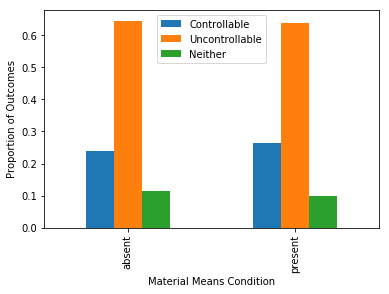

In [159]:
#Make a graph
pilot_prop_control[['controllable_proportion','uncontrollable_proportion','neither_control_proportion'
                   ]].plot.bar().legend(["Controllable", "Uncontrollable", "Neither"],loc='upper center'
)
plt.xlabel("Material Means Condition")
plt.ylabel("Proportion of Outcomes")

Whether the means are present or absent, participants provide outcomes that are largely (~64%) uncontrollable. Only about 25% of outcome responses were labelled controllable, and only 10% were considered neither controllable nor uncontrollable or some mix of the two.

In [160]:
valence_order = ['pos','neg','neither']

# #Make a graph
# pilot_master_data.groupby(['valence_condition'])['best_senti'].value_counts().unstack(0).loc[valence_order].plot.bar()
# plt.xlabel("Material Valence")
# plt.ylabel("Frequency of Outcomes")

# #print the data
# pd.crosstab(pilot_master_data['valence_condition'], pilot_master_data['best_senti']).reindex(valence_order, axis="columns")


In [161]:
pilot_prop_valence = pilot_master_data.groupby(['valence_condition'])['best_senti'].value_counts().unstack(1)

pilot_prop_valence["total"] = pilot_prop_valence.sum(axis = 1)
pilot_prop_valence["pos_proportion"] = pilot_prop_valence["pos"]/pilot_prop_valence["total"]
pilot_prop_valence["neg_proportion"] = pilot_prop_valence["neg"]/pilot_prop_valence["total"]
pilot_prop_valence["neither_proportion"] = pilot_prop_valence["neither"]/pilot_prop_valence["total"]
pilot_prop_valence

best_senti         neg  neither  pos  total  pos_proportion  neg_proportion  \
valence_condition                                                             
negative            45       13   21     79           0.266           0.570   
positive            40       11   29     80           0.362           0.500   

best_senti         neither_proportion  
valence_condition                      
negative                        0.165  
positive                        0.138

Text(0, 0.5, 'Proportion of Outcomes')

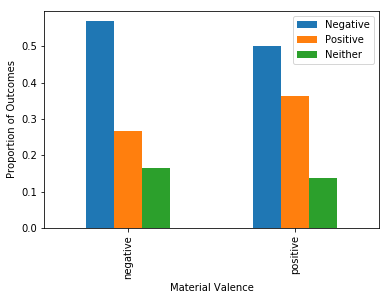

In [162]:
#Make a graph
pilot_prop_valence[['neg_proportion','pos_proportion','neither_proportion'
                   ]].plot.bar().legend(["Negative", "Positive", "Neither"],loc='upper right'
)
plt.xlabel("Material Valence")
plt.ylabel("Proportion of Outcomes")

Contrary to our prior work, the valence of responses was largely negative, regardless of material valence. When negative materials were presented, outcomes were 57% negative and 27% positive; when positive materials were presented, outcomes were 50% negative and 36% positive. 

In the valence study, we saw a flipping effect where outcome responses to positive materials were majority (72%) negative and 24% positive; and outcome responses to negative materials had a smaller proportion (56%) of negative outcomes and more positives (40%), respectively. Here, we see almost an opposite effect.

### Now, split by both conditions

In [163]:
# pilot_master_data.groupby(['means_condition','valence_condition'])['best_senti'].value_counts().unstack(
#     [0,1]).loc[valence_order].plot.bar(
#     figsize = (12,7),
# title="Outcome Valence by Material Valence Condition and Means Condition").legend(["Negative - Means Absent",
#                                                                                    "Positive - Means Absent",
#                                                                                    "Negative - Means Present",
#                                                                                    "Positive - Means Present"],
#                                                                                  title = "Valence - Means Condition")
# plt.xlabel("Outcome Valence") 
# plt.ylabel("Frequency of Outcomes")


# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

best_senti                         neg  neither  pos
valence_condition means_condition                   
negative          absent            19        6   14
                  present           26        7    7
positive          absent            17        7   16
                  present           23        4   13

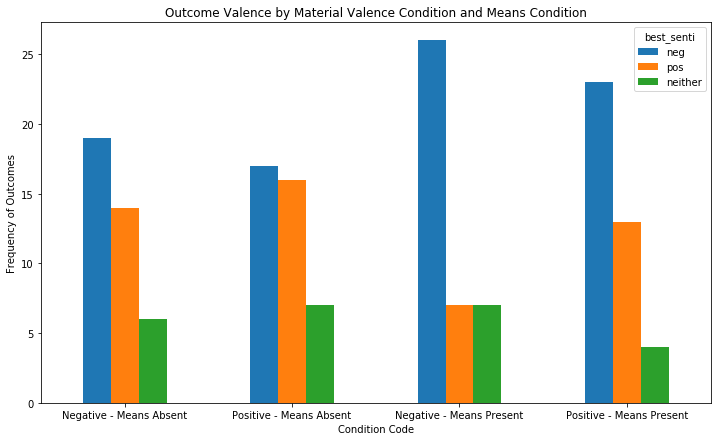

In [164]:
plot_valence_by_cond = pilot_master_data.groupby(['condition_code'])['best_senti'].value_counts().unstack(
    [1]).reset_index()
index = ["Negative - Means Present",
         "Negative - Means Absent",
         "Positive - Means Present",
         "Positive - Means Absent"]
plot_valence_by_cond['condition_code'] = index
plot_valence_by_cond = plot_valence_by_cond.set_index('condition_code')

condition_order = ["Negative - Means Absent",
                   "Positive - Means Absent",
                   "Negative - Means Present",
                   "Positive - Means Present",]

plot_valence_by_cond[["neg", "pos", "neither"]].loc[condition_order].plot.bar(figsize = (12,7),
                              title="Outcome Valence by Material Valence Condition and Means Condition")
plt.xlabel("Condition Code") 
plt.ylabel("Frequency of Outcomes")

plt.xticks(rotation=0)

# #print the data
pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

Negative and Means Absent Materials received more (49%) negative outcome responses, but also a relatively high number (36%) of positive responses as well, most closely mirroring the Valence Study.
Likewise, Positive and Means Present Materials received mostly (58%) negative outcome responses, and fewer (33%) positive outcome responses, again, closely mirroring the Valence Study.

Negative Means Present Materials received a much larger number of negative outcome responses compared to positive (65% negative; 18% positive).
Positive Means Absent Materials were more evenly distributed (43% negative; 40% positive).


This may mean that it is Controllability rather than Valence that explains the variance seen in the Valence Study.
When Means are Absent, positive and negative outcome responses are more even whether the material is Positive (43% and 40%, respectively) or if the material is negative (49% and 36%, respectively).

It is when the Means are Present that outcome responses are weighted most heavily toward the negative, whether the material is Positive (58% negative outcomes) or the material is Negative (65% negative). This effect is strongest for the Negative Means Present materials (65% negative, 18% positive).

In [165]:
pilot_prop_valencexcontrol = pilot_master_data.groupby(['means_condition'])['best_senti'].value_counts().unstack(1)

pilot_prop_valencexcontrol["total"] = pilot_prop_valencexcontrol.sum(axis = 1)
pilot_prop_valencexcontrol["pos_proportion"] = pilot_prop_valencexcontrol["pos"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol["neg_proportion"] = pilot_prop_valencexcontrol["neg"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol["neither_proportion"] = pilot_prop_valencexcontrol["neither"]/pilot_prop_valencexcontrol["total"]
pilot_prop_valencexcontrol

best_senti       neg  neither  pos  total  pos_proportion  neg_proportion  \
means_condition                                                             
absent            36       13   30     79           0.380           0.456   
present           49       11   20     80           0.250           0.613   

best_senti       neither_proportion  
means_condition                      
absent                        0.165  
present                       0.138

Text(0, 0.5, 'Proportion of Outcomes')

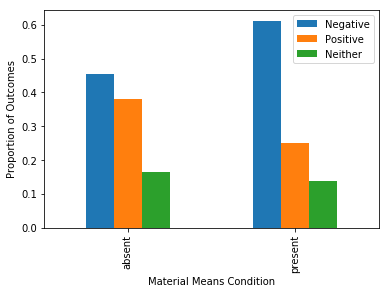

In [166]:
#Make a graph
pilot_prop_valencexcontrol[['neg_proportion','pos_proportion','neither_proportion'
                   ]].plot.bar().legend(["Negative", "Positive", "Neither"],loc='upper right'
)
plt.xlabel("Material Means Condition")
plt.ylabel("Proportion of Outcomes")

**Indeed, when we split materials by Means Condition, we see that Outcome Valence is largely dependent on Material Controllability.**

In [167]:
newf = pilot_master_data.groupby(['condition_code'])['best_senti'].value_counts().unstack([1])
newf

best_senti      neg  neither  pos
condition_code                   
A                26        7    7
B                19        6   14
C                23        4   13
D                17        7   16

In [168]:
all_values = newf.values.tolist()
cond_list = newf.index.tolist()
name_list = []
print(cond_list)
for cond1 in cond_list:
    for cond2 in cond_list:
        if cond1 != cond2:
            name_list.append(cond1 + ' by ' + cond2)  
for vals1 in all_values:
    for vals2 in all_values:
        if vals1 != vals2:
            print(name_list[0])
            del(name_list[0] )
            print(vals1)
            print(vals2)
            obs = np.array([vals1,vals2])
            chiobs, pvalue, deffre, expt = chi2_contingency(obs)
            print("X = ", chiobs)
            print("df = ", deffre)
            print("p =", "{:.16f}".format(float(pvalue)), '\n')

['A', 'B', 'C', 'D']
A by B
[26, 7, 7]
[19, 6, 14]
X =  3.4870458031996483
df =  2
p = 0.1749031474163910 

A by C
[26, 7, 7]
[23, 4, 13]
X =  2.8018552875695732
df =  2
p = 0.2463683158690369 

A by D
[26, 7, 7]
[17, 7, 16]
X =  5.405460060667341
df =  2
p = 0.0670222898671780 

B by A
[19, 6, 14]
[26, 7, 7]
X =  3.4870458031996483
df =  2
p = 0.1749031474163910 

B by C
[19, 6, 14]
[23, 4, 13]
X =  0.8054602496269168
df =  2
p = 0.6684924845156822 

B by D
[19, 6, 14]
[17, 7, 16]
X =  0.30875876616261266
df =  2
p = 0.8569468481970407 

C by A
[23, 4, 13]
[26, 7, 7]
X =  2.8018552875695732
df =  2
p = 0.2463683158690369 

C by B
[23, 4, 13]
[19, 6, 14]
X =  0.8054602496269168
df =  2
p = 0.6684924845156822 

C by D
[23, 4, 13]
[17, 7, 16]
X =  2.028526645768025
df =  2
p = 0.3626695017701405 

D by A
[17, 7, 16]
[26, 7, 7]
X =  5.405460060667341
df =  2
p = 0.0670222898671780 

D by B
[17, 7, 16]
[19, 6, 14]
X =  0.3087587661626127
df =  2
p = 0.8569468481970407 

D by C
[17, 7, 16]


Negative Means Present by Positive Means Absent is the only trend toward significance.

A (Negative - Means Present) by D (Positive - Means Absent)  
[26, 7, 7]  
[17, 7, 16]  
X =  5.405  
df =  2    
p = 0.067

In [169]:
newf2 = pilot_master_data.groupby(['means_condition'])['best_senti'].value_counts().unstack([1])
newf2

best_senti       neg  neither  pos
means_condition                   
absent            36       13   30
present           49       11   20

In [170]:
all_values = newf2.values.tolist()
cond_list = newf2.index.tolist()
name_list = []
print(cond_list)
for cond1 in cond_list:
    for cond2 in cond_list:
        if cond1 != cond2:
            name_list.append(cond1 + ' by ' + cond2)  
for vals1 in all_values:
    for vals2 in all_values:
        if vals1 != vals2:
            print(name_list[0])
            del(name_list[0] )
            print(vals1)
            print(vals2)
            obs = np.array([vals1,vals2])
            chiobs, pvalue, deffre, expt = chi2_contingency(obs)
            print("X = ", chiobs)
            print("df = ", deffre)
            print("p =", "{:.16f}".format(float(pvalue)), '\n')

['absent', 'present']
absent by present
[36, 13, 30]
[49, 11, 20]
X =  4.148776759121371
df =  2
p = 0.1256332438593745 

present by absent
[49, 11, 20]
[36, 13, 30]
X =  4.148776759121371
df =  2
p = 0.1256332438593745 



It is not significant when reduced to the Means Condition, either.

In [171]:
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_control'].value_counts().unstack(
#     [0,1]).loc[control_order].plot.bar(
#     figsize = (12,7),
#     title="Outcome Controllability by Material Valence Condition and Means Condition").legend(
#                                                                                   ["Negative - Means Absent",
#                                                                                    "Negative - Means Present",
#                                                                                    "Positive - Means Absent",
#                                                                                    "Positive - Means Present"],
#                                                                                  title = "Valence - Means Condition")
# plt.xlabel("Outcome Controllability") 
# plt.ylabel("Frequency of Outcomes")

# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_control'].value_counts().unstack([0,1])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

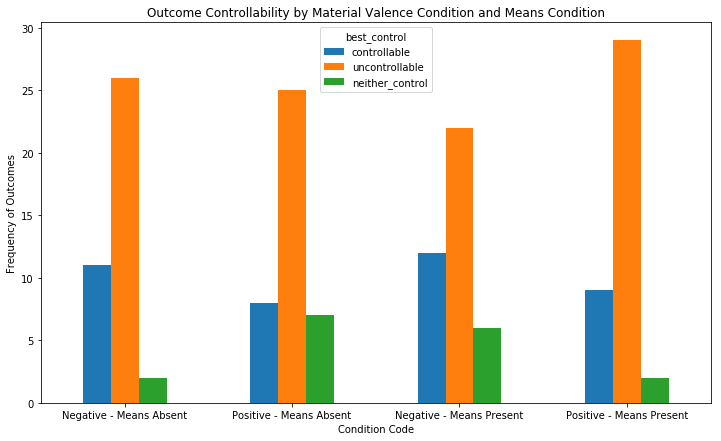

In [172]:
plot_valence_by_cond = pilot_master_data.groupby(['condition_code'])['best_control'].value_counts().unstack(
    [1]).reset_index()
index = ["Negative - Means Present",
         "Negative - Means Absent",
         "Positive - Means Present",
         "Positive - Means Absent"]
plot_valence_by_cond['condition_code'] = index
plot_valence_by_cond = plot_valence_by_cond.set_index('condition_code')

condition_order = ["Negative - Means Absent",
                   "Positive - Means Absent",
                   "Negative - Means Present",
                   "Positive - Means Present",]

plot_valence_by_cond[["controllable", "uncontrollable", "neither_control"]].loc[condition_order].plot.bar(figsize = (12,7),
                              title="Outcome Controllability by Material Valence Condition and Means Condition")
plt.xlabel("Condition Code") 
plt.ylabel("Frequency of Outcomes")

plt.xticks(rotation=0)

# #print the data
# pilot_master_data.groupby(['valence_condition', 'means_condition'])['best_senti'].value_counts().unstack([2])

When looking at Outcome Controllability, there does not appear to be much difference in response frequencies based on the material conditions.

All materials received more Uncontrollable than Controllable outcome responses.

Negative and Means Absent Materials received mostly (67%) uncontrollable outcome responses, and fewer (28%) controllable responses as well. Likewise, Positive and Means Present Materials received mostly (73%) uncontrollable outcome responses, and fewer (23%) controllable outcome responses.

Negative Means Present Materials received fewer, but still a majority of uncontrollable outcome responses (55% uncontrollable; 30% controllable). Positive Means Absent Materials also received a high proportion of uncontrollable (63% uncontrollable; 20% controllable).


In [173]:
pilot_prop_controlxvalence = pilot_master_data.groupby(['valence_condition'])['best_control'].value_counts().unstack(1)

pilot_prop_controlxvalence["total"] = pilot_prop_controlxvalence.sum(axis = 1)
pilot_prop_controlxvalence["controllable_proportion"] = pilot_prop_controlxvalence["controllable"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence["uncontrollable_proportion"] = pilot_prop_controlxvalence["uncontrollable"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence["neither_control_proportion"] = pilot_prop_controlxvalence["neither_control"]/pilot_prop_controlxvalence["total"]
pilot_prop_controlxvalence

best_control       controllable  neither_control  uncontrollable  total  \
valence_condition                                                         
negative                     23                8              48     79   
positive                     17                9              54     80   

best_control       controllable_proportion  uncontrollable_proportion  \
valence_condition                                                       
negative                             0.291                      0.608   
positive                             0.212                      0.675   

best_control       neither_control_proportion  
valence_condition                              
negative                                0.101  
positive                                0.113

Text(0, 0.5, 'Proportion of Outcomes')

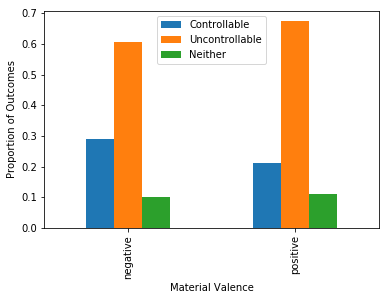

In [174]:
#Make a graph
pilot_prop_controlxvalence[['controllable_proportion','uncontrollable_proportion','neither_control_proportion'
                   ]].plot.bar().legend(["Controllable", "Uncontrollable", "Neither"],loc='upper center'
)
plt.xlabel("Material Valence")
plt.ylabel("Proportion of Outcomes")

**A split of outcome controllability by Valence condition shows the same.**

### Correlational

In [175]:
pilot_master_data.head(2)

random  subset   material condition_code valence_condition means_condition  \
0   0.467       3  lucy_loan              B          negative          absent   
1   0.263       3  lucy_loan              C          positive         present   

                                           goal_step  \
0  Lucy hates her old car and wants to buy a new ...   
1  Lucy hates her old car and wants to buy a new ...   

                                        action_step  \
0  Lucy calls the bank to get a loan for a new car.   
1  Lucy calls the bank to get a loan for a new car.   

                                      resources_step  numeric_valence  ...  \
0  The car dealer says her old car is a wreck and...            3.125  ...   
1  The car dealer says her old car is a classic a...            6.125  ...   

   Postal                   user_id  reject   variable  \
0    WV10  5e5ce3bf1377484b52ea2c07    keep  lucy_loan   
1    SG13  5a69175331b87a0001c76149    keep  lucy_loan   

                                         answer_text     best_ans value  \
0  Lucy did not get approved for the bank loan to...  ll_neg_ans1 1.000   
1  the car gets stolen before she is able to sell...     ll_other 1.000   

  best_senti  best_obj    best_control  
0        neg      goal  uncontrollable  
1        neg      goal  uncontrollable  

[2 rows x 42 columns]

#### Where larger numbers are more positive and more controllable and smaller numbers are more negative and uncontrollable

In [176]:
# but first, I need to make numeric variables for the valence and controllability ratings.
numeric_ratings = [2,1,np.nan]
#NaN so that neithers are removed...

# pair the numbers with the ordered (text) ratings
numeric_valence_ratings = dict(zip(valence_order, numeric_ratings))
numeric_control_ratings = dict(zip(control_order, numeric_ratings))

#check
#print(numeric_valence_ratings)
#list(numeric_control_ratings)

pilot_master_data['outcome_numeric_valence'] = pilot_master_data['best_senti'].map(
    lambda x: numeric_valence_ratings[x] if x != -9999 else None
)

pilot_master_data['outcome_numeric_control'] = pilot_master_data['best_control'].map(
    lambda x: numeric_control_ratings[x] if x != -9999 else None
)

In [177]:
graphable_data = pilot_master_data.groupby(['material',
                                            'condition_code','valence_condition','means_condition',
                                            'numeric_valence','numeric_control',
                                            ])['outcome_numeric_valence','outcome_numeric_control'].mean().reset_index()

graphable_data.head()


material condition_code valence_condition means_condition  \
0  belinda_meeting              A          negative         present   
1  belinda_meeting              B          negative          absent   
2  belinda_meeting              C          positive         present   
3  belinda_meeting              D          positive          absent   
4     bill_holiday              A          negative         present   

   numeric_valence  numeric_control  outcome_numeric_valence  \
0            4.125            4.533                    1.250   
1            2.875            2.938                    1.400   
2            6.312            5.375                    1.333   
3            5.267            4.438                    1.250   
4            2.000            3.400                    1.200   

   outcome_numeric_control  
0                    1.667  
1                    1.200  
2                    1.000  
3                    1.667  
4                    1.200

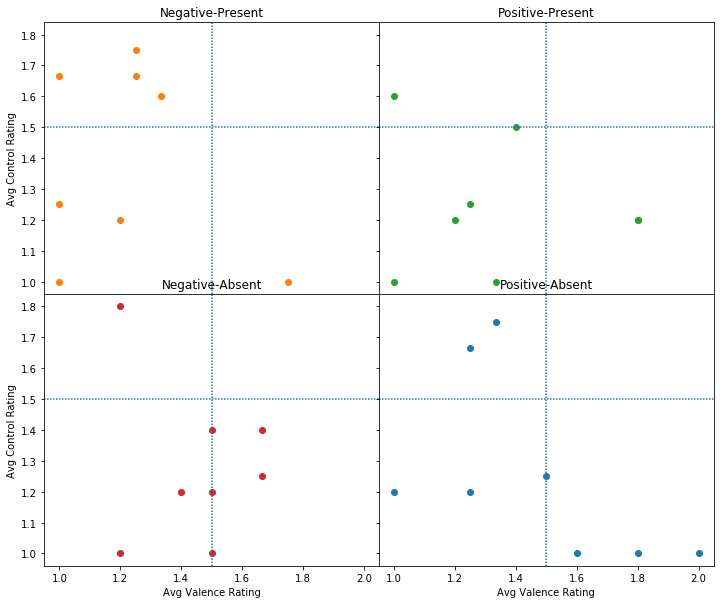

In [178]:
graph_mats = graphable_data.groupby('condition_code')
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(graph_mats.get_group('A').groupby('material')["outcome_numeric_valence"].mean(), 
               graph_mats.get_group('A').groupby('material')["outcome_numeric_control"].mean(), 'tab:orange',
               marker="o", linestyle="")
axs[0, 0].set_title('Negative-Present')

axs[0, 1].plot(graph_mats.get_group('C').groupby('material')["outcome_numeric_valence"].mean(), 
               graph_mats.get_group('C').groupby('material')["outcome_numeric_control"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Positive-Present')
axs[1, 0].plot(graph_mats.get_group('B').groupby('material')["outcome_numeric_valence"].mean(), 
               graph_mats.get_group('B').groupby('material')["outcome_numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Negative-Absent')
axs[1, 1].plot(graph_mats.get_group('D').groupby('material')["outcome_numeric_valence"].mean(), 
               graph_mats.get_group('D').groupby('material')["outcome_numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Positive-Absent')

for ax in axs.flat:
    ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=1.5, dashes = (1,1))
    ax.axhline(y=1.5, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# fig, ax = plt.subplots()
# ax.scatter(z, y)

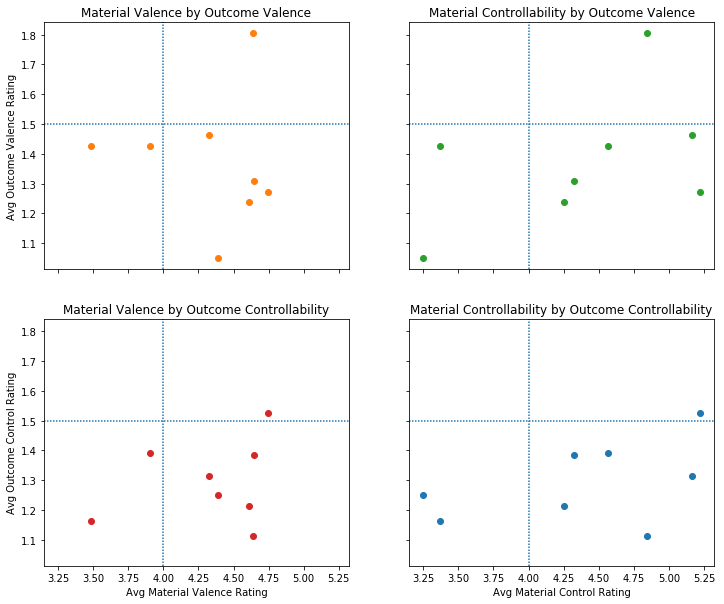

In [179]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        #gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(graphable_data.groupby('material')["numeric_valence"].mean(), 
               graphable_data.groupby('material')["outcome_numeric_valence"].mean(), 'tab:orange',
               marker="o", linestyle="")
axs[0, 0].set_title('Material Valence by Outcome Valence')
axs[0, 0].set(xlabel='Avg Material Valence Rating', ylabel='Avg Outcome Valence Rating')

axs[0, 1].plot(graphable_data.groupby('material')["numeric_control"].mean(), 
               graphable_data.groupby('material')["outcome_numeric_valence"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Material Controllability by Outcome Valence')
axs[0, 1].set(xlabel='Avg Material Control Rating', ylabel='Avg Outcome Valence Rating')

axs[1, 0].plot(graphable_data.groupby('material')["numeric_valence"].mean(), 
               graphable_data.groupby('material')["outcome_numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Material Valence by Outcome Controllability')
axs[1, 0].set(xlabel='Avg Material Valence Rating', ylabel='Avg Outcome Control Rating')

axs[1, 1].plot(graphable_data.groupby('material')["numeric_control"].mean(), 
               graphable_data.groupby('material')["outcome_numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Material Controllability by Outcome Controllability')

axs[1, 1].set(xlabel='Avg Material Control Rating', ylabel='Avg Outcome Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=1.5, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# fig, ax = plt.subplots()
# ax.scatter(z, y)

In [180]:
fig = px.scatter(graphable_data, x="outcome_numeric_valence", y="outcome_numeric_control", color="condition_code",
                 hover_data=['condition_code'], height=500, width=600)
fig.show()

### Interaction Graph

In [181]:
interaction_data = pilot_master_data.groupby('condition_code')

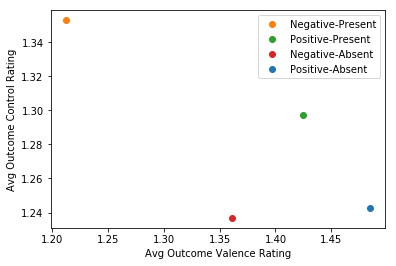

In [182]:
conditions = {'A':'Negative-Present', 'C':'Positive-Present', 'B':'Negative-Absent', 'D':'Positive-Absent'}    

fig, ax = plt.subplots()
ax.plot(interaction_data.get_group('A')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('A')["outcome_numeric_control"].mean(),  'tab:orange',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('B')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('B')["outcome_numeric_control"].mean(),  'tab:green',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('C')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('C')["outcome_numeric_control"].mean(),  'tab:red',
               marker="o", linestyle=""
       )
ax.plot(interaction_data.get_group('D')["outcome_numeric_valence"].mean(), 
        interaction_data.get_group('D')["outcome_numeric_control"].mean(),  'tab:blue',
               marker="o", linestyle=""
       )

ax.set(xlabel='Avg Outcome Valence Rating', ylabel='Avg Outcome Control Rating')
ax.legend(['Negative-Present','Positive-Present','Negative-Absent','Positive-Absent'])

plt.show()


# save a csv

In [183]:
pre_test_data

MQ  expt      lg order      surveygizmo_export_filename  Response ID  \
0     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
1     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
2     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
3     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
4     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
5     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
6     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
7     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
8     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
9     MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
10    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
11    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
12    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
13    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
14    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
15    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
16    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
17    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
18    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
19    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
20    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
21    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
22    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
23    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
24    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
25    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
26    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            4   
27    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            5   
28    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            1   
29    MQ  PTS4  LGs1r3    vc  20200513075117-SurveyExport.csv            2   
...   ..   ...     ...   ...                              ...          ...   
1246  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            3   
1247  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            4   
1248  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            1   
1249  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            2   
1250  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            3   
1251  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            4   
1252  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            1   
1253  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            2   
1254  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            3   
1255  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            4   
1256  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            1   
1257  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            2   
1258  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            3   
1259  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            4   
1260  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            1   
1261  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            2   
1262  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            3   
1263  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            4   
1264  MQ  PTS4  LGs2r3    cv  20200513075508-SurveyExport.csv            1   
1265  MQ  PTS4  LGs2r3    cv

In [184]:
materials_proposed_and_true_constructs = pre_test_data.groupby(['material','goal_step','action_step','resources_step','valence_condition','means_condition']).agg(
{'numeric_valence':['mean','median',pd.Series.mode,'std','min','max'],
 'numeric_control':['mean','median',pd.Series.mode,'std','min','max']
})
materials_proposed_and_true_constructs

numeric_valence  \
                                                                                                                                                                                                                        mean   
material          goal_step                                          action_step                                        resources_step                                     valence_condition means_condition                   
alan_plane        Alan has a plane to catch, that is departing fo... Alan is packing his bag before the trip.           Alan gets to the airport late and has problems ... negative          absent                    2.688   
                                                                                                                        Alan gets to the airport late, but clears secur... positive          absent                    5.250   
                                                                                                                        Alan gets to the airport on time and clears sec... positive          present                   6.333   
                                                                                                                        Alan gets to the airport on time, but has probl... negative          present                   3.562   
anna_interview    Anna has an important job interview to attend i... Going to bed, Anna sets her alarm clock for 7am.   Anna has read a lot about the company and feels... positive          present                   5.933   
                                                                                                                        Anna has read a lot about the company but does ... negative          present                   3.688   
                                                                                                                        Anna has read nothing about the company and doe... negative          absent                    2.750   
                                                                                                                        Anna has read nothing about the company but fee... positive          absent                    4.688   
belinda_meeting   Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the front door of t... positive          present                   6.312   
                                                                                                                        Belinda's taxi takes her to the front door of t... negative          present                   4.125   
                                                                                                                        Belinda's taxi takes her to the wrong office bl... negative          absent                    2.875   
                                                                                                                        Belinda's taxi takes her to the wrong office bl... positive          absent                    5.267   
bill_holiday      Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is delayed but eventually arrive... positive          present                   5.625   
                                                                                                                        Bill's luggage is delayed but eventually arrive... negative          present                   2.000   
                                                                                                                        Bill's luggage is lost and he has a terrible ti... negative          absent                    1.500   
                                                                                                                        Bill's luggage is lost, but he still has a grea... po

In [185]:
materials_proposed_and_true_constructs["rated_control"] = pd.Series()
materials_proposed_and_true_constructs["rated_valence"] = pd.Series()


In [186]:
materials_proposed_and_true_constructs.loc[materials_proposed_and_true_constructs['numeric_control']['mean'] <= 3.5, ['rated_control']] = 'uncontrollable'
materials_proposed_and_true_constructs.loc[materials_proposed_and_true_constructs['numeric_control']['mean'] >= 4.5, ['rated_control']] = 'controllable'
materials_proposed_and_true_constructs.loc[materials_proposed_and_true_constructs['numeric_valence']['mean'] <= 3.5, ['rated_valence']] = 'negative'
materials_proposed_and_true_constructs.loc[materials_proposed_and_true_constructs['numeric_valence']['mean'] >= 4.5, ['rated_valence']] = 'positive'




materials_proposed_and_true_constructs

numeric_valence  \
                                                                                                                                                                                                                        mean   
material          goal_step                                          action_step                                        resources_step                                     valence_condition means_condition                   
alan_plane        Alan has a plane to catch, that is departing fo... Alan is packing his bag before the trip.           Alan gets to the airport late and has problems ... negative          absent                    2.688   
                                                                                                                        Alan gets to the airport late, but clears secur... positive          absent                    5.250   
                                                                                                                        Alan gets to the airport on time and clears sec... positive          present                   6.333   
                                                                                                                        Alan gets to the airport on time, but has probl... negative          present                   3.562   
anna_interview    Anna has an important job interview to attend i... Going to bed, Anna sets her alarm clock for 7am.   Anna has read a lot about the company and feels... positive          present                   5.933   
                                                                                                                        Anna has read a lot about the company but does ... negative          present                   3.688   
                                                                                                                        Anna has read nothing about the company and doe... negative          absent                    2.750   
                                                                                                                        Anna has read nothing about the company but fee... positive          absent                    4.688   
belinda_meeting   Belinda is on a plane going to Los Angeles for ... When Belinda reaches Los Angeles, she takes a t... Belinda's taxi takes her to the front door of t... positive          present                   6.312   
                                                                                                                        Belinda's taxi takes her to the front door of t... negative          present                   4.125   
                                                                                                                        Belinda's taxi takes her to the wrong office bl... negative          absent                    2.875   
                                                                                                                        Belinda's taxi takes her to the wrong office bl... positive          absent                    5.267   
bill_holiday      Bill is looking forward to going on his summer ... Then, Bill packs his passport in his suitcase f... Bill's luggage is delayed but eventually arrive... positive          present                   5.625   
                                                                                                                        Bill's luggage is delayed but eventually arrive... negative          present                   2.000   
                                                                                                                        Bill's luggage is lost and he has a terrible ti... negative          absent                    1.500   
                                                                                                                        Bill's luggage is lost, but he still has a grea... po

In [187]:
materials_proposed_and_true_constructs.to_csv('materials_proposed_and_true_constructs.csv')

# Trash:

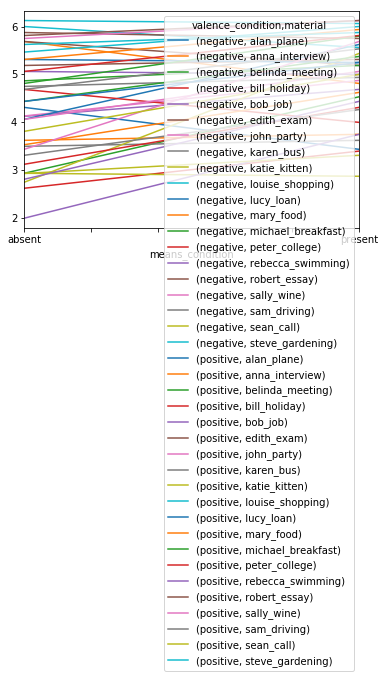

In [188]:
#Make a graph
pre_test_data.groupby(['means_condition','valence_condition','material'])['numeric_control'].mean().unstack([1,2]).plot.line()


In [189]:
pre_test_data.groupby(['valence_condition','means_condition','material']).agg(
{'numeric_valence':['mean','median',pd.Series.mode,'std','min','max'],
 'numeric_control':['mean','median',pd.Series.mode,'std','min','max']
}).to_csv('valence_means_materials_summary.csv')

In [190]:
#check for NaN values
pre_test_data.loc[pre_test_data['numeric_valence'].isna()].groupby(['lg', 'order'])['valence'].value_counts()
#pre_test_data.loc[pre_test_data['numeric_valence'].isna()][['lg','order','material','valence_condition','means_condition','valence','control']] # there are 16
#pre_test_data.loc[pre_test_data['control'].isna()] # there are also 16 here

lg      order  valence
LGs1r3  vc     -9999      1
LGs1r4  vc     -9999      1
LGs2r1  vc     -9999      2
LGs2r2  vc     -9999      1
LGs2r3  cv     -9999      1
        vc     -9999      2
LGs2r4  vc     -9999      1
Name: valence, dtype: int64

In [191]:
#try1.pivot(index = "user_id", columns = "variable_condition", values = 'value')
try1.groupby(['user_id', 'material', 'variable_condition']
            )['value'].first().unstack('variable_condition')

NameError: name 'try1' is not defined

In [ ]:
for col_name in ['q1', 'control', 'valence']:    
    try1[col_name] = try1[['variable_condition', 'value']].apply(
        lambda row: row['value'] if row['variable_condition'] == col_name else None, 
        axis=1
    )

In [ ]:
try1.head(10)

In [ ]:
try1.unstack(index=['MQ', 'expt', 'lg', 'order', 'surveygizmo_export_filename',
                            'Response ID','Time Started','Date Submitted',
                            'Status','Contact ID','Legacy Comments','Comments',
                            'Language','Referer','SessionID','User Agent', 'Tags', 
                            'IP Address', 'Longitude', 'Latitude', 'Country',
                            'City', 'State/Region', 'Postal', 'user_id', 'material'], 
           columns='variable_condition', values='value')


### In which I create a table to show an example material and conditions.

In [ ]:
print("Goal Sentence: Sam is driving home in a hurry because he wants to watch a soccer match on TV.")
print("Valence and Control Information: ")
print("Action Step: Sam decides to take the tunnel, to get home sooner.")


In [ ]:
#check where material names appear with their respective conditions and orders.

for i in list_of_files[1:]:
    print(dict_of_files[i].groupby(['presentation_order', 'condition_code', 'subset',
                                         'valence_condition', 'means_condition'])['material'].count())


#dict_of_files[list_of_files[1]].groupby(['presentation_order', 'condition_code', 'subset',
 #                                        'valence_condition', 'means_condition'])['material'].apply(list)


In [ ]:
dict_of_files = {}

for filename in list_of_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(path + filename)
    else:
        print("This is not a .csv file and will not be read in: ", filename)
    
    
dict_of_files[list_of_files[1]]

In [ ]:
#check that all the conditions match condition codes:

dict_of_conditions = {}
holder = pd.DataFrame()

for i in list_of_files[1:]:
    holder = dict_of_files[i].groupby(['presentation_order', 'condition_code', 'subset',
                                         'valence_condition', 'means_condition'])['material'].count().reset_index()
    
    for j in range(4):
        condition = holder['condition_code'][j]
        if condition not in dict_of_conditions:
            dict_of_conditions[condition] = holder[['valence_condition', 'means_condition']].iloc[j]
            print(dict_of_conditions)

        elif dict_of_conditions[condition] is holder[['valence_condition', 'means_condition']].iloc[j]:
            print('True')

        else:
            print(holder[:][j])


In [ ]:
# read in the files with the material sets defined by the latin squares above
path = 'material_sets/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_material_set_files = os.listdir(path)

print(list_of_material_set_files)


## Create material - condition assignment datasets

In [ ]:
condition_assignments

In [ ]:
LGs1r1